Cite this paper if this code helps you:
F. Satter and S. M. Masudul Ahsan, "Open Vocabulary Word Recognition From Transcribed Bangla Texts," 2023 26th International Conference on Computer and Information Technology (ICCIT), Cox's Bazar, Bangladesh, 2023, pp. 1-6, doi: 10.1109/ICCIT60459.2023.10441393.

Import Libraries

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf

Mount Drive

In [ ]:
#mount drive

from google.colab import drive
drive.mount('/content/gdrive')

# # this creates a symbolic link so that now the path /content/gdrive/My Drive/ is equal to /mydrive

# !ln -s /content/gdrive/My Drive/ /mydrive
# !ls /mydrive

Mounted at /content/gdrive


Model Load

In [ ]:
# clone the tensorflow models on the colab cloud vm

# !git clone --q https://github.com/tensorflow/models.git




# navigate to /models/research folder to compile protos

# update ashche git e. ekhon ar ager code kaaj kore na. tai 2/3 ta ager commit download kore drive e up disi.  oita models 1. oita use kortesi. models e ache satter1707116 er shortcut

%cd /content/gdrive/MyDrive/models (1)/research

# Compile protos.

!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.

!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
#ekhane ekta . deya lagse

/content/gdrive/MyDrive/models (1) (1)/research
Processing /content/gdrive/MyDrive/models (1) (1)/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.6/28.6 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 26.6 MB/s eta 0:00:00
     ━

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2023-08-23 14:03:55.490356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-08-23 14:04:04.472442: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0823 14:04:04.744157 138373823438848 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0823 14:04:05.449675 138373823438848 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.47s
I0823 14:04:06.118490 138373823438848 test_uti

In [ ]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import itertools

Class Initialization

In [ ]:
classes=['blank','অ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ঃ','ং','ঁ','০','১','২','৩','৪','৫','৬','৭','৮','৯','া','ি','ী','ে','ু','faka','্র','্য','ক্ষ','ন্ত','ত্র','ঙ্গ','স্থ','স্ব','ক্ত','স্ত','ন্দ','চ্ছ','দ্ধ','ন্ত্র','ফাকা','ত্ত','ষ্ট','ন্ন','ল্প','ম্প','faka','ূ','ৃ','ৈ','faka','ৌ','।']
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92]
print(len(classes))
print(len(labels))

93
93


Character Recognize and Bounding Box

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""
final_Lekha = []
def detect_frame(frame,IMAGE_PATHS,isRealTime = False):
    # def detect_frame(frame,isRealTime = False):
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
    import pathlib
    import tensorflow as tf
    import cv2
    import argparse
    import numpy as np
    from google.colab.patches import cv2_imshow

    # Enable GPU dynamic memory allocation
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

    # PROVIDE PATH TO IMAGE DIRECTORY
    print(IMAGE_PATHS)
    IMAGE_PATHS = f'{IMAGE_PATHS}'
    # frame = cv2.imread(("/content/gdrive/MyDrive/customTF2/data/images/0.bmp"))

    # IMAGE_PATHS= frame
    image_np = np.array(frame)
    # PROVIDE PATH TO MODEL DIRECTORY
    PATH_TO_MODEL_DIR = '/content/gdrive/MyDrive/customTF2/data/inference_graph'
    PATH_TO_MODEL_DIR_Faster_RCNN = '/content/gdrive/MyDrive/customTF2/data/inference_graph (1)'

    # PROVIDE PATH TO LABEL MAP
    PATH_TO_LABELS = '/content/gdrive/MyDrive/customTF2/data/label_map.pbtxt'

    # PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
    MIN_CONF_THRESH = float(0.20)

    # LOAD THE MODEL

    import time
    from object_detection.utils import label_map_util
    from object_detection.utils import visualization_utils as viz_utils

    PATH_TO_SAVED_MODEL = "/content/gdrive/MyDrive/customTF2/data/inference_graph/saved_model"
    PATH_TO_SAVED_MODEL_Faster_RCNN = "/content/gdrive/MyDrive/customTF2/data/inference_graph (1)/saved_model"
    print('Loading model...', end='')
    start_time = time.time()

    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
    detect_fn_Faster_RCNN = tf.saved_model.load(PATH_TO_SAVED_MODEL_Faster_RCNN)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                        use_display_name=True)

    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    def load_image_into_numpy_array(path):
        """Load an image from file into a numpy array.
        Puts image into numpy array to feed into tensorflow graph.
        Note that by convention we put it into a numpy array with shape
        (height, width, channels), where channels=3 for RGB.
        Args:
          path: the file path to the image
        Returns:
          uint8 numpy array with shape (img_height, img_width, 3)
        """
        return np.array(Image.open(path))




    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections_SSD = detect_fn(input_tensor)
    detections_FASTER_RCNN = detect_fn_Faster_RCNN(input_tensor)
    temp__num_detection = 0
    temp_num_detection_FASTER_RCNN = 0
    # print(detections['detection_scores'][0])
    for i in range(0,100):
      # print(detections['detection_scores'][0][i])
      if detections_SSD['detection_scores'][0][i]>0.2 :
        # print(detections['detection_classes'][i])
        # print(detections['detection_scores'][i])
        temp__num_detection+=1
    print(temp__num_detection)

    detections_SSD['num_detections'] = temp__num_detection

    for i in range(0,100):
      # print(detections['detection_scores'][0][i])
      if detections_FASTER_RCNN['detection_scores'][0][i]>0.2 :
        # print(detections['detection_classes'][i])
        # print(detections['detection_scores'][i])
        temp_num_detection_FASTER_RCNN+=1
    print(temp_num_detection_FASTER_RCNN)

    detections_FASTER_RCNN['num_detections'] = temp_num_detection_FASTER_RCNN

    # print ('\n 1111111111111111111111111111111111 ')
    # print(detections)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections_SSD.pop('num_detections'))
    num_detections_Faster_RCNN = int(detections_FASTER_RCNN.pop('num_detections'))

    detections_SSD = {key: value[0, :num_detections].numpy()
                  for key, value in detections_SSD.items()}
    detections_SSD['num_detections'] = num_detections
    print('hoye ja')
    print(detections_SSD['detection_classes'])

    # detection_classes should be ints.
    detections_SSD['detection_classes'] = detections_SSD['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    detections_FASTER_RCNN = {key: value[0, :num_detections_Faster_RCNN].numpy()
                  for key, value in detections_FASTER_RCNN.items()}
    detections_FASTER_RCNN['num_detections'] = num_detections_Faster_RCNN
    print('hoye ja')
    print(detections_FASTER_RCNN['detection_classes'])

    # detection_classes should be ints.
    detections_FASTER_RCNN['detection_classes'] = detections_FASTER_RCNN['detection_classes'].astype(np.int64)

    detections = detections_SSD.copy()
    detections['detection_classes'] = np.concatenate((detections_SSD['detection_classes'], detections_FASTER_RCNN['detection_classes']))
    detections['detection_boxes'] = np.concatenate((detections_SSD['detection_boxes'], detections_FASTER_RCNN['detection_boxes']))
    detections['detection_multiclass_scores'] = np.concatenate((detections_SSD['detection_multiclass_scores'], detections_FASTER_RCNN['detection_multiclass_scores']))
    detections['detection_anchor_indices'] = np.concatenate((detections_SSD['detection_anchor_indices'], detections_FASTER_RCNN['detection_anchor_indices']))
    detections['detection_scores'] = np.concatenate((detections_SSD['detection_scores'], detections_FASTER_RCNN['detection_scores']))
    detections['raw_detection_boxes'] = np.concatenate((detections_SSD['raw_detection_boxes'], detections_FASTER_RCNN['raw_detection_boxes']))
    detections['num_detections'] = num_detections + num_detections_Faster_RCNN

    # sorting based on confidence level
    sorted_indices = np.argsort(detections['detection_scores'])[::-1]
    detections['detection_classes'] = detections['detection_classes'][sorted_indices]
    detections['detection_boxes'] = detections['detection_boxes'][sorted_indices]
    detections['detection_multiclass_scores'] = detections['detection_multiclass_scores'][sorted_indices]
    detections['detection_anchor_indices'] = detections['detection_anchor_indices'][sorted_indices]
    detections['detection_scores'] = detections['detection_scores'][sorted_indices]
    detections['raw_detection_boxes'] = detections['raw_detection_boxes'][sorted_indices]
    num_detections += num_detections_Faster_RCNN
    # print ("EI JEE IMPORTANT !!", detections['detection_classes'] )
    # print ("EI JEE IMPORTANT !!",len(detections) )
    # image_with_detections_FASTER_RCNN = image.copy()
    # print ("EI JEE IMPORTANT !!",detections )
    # print ("EI JEE IMPORTANT !!",len(detections_FASTER_RCNN) )

    # detections = detections_SSD + detections_FASTER_RCNN
    # print ("EI JEE IMPORTANT !!!!!!!!!!!!!!!!!!!",detections )
    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,
          min_score_thresh=0.2,
          agnostic_mode=False)

    print('Done')
    print(num_detections)


    # for i in range(0,len(detections['detection_classes'])):
    #   if detections['detection_scores'][i]>0.4 :
    #     print(detections['detection_classes'][i])
    #     print(detections['detection_scores'][i])
    #     temp__num_detection+=1
    # print(temp__num_detection)

    # print(detections['detection_classes'])
    # print(detections['detection_scores'])
    # # DISPLAYS OUTPUT IMAGE
    cv2_imshow(image_with_detections)
    # CLOSES WINDOW ONCE KEY IS PRESSED

    mark = [0]*num_detections
    myletters = []
    for i in range(0,num_detections):
        cur=detections['detection_classes'][i]
        current_label = labels[cur]
        # ekhane change
        if(current_label == 86):
          current_label = 64
        # print('CURRENT_LABEL')
        # print(current_label)
        # print(classes[cur],end='-')
        cur=detections['detection_scores'][i]

        print(cur,end=' ')
        print(detections['detection_boxes'][i], end=' ')
        x0=(detections['detection_boxes'][i][0]) #xmin
        y0=(detections['detection_boxes'][i][1]) #ymin
        x1=(detections['detection_boxes'][i][2]) #xmax
        y1=(detections['detection_boxes'][i][3]) #ymax
        # print('x0,y0,x1,y1')
        # print(x0,y0,x1,y1)
        curarea=(x1-x0)*(y1-y0)
        # print('curarea')
        # print(curarea)
        ok=1
        for j in range(0,i):
            #print(mark[j])
            if mark[j]==0:
                continue
            x2=(detections['detection_boxes'][j][0]) #xmin
            y2=(detections['detection_boxes'][j][1]) #ymin
            x3=(detections['detection_boxes'][j][2]) #xmax
            y3=(detections['detection_boxes'][j][3]) #ymax
            x4=max(x0,x2) #larger value from two xmin
            y4=max(y0,y2) #larger value from two ymin
            x5=min(x1,x3) #smaller value from two xmax
            y5=min(y1,y3) #smaller value from two ymax
            # print('x2,y2,x3,y3,x4,y4,x5,y5')
            # print(x2,y2,x3,y3,x4,y4,x5,y5)
            previous_label = labels[detections['detection_classes'][j]]
            # ekhane change
            if(previous_label == 86):
              previous_label = 64
            # print('PREVIOUS_LABEL')
            # print(previous_label)

            if x4>x5 or y4>y5:  #both xmin must be less than both xmax and ymin <= ymax , otherwise no overlap
                continue
            # print("EKHANE ASHCHI") # we are here means overlapping case
            prevarea=(x3-x2)*(y3-y2)
            # print('prevarea')
            # print(prevarea)
            commonarea=(x5-x4)*(y5-y4)
            # print('commonarea')
            # print(commonarea)
            ins1=curarea/commonarea # large common area means smaller ins
            ins2=prevarea/commonarea
            # print('ins1,ins2')
            # print(ins1,ins2)
            # print(ins1,end=' ')
            # previous_label == 60 baad disi ekhan theke
            #  ঁ,ি ,ী, ে ,ূ ,ু ,্য ,ৃ ,ৌ ,ৈ, । eshob konotay thakle beshi common eo nibe
            characters_Eligible_For_Vowels =[11,12,13,14,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,49,68,69,70,71,72,73,74,75,76,77,78,79,81,82,83,84,85]
            vowels = [61,62,63,89,91]
            probable_clash_with_chondrobindu = [21,22,82]
            clash_vowels = [63,89]
            clash_with_vowels = [16,21,24,44]
            # numbers_labels = [50,51,52,53,54,55,56,57,58,59]
            if (((current_label in characters_Eligible_For_Vowels and previous_label in vowels) or (current_label in vowels and previous_label in characters_Eligible_For_Vowels) or
             (current_label in probable_clash_with_chondrobindu and previous_label == 49) or (current_label == 49 and previous_label in probable_clash_with_chondrobindu)) and
             (current_label != previous_label)):
                if (current_label in clash_vowels and previous_label in clash_with_vowels) or (current_label in clash_with_vowels and previous_label in clash_vowels):
                  if(ins1<2 or ins2<2): #
                    ok=0
                    cur=detections['detection_classes'][j]
                    # print('classes[cur]')
                    # print(classes[cur])
                    break
                else:
                  if(ins1<0.5 or ins2<0.5):
                      ok=0
                      cur=detections['detection_classes'][j]
                      # print('classes[cur]')
                      # print(classes[cur])
                      break
            else:
              print("TUKI3")
              if(ins1<2 or ins2<2): #
                    ok=0
                    cur=detections['detection_classes'][j]
                    # print('classes[cur]')
                    # print(classes[cur])
                    break
        if ok==1:
            mark[i]=1
            cur=detections['detection_classes'][i]
            # print("detections['detection_classes'][i]")
            # print(cur)
            #myletters.append(classes[cur])
        print(ok)
    for i in range(0,num_detections):
        if mark[i]==0:
            continue
        cur=detections['detection_classes'][i]
        cur=classes[cur]
        y0=(detections['detection_boxes'][i][1])
        pair = (y0,cur)
        myletters.append(pair)
    myletters.sort(key = lambda x: x[0])
    #print(myletters)
    res_list = [x[1] for x in myletters]
    print(res_list)

    #  output lekha
    # final_Lekha = []

    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        # print ("x",x)
        y=res_list[i+1]
        # print("y",y)
        if x=='ো':
          res_list.pop(i)
        if x=='ে' or x=='ি' or x=='ৈ' or x=='ৌ' or x == '্র':
            res_list[i],res_list[i+1]=res_list[i+1],res_list[i]
    for i in range(len(res_list)-2, -1, -1):
        x=res_list[i]
        y=res_list[i+1]
        # print(x,y)
        if x=='অ' and y=='া':
            print('yo')
            res_list[i]='আ'
            res_list.pop(i+1)
    print(res_list)
    for i in res_list:
        print(i,end='')
        final_Lekha.append(i)
    final_Lekha.append(" ")
    # print ("FINAL LEKHA",final_Lekha)

    # output lekha


    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    row,col,dummy=image_np.shape
    list_with_all_boxes = []
    if(isRealTime):
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    else:
        plt.figure(num=None, figsize=(20,20), dpi=40, facecolor='w', edgecolor='k')
        plt.imshow(image_np_with_detections, interpolation='nearest')
        plt.gca().add_patch(Rectangle((10,60),10,10,edgecolor='r',facecolor='None'))
        cntr=0
        for i in range(0,num_detections):
            if mark[i]==0:
                continue
            classname=detections['detection_classes'][i]
            classname= labels[classname]
            x0=(detections['detection_boxes'][i][0])*row
            y0=(detections['detection_boxes'][i][1])*col
            x1=(detections['detection_boxes'][i][2])*row
            y1=(detections['detection_boxes'][i][3])*col
            if cntr==0:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='r',facecolor='None'))
                cntr=1
            elif cntr==1:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='b',facecolor='None'))
                cntr=2
            elif cntr==2:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='k',facecolor='None'))
                cntr=3
            elif cntr==3:
                plt.gca().add_patch(Rectangle((y0,x0),y1-y0,x1-x0,linewidth=3,edgecolor='g',facecolor='None'))
                cntr=0
            list_with_single_boxes = [x0,y0,x1,y1,classname]
            list_with_all_boxes.append(list_with_single_boxes)


        #plt.xticks([])
        #plt.yticks([])
        #plt.show()
    return list_with_all_boxes

Read Annotated Files

In [ ]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text
        classname = None
        ymin, xmin, ymax, xmax = None, None, None, None
        classname = int(boxes.find("name").text)
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax,classname]
        list_with_all_boxes.append(list_with_single_boxes)

    return list_with_all_boxes

Load Test Images

In [ ]:
import pathlib
PATH_TO_TEST_IMAGES_DIR = pathlib.Path(r"/content/gdrive/MyDrive/customTF2/data/Test")
# PATH_TO_TEST_IMAGES_DIR = pathlib.Path('testImagesWithLabel')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.bmp"))) #+list(PATH_TO_TEST_IMAGES_DIR.glob("*.png"))
TEST_XML_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.xml")))
print(len(TEST_IMAGE_PATHS))

2091


Initialization of confusion table

In [ ]:
# len(TEST_IMAGE_PATHS)
TP = [0]*93
FP = [0]*93
FN = [0]*93
print(FP)

TP_OLD = [0]*93
FP_OLD = [0]*93
FN_OLD = [0]*93

Output Results and Update Confusion Table

K NUMBER =  1645
/content/gdrive/MyDrive/customTF2/data/Test/22125.bmp
/content/gdrive/MyDrive/customTF2/data/Test/22125.xml


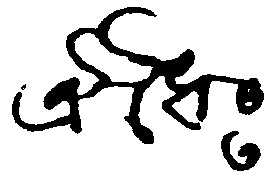

/content/gdrive/MyDrive/customTF2/data/Test/22125.bmp
Loading model...Done! Took 55.3871009349823 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22125.bmp... 11
5
hoye ja
[ 8. 29.  7. 47. 21. 44. 60.  3. 71.  7. 63.]
hoye ja
[ 8. 47. 21. 37. 61.]
Done
16


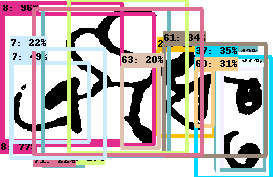

0.9621656 [0.08186337 0.01045471 0.8162464  0.56526345] 1
0.7683646 [0.0198304  0.00085066 0.79646534 0.44882375] TUKI3
0
0.63097 [0.28296012 0.5785652  0.7631089  0.785391  ] 1
0.48943725 [0.36042097 0.0418709  0.80181545 0.3261473 ] TUKI3
0
0.45194954 [0.39301637 0.7923157  0.99535227 0.9876332 ] 1
0.4410238 [0.39487368 0.8118793  0.95525783 0.96718574] TUKI3
0
0.41688514 [0.33771133 0.78978074 0.9585142  0.97185355] TUKI3
0
0.3859123 [0.05591914 0.15444776 0.87876654 0.62207747] TUKI3
0
0.36916515 [0.36959812 0.7956766  0.9887527  0.9828863 ] TUKI3
0
0.34715164 [0.32455757 0.7147301  1.         0.99383384] TUKI3
TUKI3
0
0.340082 [0.2526928 0.5996908 0.8810725 0.9772345] TUKI3
0
0.31286448 [0.397696  0.7148346 0.7071902 0.7834657] TUKI3
0
0.2740897 [0.        0.2505856 0.8614848 0.6863499] TUKI3
0
0.22443937 [0.05648601 0.12392763 0.872259   0.74269253] TUKI3
0
0.21699508 [0.27757254 0.03845858 0.88852775 0.38541064] TUKI3
0
0.20325819 [0.37597528 0.44640636 0.83495635 0.58384806] TU

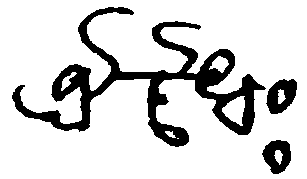

/content/gdrive/MyDrive/customTF2/data/Test/22126.bmp
Loading model...Done! Took 52.90956091880798 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22126.bmp... 10
6
hoye ja
[29. 47. 29.  8. 89. 22. 89. 89. 89.  7.]
hoye ja
[ 8. 63. 29. 82. 89. 37.]
Done
16


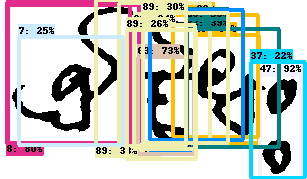

0.9729888 [0.02915135 0.02439858 0.7969457  0.4544803 ] 1
0.96531326 [0.20063582 0.63292676 0.798367   0.84552807] 1
0.9162243 [0.42356583 0.84680504 1.         0.9811837 ] 1
0.832128 [0.08424458 0.56051916 0.76085764 0.842224  ] TUKI3
0
0.7957066 [0.01524736 0.02124323 0.79911643 0.4240492 ] TUKI3
0
0.7399517 [0.02030746 0.38638222 0.81493765 0.68546265] TUKI3
1
0.7263475 [0.32316738 0.44860148 0.8586878  0.6331583 ] TUKI3
TUKI3
0
0.49600762 [0.16668281 0.6083322  0.81642866 0.911161  ] TUKI3
0
0.40543988 [0.05774338 0.48749804 0.7780154  0.7924422 ] TUKI3
0
0.38580403 [0.16668281 0.6083322  0.81642866 0.911161  ] TUKI3
0
0.38015467 [0.00477123 0.30997965 0.8114931  0.60745376] TUKI3
TUKI3
0
0.34381965 [0.14134356 0.43581527 0.82919645 0.6356087 ] TUKI3
TUKI3
0
0.29570562 [0.07454482 0.4651975  0.7964774  0.745671  ] TUKI3
0
0.26004386 [0.17232841 0.413228   0.8849601  0.6394346 ] TUKI3
TUKI3
0
0.25006828 [0.20780909 0.06044817 0.8084302  0.40349898] TUKI3
0
0.22167043 [0.35155168 0.8

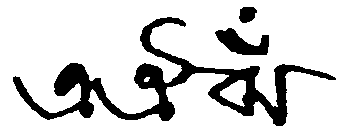

/content/gdrive/MyDrive/customTF2/data/Test/22130.bmp
Loading model...Done! Took 48.032039403915405 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22130.bmp... 12
5
hoye ja
[49.  6.  8. 19. 66.  7. 53.  7.  7.  6.  7.  6.]
hoye ja
[49.  8.  7. 19.  9.]
Done
17


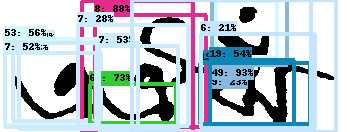

0.99028605 [0.00986168 0.6151939  0.4362785  0.793714  ] 1
0.9341592 [0.         0.6052491  0.48709282 0.8211817 ] TUKI3
0
0.9259221 [0.         0.54571724 0.99999994 0.96071935] TUKI3
0
0.88216865 [0.11440051 0.26873    0.96174    0.5886426 ] 1
0.8567085 [0.01234964 0.23243836 0.99274105 0.55199856] TUKI3
0
0.81631804 [0.40671763 0.03620547 0.913731   0.28966326] TUKI3
1
0.7370003 [0.48183694 0.56930614 0.9353242  0.8874296 ] TUKI3
1
0.727771 [0.64346725 0.2562396  0.9276697  0.5053582 ] TUKI3
0
0.64250773 [0.32713434 0.0541406  0.9711564  0.3956845 ] TUKI3
TUKI3
0
0.5605041 [0.29722697 0.01346064 0.9451962  0.2782552 ] TUKI3
TUKI3
0
0.5381435 [0.45701033 0.59715044 0.9743069  0.8418695 ] TUKI3
0
0.52730364 [0.35318056 0.28218076 0.98283005 0.5087319 ] TUKI3
0
0.5178032 [0.4027787  0.01344603 0.9563578  0.27530915] TUKI3
TUKI3
0
0.44689247 [0.         0.37466696 0.99999994 0.8888954 ] TUKI3
0
0.28034508 [0.19287834 0.22146723 0.94786114 0.539197  ] TUKI3
0
0.22924459 [0.         0.605

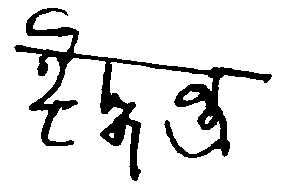

/content/gdrive/MyDrive/customTF2/data/Test/22133.bmp
Loading model...Done! Took 47.92625975608826 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22133.bmp... 7
7
hoye ja
[79. 78.  2.  3. 89. 66. 69.]
hoye ja
[79. 28.  2. 78. 17. 83. 69.]
Done
14


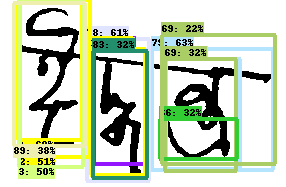

0.6949707 [0.3175528  0.5777437  0.90038717 0.83998936] 1
0.63244164 [0.2666599  0.52872795 0.9089903  0.95759356] TUKI3
0
0.60553366 [0.20949161 0.3025233  0.9643361  0.5244469 ] 1
0.5974679 [0.00703941 0.05967445 0.7478884  0.2882046 ] 1
0.5611515 [0.2635801  0.32554215 0.8762498  0.50723195] TUKI3
0
0.50662464 [0.         0.06942483 0.8357231  0.31496456] TUKI3
TUKI3
0
0.49501738 [0.         0.06347028 0.8904416  0.29158288] TUKI3
0
0.4845356 [0.26848683 0.3236866  0.95504546 0.5154782 ] TUKI3
0
0.38256198 [0.01984558 0.04554749 0.77566475 0.29806924] TUKI3
0
0.34696564 [0.26215997 0.3163861  0.93382096 0.5102213 ] TUKI3
0
0.32050478 [0.27597627 0.32420594 0.94707644 0.51480025] TUKI3
0
0.3189033 [0.32038364 0.57365006 0.91250837 0.82543653] TUKI3
0
0.3178335 [0.6403299  0.55795634 0.84629166 0.83013725] TUKI3
0
0.2244346 [0.19188309 0.5639482  0.87640554 0.9624395 ] TUKI3
0
['ই', 'দ্ধ', 'ন্ত্র']
['ই', 'দ্ধ', 'ন্ত্র']
ইদ্ধন্ত্রA-------------------------------------------------------

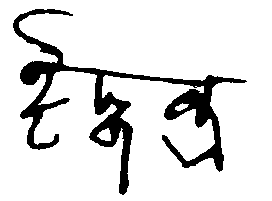

/content/gdrive/MyDrive/customTF2/data/Test/22134.bmp
Loading model...Done! Took 46.24209642410278 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22134.bmp... 9
9
hoye ja
[78. 66.  2. 79.  3. 89. 21.  8. 70.]
hoye ja
[ 2. 70. 79.  4. 77. 17. 78. 10. 89.]
Done
18


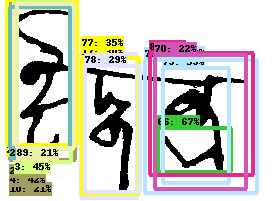

0.72818536 [0.27197045 0.2969778  0.9844177  0.506783  ] 1
0.6749668 [0.6369259  0.5783958  0.8546009  0.85241324] 1
0.574366 [1.9761920e-04 3.5520002e-02 7.9167187e-01 2.7779335e-01] 1
0.5567265 [0.33964863 0.59823656 0.9085766  0.84483886] TUKI3
0
0.52685773 [0.33964863 0.59823656 0.9085766  0.84483886] TUKI3
0
0.51550275 [0.         0.02437665 0.71951544 0.28515247] TUKI3
0
0.46406686 [0.30209297 0.53008366 0.9570069  0.945028  ] TUKI3
0
0.44684657 [0.01414436 0.05307616 0.804405   0.26411343] TUKI3
0
0.43864718 [0.04070713 0.05039142 0.74015456 0.2693614 ] TUKI3
0
0.42021418 [1.9761920e-04 3.5520002e-02 7.9167187e-01 2.7779335e-01] TUKI3
0
0.4152185 [0.03742954 0.0356707  0.73509854 0.259131  ] TUKI3
0
0.35324156 [0.2923152  0.2987408  0.96357465 0.51225275] TUKI3
0
0.29740655 [0.2923152  0.2987408  0.96357465 0.51225275] TUKI3
0
0.29043955 [0.3283757  0.31151536 0.95490205 0.51686   ] TUKI3
0
0.23934737 [0.26401293 0.5499145  0.86843395 0.9309855 ] TUKI3
0
0.21901652 [0.27616268 0

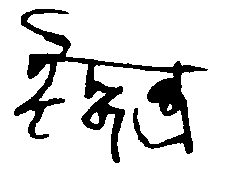

/content/gdrive/MyDrive/customTF2/data/Test/22135.bmp
Loading model...Done! Took 54.316161155700684 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22135.bmp... 9
6
hoye ja
[70.  3.  2. 78.  7. 66.  7. 78. 89.]
hoye ja
[70.  2. 18. 77. 79. 17.]
Done
15


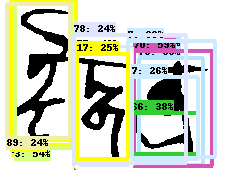

0.9045002 [0.34363776 0.58884627 0.96627825 0.8638478 ] 1
0.7496621 [0.         0.0477867  0.84807754 0.32422167] 1
0.59272677 [0.30382663 0.56456804 0.9758743  0.8985938 ] TUKI3
0
0.5372225 [0.         0.0631772  0.87042373 0.30270484] TUKI3
0
0.5264362 [0.29715115 0.3176608  0.983792   0.5542449 ] TUKI3
1
0.48453555 [0.         0.04597017 0.81975895 0.29664245] TUKI3
0
0.46236017 [0.27819744 0.31093755 0.97275114 0.5635272 ] TUKI3
TUKI3
0
0.45760688 [0.29568148 0.3235912  0.9886539  0.55775046] TUKI3
TUKI3
0
0.38662747 [0.2431053  0.53981525 0.9223657  0.9125352 ] TUKI3
0
0.38362926 [0.66868085 0.5553082  0.9016485  0.8394545 ] TUKI3
0
0.29866678 [0.34363776 0.58884627 0.96627825 0.8638478 ] TUKI3
0
0.25954184 [0.45442772 0.55644596 0.93253696 0.83961415] TUKI3
0
0.25387844 [0.3229471  0.3231109  0.93445134 0.54641235] TUKI3
TUKI3
0
0.23764284 [0.2086465  0.31332737 0.95877564 0.7890441 ] TUKI3
0
0.23641731 [0.02869911 0.02955261 0.8079538  0.29986128] TUKI3
0
['ই', 'জ', 'ত্র']
['ই',

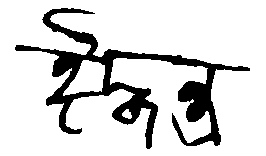

/content/gdrive/MyDrive/customTF2/data/Test/22136.bmp
Loading model...Done! Took 50.21118092536926 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22136.bmp... 6
8
hoye ja
[ 3. 79.  2. 78. 66.  3.]
hoye ja
[78.  2. 83. 79. 77. 89. 32. 39.]
Done
14


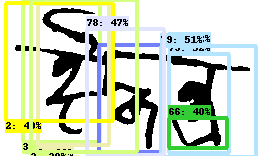

0.7545674 [0.         0.08573816 0.90531105 0.3773285 ] 1
0.6695708 [0.29010016 0.36983055 0.9709583  0.6145386 ] TUKI3
1
0.6600346 [0.02867034 0.14250454 0.9249135  0.41242465] TUKI3
0
0.5206956 [0.35190806 0.6320653  0.9773135  0.86434555] 1
0.51837724 [0.35190806 0.6320653  0.9773135  0.86434555] TUKI3
0
0.5110836 [0.2997417  0.6018741  1.         0.96556747] TUKI3
TUKI3
0
0.49431217 [0.02124336 0.02242786 0.7730484  0.42558822] TUKI3
0
0.4659442 [0.18812245 0.32395035 0.9900254  0.62012315] TUKI3
TUKI3
0
0.4167198 [0.29010016 0.36983055 0.9709583  0.6145386 ] TUKI3
TUKI3
0
0.39939043 [0.7608259  0.6329526  0.94415504 0.85509026] TUKI3
0
0.29830968 [0.02867034 0.14250454 0.9249135  0.41242465] TUKI3
0
0.28599143 [0.         0.11623678 0.97196984 0.516864  ] TUKI3
0
0.23351568 [0.29010016 0.36983055 0.9709583  0.6145386 ] TUKI3
TUKI3
0
0.20421436 [0.29010016 0.36983055 0.9709583  0.6145386 ] TUKI3
TUKI3
0
['ঈ', 'দ্ধ', 'ন্ন']
['ঈ', 'দ্ধ', 'ন্ন']
ঈদ্ধন্নA-------------------------------

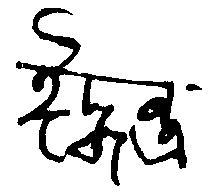

/content/gdrive/MyDrive/customTF2/data/Test/22137.bmp
Loading model...Done! Took 48.972723960876465 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22137.bmp... 12
8
hoye ja
[78. 28.  2. 79.  3. 33. 22. 78. 89. 69. 66.  3.]
hoye ja
[89. 28.  2. 78. 83. 69. 79. 37.]
Done
20


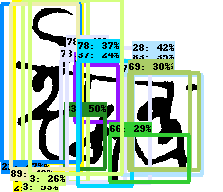

0.867984 [0.31452876 0.26943246 0.9453763  0.5606337 ] 1
0.740988 [0.339411   0.33401957 0.63171643 0.53116643] TUKI3
0
0.6371837 [0.01120806 0.0587686  0.8887397  0.36881033] 1
0.6238877 [0.0046693  0.05910892 0.84466916 0.36081868] TUKI3
TUKI3
0
0.5559316 [0.39062607 0.54493636 0.9093637  0.90774715] TUKI3
1
0.5254359 [0.00575188 0.09969413 0.945746   0.3960351 ] TUKI3
TUKI3
0
0.4951623 [0.60335267 0.29102495 0.87554795 0.4731747 ] TUKI3
0
0.4688975 [0.02435322 0.00716659 0.84264493 0.36123857] TUKI3
1
0.46386677 [0.25352958 0.29774177 0.94942176 0.67305493] TUKI3
0
0.41805896 [0.37528476 0.5933094  0.9004967  0.8522438 ] TUKI3
0
0.4171514 [0.01120806 0.0587686  0.8887397  0.36881033] TUKI3
TUKI3
0
0.40015906 [0.02133827 0.04860021 0.8782266  0.35181335] TUKI3
0
0.37193358 [0.3205378  0.34535637 0.967751   0.59628284] TUKI3
0
0.35445613 [0.37528476 0.5933094  0.9004967  0.8522438 ] TUKI3
0
0.35377032 [0.37907264 0.5916637  0.8793324  0.85228693] TUKI3
0
0.31772864 [0.37528476 0.59330

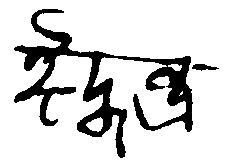

/content/gdrive/MyDrive/customTF2/data/Test/22138.bmp
Loading model...Done! Took 46.3316547870636 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22138.bmp... 9
7
hoye ja
[28. 78.  3.  3. 78. 89.  2. 79. 70.]
hoye ja
[28. 70.  2. 79. 78. 83. 77.]
Done
16


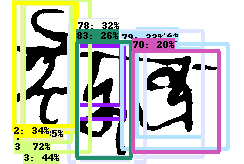

0.82919854 [0.26621374 0.3095629  0.6389417  0.49595845] 1
0.78578603 [0.28171122 0.31691793 0.719625   0.51059407] TUKI3
0
0.73439413 [0.22426853 0.28096345 0.9818851  0.598261  ] TUKI3
0
0.7246375 [0.30137613 0.56139326 0.831733   0.83454895] 1
0.72021747 [0.00593933 0.05375242 0.8026097  0.315884  ] TUKI3
1
0.71828663 [0.         0.0607971  0.86422604 0.292673  ] TUKI3
0
0.5222084 [0.30137613 0.56139326 0.831733   0.83454895] TUKI3
0
0.44488287 [0.         0.09667007 0.92672986 0.37244567] TUKI3
TUKI3
0
0.40996954 [0.19341278 0.31400755 0.95284134 0.83306843] TUKI3
0
0.35334873 [0.02926334 0.0885376  0.7845241  0.3116863 ] TUKI3
0
0.34329653 [0.02288479 0.05717196 0.7657864  0.31012818] TUKI3
TUKI3
0
0.32673022 [0.27410603 0.49810535 0.9079278  0.93725497] TUKI3
0
0.32030618 [0.2500533  0.31611434 0.9959655  0.544799  ] TUKI3
0
0.25809637 [0.25667834 0.31301117 0.95907545 0.5380576 ] TUKI3
0
0.22432654 [0.2500533  0.31611434 0.9959655  0.544799  ] TUKI3
0
0.20363902 [0.3136988  0.54

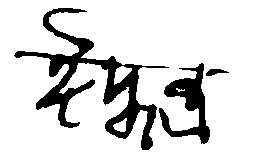

/content/gdrive/MyDrive/customTF2/data/Test/22139.bmp
Loading model...Done! Took 48.318559646606445 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22139.bmp... 11
12
hoye ja
[78.  3. 78. 60.  3. 66.  2. 33. 83. 79. 60.]
hoye ja
[83.  3. 78.  2. 28. 82. 61. 89. 82. 37. 73. 30.]
Done
23


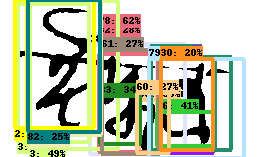

0.96369386 [0.29010254 0.34380668 0.9786873  0.6028023 ] 1
0.93856335 [0.02805889 0.06683154 0.89928967 0.34423906] TUKI3
1
0.82989246 [0.28499293 0.38063365 0.96240157 0.7092441 ] TUKI3
0
0.7219426 [0.36764562 0.61033887 0.94324696 0.82450646] 1
0.65150636 [0.00396642 0.10066904 0.84340024 0.38732177] TUKI3
TUKI3
0
0.6305319 [0.637528   0.5320492  0.97760135 0.6035399 ] TUKI3
0
0.61527133 [0.34588918 0.37896654 0.9642532  0.6079493 ] TUKI3
0
0.4922573 [0.01019497 0.11456294 0.9446294  0.45402414] TUKI3
TUKI3
0
0.41286758 [0.71565527 0.60066843 0.92761326 0.8193978 ] TUKI3
TUKI3
0
0.41097105 [0.         0.10009412 0.85547906 0.3864028 ] TUKI3
TUKI3
0
0.3741199 [0.         0.05464691 0.81519675 0.36219513] TUKI3
TUKI3
0
0.3674713 [0.37488985 0.6103722  0.9696481  0.8166605 ] TUKI3
0
0.3437424 [0.613355   0.3824366  0.9132755  0.53985214] TUKI3
0
0.29776964 [0.36693195 0.5779859  0.9501509  0.88550055] TUKI3
TUKI3
0
0.28252897 [0.34588918 0.37896654 0.9642532  0.6079493 ] TUKI3
0
0.27178

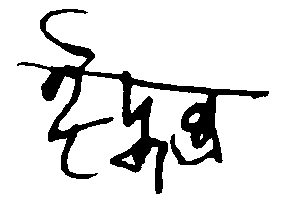

/content/gdrive/MyDrive/customTF2/data/Test/22141.bmp
Loading model...Done! Took 52.404430627822876 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22141.bmp... 7
11
hoye ja
[28.  3. 89. 78. 78. 70.  2.]
hoye ja
[78. 70.  2. 77. 79. 69. 28. 10. 83.  4. 17.]
Done
18


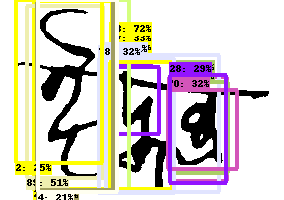

0.9752771 [0.33669704 0.38997787 0.665885   0.56025875] 1
0.72499096 [0.         0.11690572 0.95299256 0.4561834 ] TUKI3
1
0.71944875 [0.31471464 0.38664192 0.9437828  0.60619324] TUKI3
0
0.5857022 [0.38518423 0.6087581  0.9042824  0.8026421 ] 1
0.5662708 [0.00695911 0.11877708 0.9439578  0.396385  ] TUKI3
TUKI3
0
0.50585586 [0.0337389  0.09261118 0.88637924 0.36595678] TUKI3
0
0.41323555 [0.2776297  0.36978698 0.9591343  0.7714417 ] TUKI3
0
0.33030254 [0.31471464 0.38664192 0.9437828  0.60619324] TUKI3
0
0.32472894 [0.41182345 0.60795546 0.86482507 0.8059535 ] TUKI3
0
0.32115853 [0.29488194 0.34846163 0.964807   0.61578745] TUKI3
0
0.3168567 [0.45385918 0.5885185  0.8414716  0.83798605] TUKI3
0
0.31423512 [0.41182345 0.60795546 0.86482507 0.8059535 ] TUKI3
0
0.2875185 [0.3765657  0.597051   0.91454947 0.7987082 ] TUKI3
0
0.24794866 [0.00425991 0.12768915 0.94661176 0.40081403] TUKI3
TUKI3
0
0.24692442 [0.         0.05618998 0.8101216  0.36172315] TUKI3
0
0.2345192 [0.31471464 0.386641

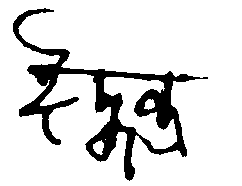

/content/gdrive/MyDrive/customTF2/data/Test/22142.bmp
Loading model...Done! Took 49.79592275619507 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22142.bmp... 10
11
hoye ja
[ 3. 28. 78.  2. 79.  3. 78. 84. 33. 79.]
hoye ja
[83. 83. 78. 69. 82. 77. 79.  2. 29. 76. 28.]
Done
21


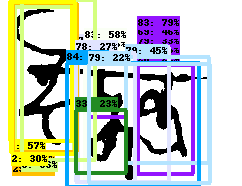

0.79438245 [0.35444233 0.56857604 0.9346231  0.8010474 ] 1
0.79035974 [0.0408149  0.06137332 0.817317   0.3068985 ] 1
0.7820713 [0.3288339  0.3485357  0.62543935 0.52156246] 1
0.7751902 [0.25302044 0.32124025 0.97730833 0.6998243 ] TUKI3
0
0.57930917 [0.32135746 0.34712416 0.9900515  0.56108314] TUKI3
0
0.57180065 [0.00968704 0.04117227 0.7554414  0.2983699 ] TUKI3
0
0.5587962 [0.32135746 0.34712416 0.9900515  0.56108314] TUKI3
0
0.46038365 [0.35444233 0.56857604 0.9346231  0.8010474 ] TUKI3
0
0.45172825 [0.3091145 0.519815  0.8726486 0.8651382] TUKI3
0
0.43941316 [0.01652163 0.05179173 0.81572896 0.3204933 ] TUKI3
0
0.399012 [0.32135746 0.34712416 0.9900515  0.56108314] TUKI3
0
0.36399972 [0.         0.09065091 0.85948235 0.39306447] TUKI3
0
0.32942468 [0.35444233 0.56857604 0.9346231  0.8010474 ] TUKI3
0
0.2994266 [0.01499724 0.04786909 0.82568586 0.31018448] TUKI3
0
0.28516877 [0.01652163 0.05179173 0.81572896 0.3204933 ] TUKI3
0
0.26634893 [0.28579944 0.31401205 0.9750429  0.559462

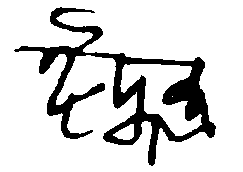

/content/gdrive/MyDrive/customTF2/data/Test/22143.bmp
Loading model...Done! Took 50.704087257385254 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22143.bmp... 6
10
hoye ja
[28.  3. 78. 33.  3. 28.]
hoye ja
[28.  3. 78. 83. 79. 83.  2. 76. 77. 82.]
Done
16


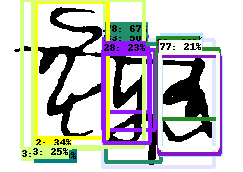

0.96990675 [0.28291705 0.43645906 0.6505803  0.6139333 ] 1
0.869581 [0.         0.08872245 0.86359066 0.43542993] 1
0.79966766 [0.23801139 0.42132762 0.96537507 0.8843521 ] TUKI3
0
0.6990731 [0.29247922 0.42217416 0.7531219  0.63911825] TUKI3
0
0.6800479 [0.00802732 0.14300638 0.8012089  0.4445635 ] TUKI3
TUKI3
0
0.6740587 [0.259828   0.43339399 0.9368534  0.66518426] TUKI3
0
0.56427634 [0.32526016 0.65876865 0.8979213  0.9121375 ] 1
0.49856266 [0.32526016 0.65876865 0.8979213  0.9121375 ] TUKI3
0
0.49706817 [0.259828   0.43339399 0.9368534  0.66518426] TUKI3
0
0.34255672 [0.01518735 0.14752328 0.7996886  0.4457119 ] TUKI3
TUKI3
0
0.31857863 [0.2873253  0.64434445 0.6868268  0.9027094 ] TUKI3
0
0.25056627 [0.00209068 0.13408653 0.85259014 0.5958647 ] TUKI3
0
0.2345622 [0.3157875  0.42577696 0.8303218  0.6212719 ] TUKI3
0
0.21916747 [0.32884654 0.65338516 0.89317966 0.9055152 ] TUKI3
0
0.21458402 [0.31325325 0.65483546 0.85817766 0.89925027] TUKI3
0
0.20159337 [0.00802732 0.14300638 0.8

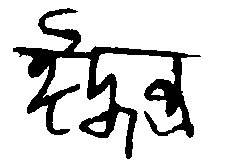

/content/gdrive/MyDrive/customTF2/data/Test/22144.bmp
Loading model...Done! Took 49.99904704093933 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22144.bmp... 6
6
hoye ja
[28.  3. 78. 78. 79. 66.]
hoye ja
[ 3. 78. 83. 28. 79. 83.]
Done
12


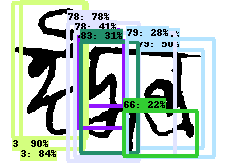

0.975557 [0.254385   0.3356749  0.6366061  0.51686275] 1
0.89526385 [0.02059117 0.05210048 0.83587646 0.3624387 ] TUKI3
1
0.83903325 [0.00636574 0.08363011 0.8971863  0.3500197 ] TUKI3
TUKI3
0
0.7958124 [0.25328213 0.33607283 0.9413577  0.5767954 ] TUKI3
0
0.7770454 [0.1426075  0.2789419  0.97482884 0.57751286] TUKI3
0
0.74919665 [0.30577487 0.5720576  0.8910337  0.84396243] 1
0.6032634 [0.25077346 0.32321653 0.7748275  0.526822  ] TUKI3
0
0.50033164 [0.30577487 0.5720576  0.8910337  0.84396243] TUKI3
0
0.41393483 [0.20551082 0.31100956 0.94926876 0.7265643 ] TUKI3
0
0.31137502 [0.26015234 0.33239478 0.92372227 0.5737761 ] TUKI3
0
0.2819982 [0.24087268 0.52471775 0.94904417 0.89065015] TUKI3
0
0.22316961 [0.67477256 0.5141734  0.9419395  0.81796247] TUKI3
0
['ঈ', 'দ', 'ন্ন']
['ঈ', 'দ', 'ন্ন']
ঈদন্নA-----------------------------------------------------------
[[41.97352409362793, 80.89765372872353, 105.0400060415268, 124.56392276287079, 28], [3.3975429832935333, 12.556215584278107, 137.9

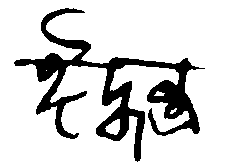

/content/gdrive/MyDrive/customTF2/data/Test/22145.bmp
Loading model...Done! Took 52.62708044052124 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22145.bmp... 9
10
hoye ja
[ 3. 28. 78. 78. 79. 78.  2.  3. 69.]
hoye ja
[78.  3. 79. 83.  2. 69. 82. 37. 83. 77.]
Done
19


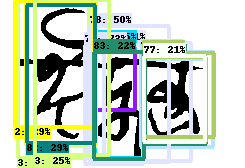

0.917472 [0.         0.07247172 0.9369733  0.36388785] 1
0.91745716 [0.30147812 0.38306478 0.65143424 0.55223775] 1
0.8114503 [0.2590356  0.4217501  0.95306045 0.7810955 ] TUKI3
0
0.7460985 [0.3138587 0.3848498 0.9345514 0.5883677] TUKI3
0
0.7265384 [0.27225316 0.34615996 0.9750697  0.58430135] TUKI3
TUKI3
0
0.6865348 [0.         0.10425253 0.8651082  0.39262527] TUKI3
0
0.65982354 [0.35157794 0.58952796 0.8637894  0.84228027] 1
0.61633354 [0.31243747 0.5732723  0.87097347 0.8699721 ] TUKI3
0
0.60179466 [0.33938906 0.58830714 0.85479736 0.8431411 ] TUKI3
0
0.52102494 [0.02069551 0.10502318 0.84971136 0.3946957 ] TUKI3
0
0.5021333 [0.16031471 0.36487067 0.9621461  0.6903442 ] TUKI3
0
0.37687406 [0.3444847  0.58188176 0.84242356 0.8412893 ] TUKI3
0
0.2939217 [0.00822967 0.0607432  0.7507766  0.3856243 ] TUKI3
0
0.28958932 [0.03041986 0.10742553 0.8489176  0.39001995] TUKI3
0
0.25037983 [3.9356231e-04 1.4072905e-01 9.2254776e-01 4.4595265e-01] TUKI3
0
0.23991914 [0.31711176 0.5811464  0.8

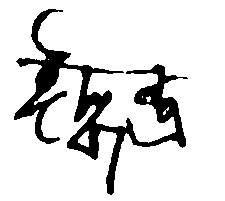

/content/gdrive/MyDrive/customTF2/data/Test/22147.bmp
Loading model...Done! Took 47.02925682067871 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22147.bmp... 9
12
hoye ja
[ 3. 78.  3. 79. 33. 78. 71. 29. 22.]
hoye ja
[78.  3. 28. 77.  2. 66. 83. 17. 13. 76. 69. 82.]
Done
21


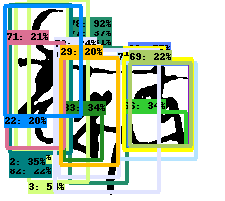

0.9221426 [0.2403003  0.30846766 0.9075856  0.5681492 ] 1
0.92067903 [0.02243008 0.06938628 0.7540042  0.3028912 ] 1
0.8296711 [0.28465065 0.26192388 0.8782497  0.5309926 ] TUKI3
0
0.75716484 [0.03013697 0.04084459 0.7526723  0.31928563] TUKI3
TUKI3
0
0.56749976 [0.3222401  0.57214665 0.72791743 0.84767365] 1
0.54152524 [0.         0.1280474  0.90197295 0.39541605] TUKI3
TUKI3
0
0.5321155 [0.31479043 0.5234541  0.7900786  0.87402105] TUKI3
TUKI3
0
0.36708412 [0.2403003  0.30846766 0.9075856  0.5681492 ] TUKI3
0
0.352155 [0.02788916 0.04127742 0.7610084  0.31595087] TUKI3
TUKI3
0
0.34373608 [0.5587126  0.5510984  0.7414899  0.82884437] TUKI3
TUKI3
0
0.33791563 [0.5699318  0.28276393 0.79395473 0.4548062 ] TUKI3
0
0.31279206 [0.2403003  0.30846766 0.9075856  0.5681492 ] TUKI3
0
0.3018352 [0.29448706 0.54861426 0.7448574  0.8559711 ] TUKI3
TUKI3
0
0.2849309 [0.3222401  0.57214665 0.72791743 0.84767365] TUKI3
0
0.24346708 [0.25185642 0.24162108 0.95482266 0.7074718 ] TUKI3
0
0.22917983 [0.

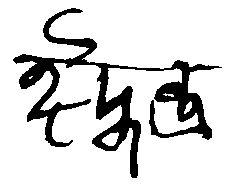

/content/gdrive/MyDrive/customTF2/data/Test/22148.bmp
Loading model...Done! Took 47.082599401474 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22148.bmp... 7
9
hoye ja
[ 3. 28. 78.  3. 79.  2.  7.]
hoye ja
[ 2. 78. 79. 83.  3. 69. 39. 82. 77.]
Done
16


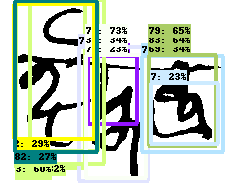

0.9318472 [0.008857   0.06187117 0.90517014 0.34863955] 1
0.8911632 [0.30325773 0.3582984  0.6686675  0.56205696] 1
0.8624783 [0.2575637 0.3185249 0.9747177 0.6060957] TUKI3
TUKI3
0
0.8216812 [0.         0.12145561 0.88427436 0.4264247 ] TUKI3
0
0.78450894 [0.01934487 0.06207995 0.8158618  0.40186733] TUKI3
0
0.73198384 [0.3019039  0.34742922 0.9587546  0.59664226] TUKI3
TUKI3
0
0.6939906 [0.3069924  0.5775549  0.81639606 0.9116604 ] 1
0.65342975 [0.2991743 0.6075871 0.788975  0.8846663] TUKI3
0
0.63750273 [0.2991743 0.6075871 0.788975  0.8846663] TUKI3
0
0.6038576 [0.01934487 0.06207995 0.8158618  0.40186733] TUKI3
0
0.3441538 [0.2991743 0.6075871 0.788975  0.8846663] TUKI3
0
0.3373649 [0.3019039  0.34742922 0.9587546  0.59664226] TUKI3
TUKI3
0
0.28614837 [0.02605247 0.05561183 0.7485992  0.38435462] TUKI3
0
0.2713273 [0.0101375  0.06028137 0.81774163 0.39940983] TUKI3
0
0.23369944 [0.3019039  0.34742922 0.9587546  0.59664226] TUKI3
TUKI3
0
0.23122838 [0.45401773 0.6139784  0.7730694 

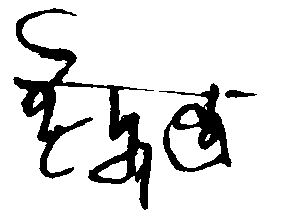

/content/gdrive/MyDrive/customTF2/data/Test/22149.bmp
Loading model...Done! Took 48.74590539932251 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22149.bmp... 9
9
hoye ja
[78. 28. 79.  3. 89. 78.  3. 70. 78.]
hoye ja
[78.  3. 83. 69. 82. 28. 28.  2. 17.]
Done
18


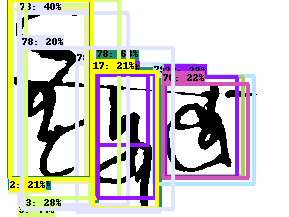

0.95316374 [0.29582256 0.2662479  0.9742779  0.55568385] 1
0.9253155 [0.34710398 0.33700302 0.6665175  0.5134474 ] TUKI3
0
0.6758048 [0.32071516 0.33515427 0.9610672  0.5561262 ] TUKI3
0
0.59949625 [0.         0.03960538 0.8354567  0.3209757 ] TUKI3
1
0.59248227 [0.32071516 0.33515427 0.9610672  0.5561262 ] TUKI3
0
0.562558 [0.35222167 0.53140706 0.8436682  0.88199735] TUKI3
1
0.44753847 [0.35628074 0.56396556 0.8084745  0.84092975] TUKI3
0
0.4389436 [0.02573192 0.0645903  0.9423529  0.31180534] TUKI3
TUKI3
0
0.42367485 [0.0430769  0.0298054  0.8359299  0.29966068] TUKI3
0
0.40306824 [0.06315304 0.06836125 0.9427673  0.4454166 ] TUKI3
0
0.3685919 [0.         0.03047818 0.81849086 0.3164938 ] TUKI3
TUKI3
0
0.27744237 [0.         0.08778208 0.9101617  0.41483608] TUKI3
TUKI3
0
0.25643796 [0.34261698 0.3356741  0.9122961  0.53783536] TUKI3
0
0.23427133 [0.35540718 0.56886494 0.81377727 0.82077265] TUKI3
0
0.22339882 [0.38965404 0.560618   0.8172488  0.86040556] TUKI3
0
0.21300033 [0.     

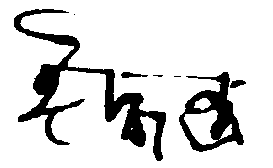

/content/gdrive/MyDrive/customTF2/data/Test/22150.bmp
Loading model...Done! Took 50.14656043052673 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22150.bmp... 7
10
hoye ja
[78.  3. 60. 69. 79.  2. 60.]
hoye ja
[78.  3. 83. 69. 79. 25. 83. 76. 38. 28.]
Done
17


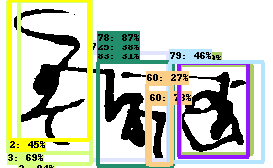

0.97667754 [0.31836432 0.33117527 0.95134205 0.61555046] 1
0.94030523 [0.         0.06938836 0.97298574 0.3347161 ] TUKI3
1
0.8734447 [0.37038237 0.35705847 0.9852385  0.6350758 ] TUKI3
0
0.77702785 [0.6227064  0.5494446  0.97811097 0.6217064 ] TUKI3
0
0.69180214 [0.01109934 0.02681178 0.9086168  0.33343276] TUKI3
TUKI3
0
0.58746123 [0.38977966 0.6577657  0.91628903 0.9248556 ] 1
0.5585672 [0.37830827 0.65206724 0.9322014  0.9104077 ] TUKI3
0
0.52370095 [0.37830827 0.65206724 0.9322014  0.9104077 ] TUKI3
0
0.45986938 [0.3696796  0.62153155 0.9591951  0.96465594] TUKI3
0
0.45785066 [0.37830827 0.65206724 0.9322014  0.9104077 ] TUKI3
0
0.4516387 [0.         0.03592298 0.83064663 0.327341  ] TUKI3
0
0.38201514 [0.37038237 0.35705847 0.9852385  0.6350758 ] TUKI3
0
0.31332302 [0.37038237 0.35705847 0.9852385  0.6350758 ] TUKI3
0
0.2667076 [0.50134236 0.5354179  0.971636   0.6315158 ] TUKI3
0
0.26622638 [0.37830827 0.65206724 0.9322014  0.9104077 ] TUKI3
0
0.20752141 [0.37830827 0.65206724 0

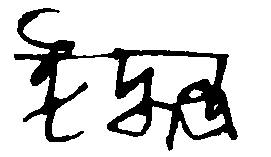

/content/gdrive/MyDrive/customTF2/data/Test/22151.bmp
Loading model...Done! Took 52.75519394874573 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22151.bmp... 9
7
hoye ja
[78.  3. 78. 79. 78. 70. 66. 21. 22.]
hoye ja
[79. 78.  3. 76. 28. 38. 83.]
Done
16


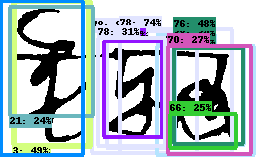

0.9296415 [0.19907936 0.3375062  0.97396326 0.7301339 ] 1
0.74211586 [0.00971495 0.05503318 0.9346973  0.3393409 ] TUKI3
1
0.73614633 [0.19013707 0.44181788 0.9690388  0.8582383 ] TUKI3
0
0.7064083 [0.30218554 0.6446059  0.92014086 0.9015311 ] TUKI3
1
0.65034896 [0.2674948  0.39415914 0.9391774  0.6360225 ] TUKI3
0
0.4926227 [0.01825812 0.04549707 0.9231379  0.32838178] TUKI3
0
0.4795658 [0.30613863 0.6416687  0.916396   0.8993083 ] TUKI3
TUKI3
0
0.44469032 [0.2993316  0.5767859  0.98145354 0.9408584 ] TUKI3
TUKI3
0
0.35226282 [0.26592037 0.38344127 0.87152827 0.59854203] TUKI3
0
0.34341893 [0.30613863 0.6416687  0.916396   0.8993083 ] TUKI3
TUKI3
0
0.31354278 [0.24237336 0.35988274 0.92424196 0.6110779 ] TUKI3
0
0.26912513 [0.29910132 0.61755157 0.9767807  0.9297211 ] TUKI3
TUKI3
0
0.26123172 [0.30613863 0.6416687  0.916396   0.8993083 ] TUKI3
TUKI3
0
0.24887706 [0.7306886  0.6270726  0.94087565 0.87354606] TUKI3
TUKI3
0
0.24435587 [0.04470331 0.03391326 0.73606765 0.3439273 ] TUKI3
T

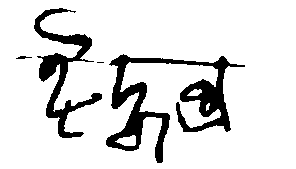

/content/gdrive/MyDrive/customTF2/data/Test/22152.bmp
Loading model...Done! Took 48.04879355430603 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22152.bmp... 12
10
hoye ja
[ 3. 78. 60. 79. 78. 28. 60. 79. 21. 70. 29. 82.]
hoye ja
[78. 83. 79.  2. 28. 70.  3. 82. 38. 28.]
Done
22


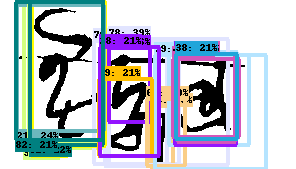

0.9301488 [0.01992096 0.07932869 0.87467253 0.35057563] 1
0.91925526 [0.24289954 0.31639275 0.96986467 0.6059522 ] TUKI3
1
0.82845014 [0.26615298 0.35304686 0.97980845 0.5662662 ] TUKI3
0
0.58305484 [0.31676194 0.59145284 0.82383466 0.80344427] TUKI3
1
0.53176075 [0.62913007 0.50970906 0.98509526 0.5846432 ] TUKI3
0
0.4793726 [0.32617643 0.569627   0.8556972  0.843772  ] TUKI3
TUKI3
0
0.44092673 [0.3132514  0.5876934  0.82646096 0.80346566] TUKI3
TUKI3
0
0.392567 [0.2310902  0.36664683 0.9719416  0.7724341 ] TUKI3
0
0.35710907 [0.28413883 0.36490032 0.7160038  0.5100741 ] TUKI3
0
0.3258222 [0.0071418  0.10520256 0.8582339  0.35548273] TUKI3
0
0.28923267 [0.5894246  0.4959997  0.98082256 0.62691677] TUKI3
0
0.28922707 [0.32834747 0.5209519  0.99951273 0.90067065] TUKI3
TUKI3
0
0.24607961 [0.32121915 0.590018   0.856983   0.7995495 ] TUKI3
TUKI3
0
0.24568118 [0.31988725 0.5993273  0.83588874 0.79506767] TUKI3
TUKI3
0
0.23720273 [0.03227268 0.0541799  0.7697972  0.35295838] TUKI3
0
0.2280

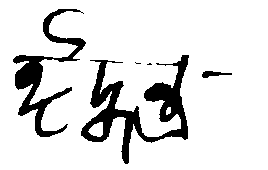

/content/gdrive/MyDrive/customTF2/data/Test/22153.bmp
Loading model...Done! Took 59.97877049446106 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22153.bmp... 7
9
hoye ja
[ 3. 78. 78. 28. 78. 79. 66.]
hoye ja
[ 3. 83. 79. 28. 83. 25. 17.  2. 28.]
Done
16


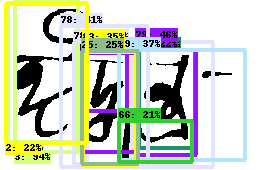

0.94124216 [0.00353992 0.0525943  0.8927367  0.29258934] 1
0.85744244 [0.02251408 0.02703597 0.8334234  0.32521755] TUKI3
0
0.8090646 [0.24818629 0.27447993 0.96461177 0.49427238] TUKI3
1
0.76552296 [0.24963588 0.32204914 0.97950774 0.796027  ] TUKI3
0
0.7253736 [0.29910138 0.5177592  0.8697511  0.7291535 ] 1
0.52256465 [0.29730994 0.30593622 0.65099144 0.47673443] TUKI3
0
0.45596474 [0.29970717 0.5072568  0.9107785  0.7327574 ] TUKI3
0
0.40553942 [0.15515552 0.22760959 0.98108214 0.5530453 ] TUKI3
TUKI3
0
0.40335268 [0.3132356  0.3076603  0.89139223 0.51275146] TUKI3
0
0.3727954 [0.2990615  0.44289124 0.93830687 0.91635096] TUKI3
TUKI3
0
0.35078043 [0.3094282  0.30867565 0.9713528  0.51060057] TUKI3
0
0.25186634 [0.30394828 0.30463666 0.96086097 0.5184536 ] TUKI3
0
0.24011037 [0.3094282  0.30867565 0.9713528  0.51060057] TUKI3
0
0.22459555 [0.02502289 0.02235593 0.83992004 0.32559836] TUKI3
0
0.22261596 [0.29970717 0.5072568  0.9107785  0.7327574 ] TUKI3
0
0.21221069 [0.71276027 0.441

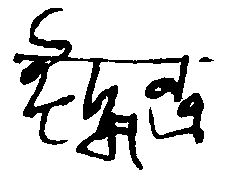

/content/gdrive/MyDrive/customTF2/data/Test/22154.bmp
Loading model...Done! Took 49.094672203063965 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22154.bmp... 10
7
hoye ja
[78.  3. 78. 79. 78. 33. 28.  3.  7. 89.]
hoye ja
[78. 79.  3. 83.  2. 76. 69.]
Done
17


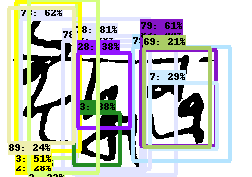

0.9845775 [0.23371063 0.24723135 0.9674446  0.57691675] 1
0.8778305 [0.2647017  0.28660852 0.97752964 0.5619169 ] TUKI3
0
0.8072931 [0.01098202 0.0678117  0.8914761  0.30806252] TUKI3
1
0.8054093 [0.20627758 0.29991695 0.98446363 0.7017004 ] TUKI3
0
0.7496226 [0.26781437 0.5261065  0.90752494 0.91660446] TUKI3
1
0.6159462 [0.10949875 0.08073089 0.9496449  0.5957265 ] TUKI3
0
0.60966164 [0.28331104 0.55690706 0.82310116 0.8581302 ] TUKI3
TUKI3
0
0.5064726 [0.01601326 0.05970894 0.8486664  0.3199045 ] TUKI3
TUKI3
0
0.43669724 [0.28331104 0.55690706 0.82310116 0.8581302 ] TUKI3
TUKI3
0
0.3849441 [0.64225656 0.29078427 0.9291326  0.47964004] TUKI3
0
0.38058645 [0.30037874 0.3095202  0.7229914  0.5192894 ] TUKI3
0
0.33160532 [0.         0.11318615 0.9762232  0.39103577] TUKI3
TUKI3
0
0.29152656 [0.4731301  0.59133416 0.8363199  0.86270934] TUKI3
0
0.27688414 [0.01601326 0.05970894 0.8486664  0.3199045 ] TUKI3
TUKI3
0
0.2353488 [0.04633633 0.03309593 0.8037831  0.2971939 ] TUKI3
0
0.23487206

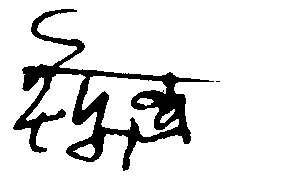

/content/gdrive/MyDrive/customTF2/data/Test/22155.bmp
Loading model...Done! Took 49.04265761375427 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22155.bmp... 10
14
hoye ja
[28. 78. 66. 78. 78.  3. 79.  2.  3. 89.]
hoye ja
[38. 83. 83. 89. 76.  2. 78. 83. 28. 35. 25. 77. 84. 79.]
Done
24


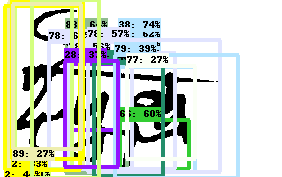

0.89653546 [0.36469206 0.22752967 0.7303776  0.41359663] 1
0.74019945 [0.38287795 0.4207711  0.97141993 0.69457054] 1
0.64082056 [0.33184013 0.23240328 0.9760963  0.45076758] TUKI3
0
0.6223058 [0.2394587  0.17190006 0.95210445 0.46922505] TUKI3
0
0.61885285 [0.38287795 0.4207711  0.97141993 0.69457054] TUKI3
0
0.6014248 [0.6819208  0.42390016 0.9520316  0.6706997 ] TUKI3
0
0.5924663 [0.01562202 0.03027397 0.95176876 0.29663453] 1
0.58730954 [0.38287795 0.4207711  0.97141993 0.69457054] TUKI3
0
0.5707281 [0.23159477 0.31199303 0.96983916 0.7835008 ] TUKI3
0
0.5617346 [0.30138087 0.24280488 0.9546152  0.6222942 ] TUKI3
0
0.5129317 [0.         0.05318834 0.9522038  0.25811467] TUKI3
TUKI3
0
0.43901289 [0.03567931 0.01747434 0.95892966 0.2843536 ] TUKI3
TUKI3
0
0.43047288 [0.33184013 0.23240328 0.9760963  0.45076758] TUKI3
0
0.39587805 [0.35984513 0.33085322 0.9888555  0.5792968 ] TUKI3
TUKI3
0
0.3875559 [0.31144115 0.40555152 1.         0.84638673] TUKI3
TUKI3
0
0.36823264 [0.3459823  0.2

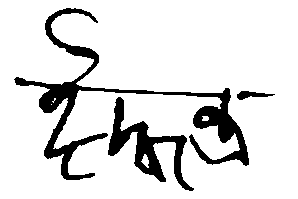

/content/gdrive/MyDrive/customTF2/data/Test/22156.bmp
Loading model...Done! Took 47.297587156295776 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22156.bmp... 9
10
hoye ja
[ 3.  3. 63. 78. 79. 78. 78. 33. 79.]
hoye ja
[78.  3. 69. 28. 83. 83. 32.  2.  2. 39.]
Done
19


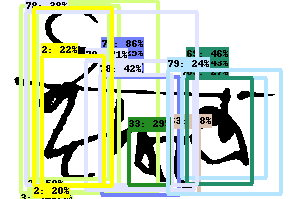

0.9426264 [0.00921818 0.1226787  0.9637588  0.53055537] 1
0.9416751 [0.03173908 0.06762458 0.96928614 0.40223554] TUKI3
0
0.86306006 [0.39177114 0.34136623 0.9797277  0.6023422 ] TUKI3
0
0.780824 [0.642812   0.5696955  0.97138715 0.66859984] 1
0.7111234 [0.3098485 0.2862447 0.9499199 0.6534553] TUKI3
0
0.58671975 [0.0117788  0.09319638 0.89741063 0.36884284] TUKI3
0
0.5743502 [0.39312592 0.6083837  0.8901457  0.8936644 ] 1
0.45887733 [0.39631245 0.62660116 0.9211912  0.8464784 ] TUKI3
0
0.43005738 [0.39631245 0.62660116 0.9211912  0.8464784 ] TUKI3
0
0.42021713 [0.38157916 0.33460137 0.9362761  0.5785556 ] TUKI3
0
0.37619746 [0.06103348 0.08657717 0.9255271  0.661444  ] TUKI3
0
0.2904244 [0.6582682  0.43150946 0.92753804 0.5684469 ] TUKI3
0
0.26723146 [0.39631245 0.62660116 0.9211912  0.8464784 ] TUKI3
0
0.25124344 [0.39177114 0.34136623 0.9797277  0.6023422 ] TUKI3
0
0.24243629 [0.39177114 0.34136623 0.9797277  0.6023422 ] TUKI3
0
0.2364769 [0.35268775 0.56219137 0.9742484  0.9433801 

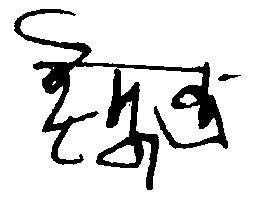

/content/gdrive/MyDrive/customTF2/data/Test/22157.bmp
Loading model...Done! Took 49.22663474082947 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22157.bmp... 8
9
hoye ja
[78. 78. 28. 79.  3. 69.  2.  3.]
hoye ja
[79.  3. 78. 28.  2. 69. 76. 83. 83.]
Done
17


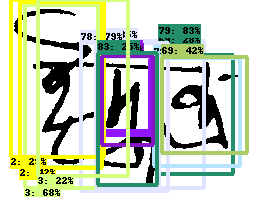

0.84775066 [0.21075413 0.3579106  0.95289856 0.76788   ] 1
0.83200085 [0.28132182 0.59760946 0.8799344  0.87660605] TUKI3
0
0.7886786 [0.21978763 0.3028178  0.9672224  0.63482213] TUKI3
0
0.76593405 [0.2693345  0.37662798 0.6603727  0.5666688 ] TUKI3
0
0.69945765 [0.29759857 0.5777327  0.8381509  0.90498567] TUKI3
0
0.67736256 [0.0084169  0.09098344 0.9505229  0.37045863] TUKI3
1
0.65430874 [0.02997965 0.07312639 0.8475818  0.3864892 ] TUKI3
TUKI3
0
0.58903205 [0.29004198 0.36295086 0.9601808  0.60053325] TUKI3
0
0.4731154 [0.2787618  0.37747666 0.68236375 0.5704204 ] TUKI3
0
0.42406037 [0.29095465 0.60585624 0.77453476 0.93210614] TUKI3
1
0.41550273 [0.01484862 0.07405767 0.8490237  0.38473558] TUKI3
TUKI3
0
0.292176 [0.         0.03889474 0.7958772  0.3940475 ] TUKI3
TUKI3
0
0.28062716 [0.28132182 0.59760946 0.8799344  0.87660605] TUKI3
0
0.26326004 [0.28485948 0.38117662 0.73154217 0.5762172 ] TUKI3
0
0.25332054 [0.27174    0.36474943 0.93413246 0.5937476 ] TUKI3
0
0.22363119 [0.001

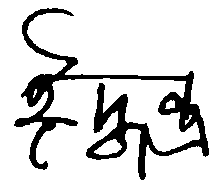

/content/gdrive/MyDrive/customTF2/data/Test/22158.bmp
Loading model...Done! Took 49.88284945487976 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22158.bmp... 11
6
hoye ja
[78.  2. 79. 78. 89. 79. 28.  3. 66. 22.  3.]
hoye ja
[ 2. 78. 79. 84.  3. 79.]
Done
17


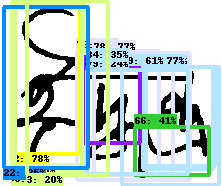

0.94272614 [0.27659672 0.34425214 0.9668466  0.71946394] 1
0.81172156 [0.01425135 0.04998355 0.9084357  0.37398505] TUKI3
1
0.8074898 [0.36488655 0.3694444  0.9374074  0.7800163 ] TUKI3
0
0.78372145 [0.01622574 0.0612747  0.82667524 0.36332428] TUKI3
TUKI3
0
0.7836247 [0.36047927 0.6564548  0.8886839  0.97227716] TUKI3
1
0.773966 [0.28715557 0.41929042 0.96743256 0.8597164 ] TUKI3
0
0.7725694 [0.36496863 0.63981116 0.90783894 0.96173847] TUKI3
TUKI3
0
0.69148666 [0.02249584 0.05927709 0.88615733 0.36995748] TUKI3
0
0.60519314 [0.3633223  0.547469   0.99124783 0.98853576] TUKI3
TUKI3
0
0.483254 [0.3680739  0.38228056 0.7669841  0.63204366] TUKI3
0
0.4559976 [0.0159605  0.06530485 0.93422025 0.36955208] TUKI3
TUKI3
0
0.40578428 [0.68779325 0.6053034  0.93907607 0.94237447] TUKI3
TUKI3
0
0.35160094 [0.37803796 0.39079416 0.9330535  0.84997785] TUKI3
0
0.27476284 [0.01425135 0.04998355 0.9084357  0.37398505] TUKI3
TUKI3
0
0.24519524 [0.03973186 0.01422197 0.90056396 0.39640737] TUKI3
TUKI3

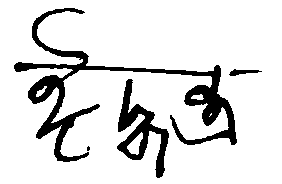

/content/gdrive/MyDrive/customTF2/data/Test/22159.bmp
Loading model...Done! Took 50.20495629310608 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22159.bmp... 7
8
hoye ja
[ 3. 78. 78. 79.  3. 79. 60.]
hoye ja
[ 3. 79. 78. 69. 83. 25. 28. 70.]
Done
15


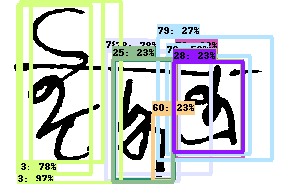

0.9677586 [0.02978867 0.06043583 0.94497937 0.32353002] 1
0.9528819 [0.27988282 0.37264442 0.9788113  0.636274  ] 1
0.7774966 [0.0089038  0.07315211 0.8768718  0.36635876] TUKI3
0
0.7769862 [0.2862947  0.40847653 0.940245   0.7496811 ] TUKI3
0
0.6160435 [0.33529288 0.6208113  0.8605189  0.86243874] TUKI3
1
0.5229149 [0.3085892  0.59027976 0.83675724 0.8895719 ] TUKI3
TUKI3
0
0.4313837 [0.32242483 0.39934015 0.97013277 0.6106695 ] TUKI3
0
0.4110168 [0.33426636 0.6177253  0.82467026 0.86071914] TUKI3
TUKI3
0
0.34652725 [0.3273855 0.4008388 0.9776729 0.618231 ] TUKI3
0
0.2881386 [0.00877621 0.10886428 0.99397385 0.42970663] TUKI3
0
0.273367 [0.2033099  0.55875844 0.86480546 0.9674411 ] TUKI3
TUKI3
0
0.23194249 [0.62340987 0.54020715 0.9831332  0.61438864] TUKI3
0
0.23043652 [0.32120702 0.39816278 0.9837767  0.61564726] TUKI3
0
0.2286105 [0.3411708  0.61422485 0.8232871  0.86234516] TUKI3
TUKI3
0
0.20064534 [0.33529288 0.6208113  0.8605189  0.86243874] TUKI3
TUKI3
0
['ঈ', 'দ্ধ', 'ন্ত্র']
[

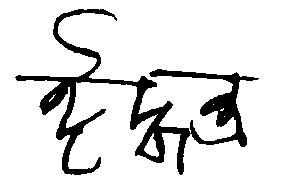

/content/gdrive/MyDrive/customTF2/data/Test/22160.bmp
Loading model...Done! Took 49.67390012741089 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22160.bmp... 6
11
hoye ja
[78.  3. 70. 60. 70. 87.]
hoye ja
[ 3. 78. 25. 69.  2. 82. 88. 29. 28. 70. 83.]
Done
17


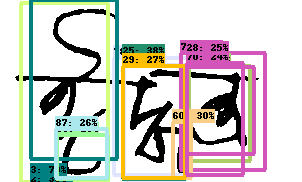

0.8890673 [0.32162392 0.37706316 0.96110034 0.6238305 ] 1
0.87810767 [0.01667019 0.0681397  0.99973553 0.3576524 ] 1
0.794127 [0.         0.10027596 0.87002444 0.39049217] TUKI3
TUKI3
0
0.5570819 [0.36138955 0.4077577  0.9901087  0.6136952 ] TUKI3
0
0.39559653 [0.29547596 0.5987286  0.9308212  0.8775322 ] TUKI3
1
0.38423312 [0.36787993 0.40433913 0.9803352  0.6138223 ] TUKI3
0
0.34445506 [0.36641252 0.62329376 0.8813746  0.8305769 ] TUKI3
TUKI3
0
0.33121088 [0.         0.10027596 0.87002444 0.39049217] TUKI3
TUKI3
0
0.3243673 [0.         0.10027596 0.87002444 0.39049217] TUKI3
TUKI3
0
0.29556176 [0.67265517 0.57193524 0.97766125 0.6325476 ] TUKI3
0
0.2907773 [0.3730815 0.6176519 0.8430086 0.8423663] TUKI3
TUKI3
0
0.2905609 [0.74213386 0.18689018 0.98208416 0.3578872 ] TUKI3
0
0.27012435 [0.367873  0.4067657 0.9739041 0.6145246] TUKI3
0
0.2622109 [0.7142405  0.18416013 0.97791404 0.3549049 ] TUKI3
0
0.24973848 [0.34880528 0.6168925  0.9565456  0.8055307 ] TUKI3
TUKI3
0
0.24228399 [0.348

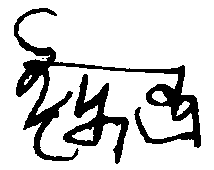

/content/gdrive/MyDrive/customTF2/data/Test/22161.bmp
Loading model...Done! Took 47.292258739471436 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22161.bmp... 10
6
hoye ja
[28. 79. 78.  3. 78. 66. 46. 69. 89. 78.]
hoye ja
[79. 78.  3.  3. 29. 32.]
Done
16


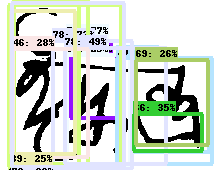

0.86390835 [0.35705712 0.6165     0.89159405 0.97962403] 1
0.8238564 [0.328408   0.3284575  0.68994844 0.5480264 ] 1
0.77157867 [0.32523566 0.31264365 0.9758666  0.6096594 ] TUKI3
0
0.74721265 [0.03360212 0.05422568 0.9765953  0.37262115] TUKI3
1
0.7469295 [0.34439528 0.54212767 0.9590945  0.990758  ] TUKI3
0
0.71861684 [0.24367362 0.24327967 0.99037963 0.6179863 ] TUKI3
TUKI3
0
0.71413594 [0.         0.06228824 0.9599757  0.41193488] TUKI3
TUKI3
0
0.52743596 [0.03211418 0.03747123 0.97897303 0.568611  ] TUKI3
0
0.48783728 [0.28309923 0.3020762  0.96176845 0.7789306 ] TUKI3
TUKI3
0
0.35086158 [0.6759886  0.62323916 0.8841679  0.9479287 ] TUKI3
0
0.3033787 [0.32523566 0.31264365 0.9758666  0.6096594 ] TUKI3
0
0.2840245 [0.2885189  0.05644841 0.91880393 0.41184652] TUKI3
TUKI3
0
0.2606595 [0.35846233 0.63502854 0.8471498  0.97435033] TUKI3
0
0.2526834 [0.06869473 0.04722166 0.9048111  0.35065588] TUKI3
0
0.247612 [0.32523566 0.31264365 0.9758666  0.6096594 ] TUKI3
0
0.2035978 [0.02287334

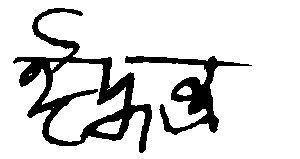

/content/gdrive/MyDrive/customTF2/data/Test/22162.bmp
Loading model...Done! Took 48.637247800827026 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22162.bmp... 9
9
hoye ja
[ 3. 78. 33. 60. 66. 79. 28. 78. 29.]
hoye ja
[83.  3. 79. 28. 25. 83. 17. 48. 82.]
Done
18


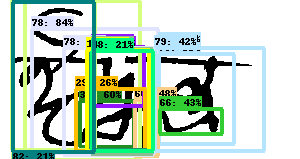

0.8830238 [0.00815109 0.08314245 1.         0.46827966] 1
0.8415648 [0.18471049 0.1038141  0.9594934  0.5295063 ] TUKI3
0
0.6240668 [0.34244087 0.5270458  0.9047687  0.7803127 ] 1
0.6001461 [0.6394234  0.26423508 0.9225169  0.44887996] TUKI3
0
0.5590123 [0.00600258 0.03903729 0.9379835  0.31802404] TUKI3
0
0.55434936 [0.34244087 0.5270458  0.9047687  0.7803127 ] TUKI3
0
0.47547016 [0.6297489  0.44684812 0.9807778  0.52766347] TUKI3
TUKI3
1
0.4318446 [0.68736595 0.53273344 0.83907527 0.74096954] TUKI3
0
0.41529572 [0.30484742 0.513518   0.9468077  0.8810438 ] TUKI3
0
0.40646872 [0.30061838 0.3046627  0.66087794 0.48231167] TUKI3
0
0.38891265 [0.3135805  0.31158727 0.93839717 0.50716823] TUKI3
0
0.31775448 [0.30505773 0.21022303 0.97230077 0.51159465] TUKI3
0
0.3053335 [0.31413317 0.30595818 0.9629655  0.50769097] TUKI3
0
0.26215127 [0.5633793  0.25322336 0.9434504  0.4849751 ] TUKI3
0
0.22014813 [0.32307854 0.30149946 0.9375422  0.50508696] TUKI3
0
0.2170583 [0.3147547  0.2889549  0.949

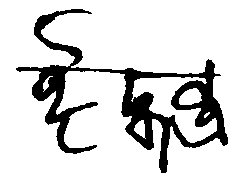

/content/gdrive/MyDrive/customTF2/data/Test/22163.bmp
Loading model...Done! Took 46.67030191421509 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22163.bmp... 5
7
hoye ja
[ 3. 78. 78. 78.  2.]
hoye ja
[ 3. 78. 79. 69. 37. 83. 76.]
Done
12


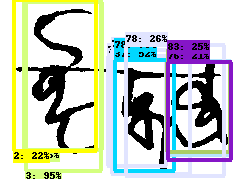

0.9566585 [0.01617089 0.09411682 0.83673656 0.4167834 ] 1
0.94986033 [0.00119118 0.10215656 0.9528561  0.4104207 ] TUKI3
0
0.89623094 [0.31737348 0.43534645 0.9251445  0.6742691 ] 1
0.8744742 [0.28463    0.45188248 0.9716029  0.7713192 ] TUKI3
0
0.7636866 [0.34025145 0.46226966 0.95347357 0.70639455] TUKI3
0
0.7393595 [0.3462249  0.67745745 0.8658284  0.9341452 ] 1
0.6290422 [0.34900057 0.6759677  0.8469105  0.9336777 ] TUKI3
0
0.52052355 [0.34025145 0.46226966 0.95347357 0.70639455] TUKI3
0
0.2608526 [0.25332627 0.50706226 0.9814334  0.9084874 ] TUKI3
0
0.25056776 [0.3516314 0.6779292 0.8911513 0.9388246] TUKI3
0
0.22450055 [0.         0.05278167 0.8421538  0.38912705] TUKI3
0
0.21283847 [0.3516314 0.6779292 0.8911513 0.9388246] TUKI3
0
['ঈ', 'দ্ধ', 'ন্ত্র']
['ঈ', 'দ্ধ', 'ন্ত্র']
ঈদ্ধন্ত্রA-----------------------------------------------------------
[[2.8945891559123993, 23.24685500562191, 149.77584421634674, 102.9454979300499, 3], [56.809853702783585, 107.53057423233986, 165.600864350

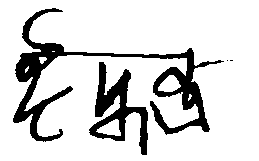

/content/gdrive/MyDrive/customTF2/data/Test/22164.bmp
Loading model...Done! Took 46.84532070159912 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22164.bmp... 13
7
hoye ja
[78.  3. 78. 79. 28. 78. 71. 78. 60. 78. 79. 33. 29.]
hoye ja
[78. 79.  3. 73. 71. 83.  2.]
Done
20


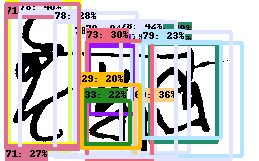

0.97079575 [0.23162666 0.28937775 0.9635752  0.60147095] 1
0.87236524 [0.01542942 0.03232857 0.9413827  0.2709144 ] 1
0.8551576 [0.26077223 0.33396506 0.9869281  0.5882737 ] TUKI3
0
0.8428295 [0.22202045 0.33096337 0.94795024 0.731914  ] TUKI3
0
0.78693116 [0.27942815 0.57848233 0.8815391  0.8389352 ] TUKI3
1
0.7019049 [0.27019438 0.50720227 0.9678631  0.93545365] TUKI3
TUKI3
0
0.66416764 [0.2876947  0.34258693 0.7025098  0.52230924] TUKI3
0
0.6026163 [0.01219055 0.02612184 0.8915421  0.31218338] TUKI3
TUKI3
0
0.4152725 [0.20281498 0.46372625 0.9928024  0.8941615 ] TUKI3
TUKI3
0
0.4092434 [0.10641811 0.0210164  0.9027081  0.30550605] TUKI3
TUKI3
0
0.3951234 [0.08372665 0.07455667 0.95821196 0.53179634] TUKI3
0
0.35554042 [0.62784374 0.5182666  0.98267317 0.5880221 ] TUKI3
0
0.2983558 [0.2570828  0.33459115 0.9943578  0.5877583 ] TUKI3
0
0.28301054 [0.13792278 0.21035895 0.96964675 0.6819063 ] TUKI3
0
0.26536217 [0.03053969 0.02234921 0.9213324  0.30882552] TUKI3
TUKI3
0
0.25858042 [0.2

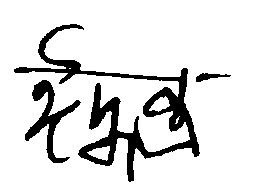

/content/gdrive/MyDrive/customTF2/data/Test/22165.bmp
Loading model...Done! Took 46.938929080963135 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22165.bmp... 9
7
hoye ja
[78. 78. 28.  3. 79. 79. 71.  3. 78.]
hoye ja
[ 3. 79. 78. 20. 71. 38. 39.]
Done
16


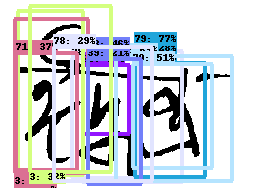

0.96337587 [0.31165564 0.28457636 0.94247913 0.54465383] 1
0.9388162 [0.27366042 0.3275427  0.96308464 0.72196025] TUKI3
0
0.8938552 [0.34898415 0.32700092 0.7105264  0.51374114] TUKI3
0
0.8915521 [0.05987926 0.07016617 0.9293516  0.33061624] TUKI3
1
0.78067243 [0.10567841 0.0553658  0.9158453  0.3501298 ] TUKI3
TUKI3
0
0.77216685 [0.33958602 0.5303713  0.9388958  0.8130808 ] TUKI3
1
0.63325125 [0.2988862  0.45533076 0.9585727  0.917959  ] TUKI3
TUKI3
0
0.51098275 [0.34530625 0.52233803 0.8890597  0.8400778 ] TUKI3
TUKI3
0
0.4607905 [0.31508648 0.34559298 0.9781872  0.55942607] TUKI3
0
0.3715514 [0.28308415 0.06012049 0.90075344 0.30661342] TUKI3
TUKI3
0
0.32343906 [0.03295612 0.11588948 0.9097743  0.43919095] TUKI3
0
0.2897635 [0.25523964 0.21128894 0.9587381  0.60421336] TUKI3
0
0.28335243 [0.33958602 0.5303713  0.9388958  0.8130808 ] TUKI3
TUKI3
0
0.22787815 [0.10567841 0.0553658  0.9158453  0.3501298 ] TUKI3
TUKI3
0
0.2174017 [0.33958602 0.5303713  0.9388958  0.8130808 ] TUKI3
TUKI

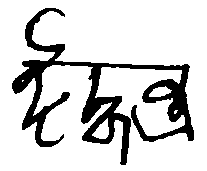

/content/gdrive/MyDrive/customTF2/data/Test/22166.bmp
Loading model...Done! Took 48.48233461380005 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22166.bmp... 6
7
hoye ja
[ 3. 78. 78. 79. 70. 78.]
hoye ja
[ 3. 79. 78. 78. 20. 71. 82.]
Done
13


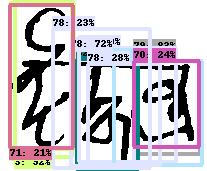

0.9155154 [0.         0.06918139 0.9161999  0.35256135] 1
0.86995745 [0.0216777  0.0446732  0.86752844 0.35829133] TUKI3
0
0.8303657 [0.36094645 0.6426785  0.8991835  0.9678054 ] 1
0.8016315 [0.3477423  0.36792633 0.98282814 0.6680707 ] TUKI3
1
0.79239255 [0.28292492 0.37977514 0.9449211  0.8533968 ] TUKI3
0
0.7228997 [0.29733783 0.34253806 0.9688211  0.65199417] TUKI3
TUKI3
TUKI3
0
0.40210354 [0.35759467 0.54710364 0.964885   0.9797077 ] TUKI3
0
0.28013328 [0.37771863 0.42463812 0.9601074  0.7742021 ] TUKI3
TUKI3
0
0.251175 [0.36094645 0.6426785  0.8991835  0.9678054 ] TUKI3
0
0.2389849 [0.35934356 0.6449664  0.8588208  0.9615542 ] TUKI3
0
0.23204058 [0.174277   0.25371847 0.97849685 0.7269817 ] TUKI3
TUKI3
TUKI3
0
0.21434765 [0.02927187 0.04416761 0.8608302  0.35616654] TUKI3
0
0.2094794 [0.3477423  0.36792633 0.98282814 0.6680707 ] TUKI3
TUKI3
0
['ঈ', 'দ্ধ', 'ন্ত্র']
['ঈ', 'দ্ধ', 'ন্ত্র']
ঈদ্ধন্ত্রA-----------------------------------------------------------
[[0.0, 14.320547752082348

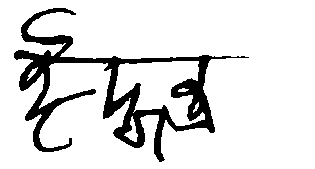

/content/gdrive/MyDrive/customTF2/data/Test/22167.bmp
Loading model...Done! Took 50.4578070640564 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22167.bmp... 5
11
hoye ja
[78.  3. 79. 78. 66.]
hoye ja
[83.  3. 78. 77. 37. 17. 76. 38. 25. 45. 39.]
Done
16


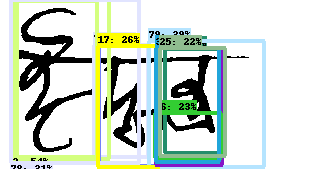

0.8004426 [0.27210805 0.2976169  0.92548215 0.47273523] 1
0.6678588 [0.2906001  0.52364784 0.90016305 0.71352464] 1
0.6341258 [0.         0.05203025 0.94081163 0.34866565] TUKI3
1
0.5438913 [0.01145118 0.03984247 0.92403287 0.30855197] TUKI3
TUKI3
0
0.5356365 [0.2738312  0.31299278 0.9775061  0.5044788 ] TUKI3
0
0.40568003 [0.2738312  0.31299278 0.9775061  0.5044788 ] TUKI3
0
0.39428473 [0.24273255 0.47177032 0.98741204 0.84054565] TUKI3
TUKI3
0
0.36764058 [0.2738312  0.31299278 0.9775061  0.5044788 ] TUKI3
0
0.30832157 [0.        0.0347647 0.9639101 0.4440689] TUKI3
0
0.25549597 [0.27615428 0.30950937 0.9872047  0.50495446] TUKI3
0
0.24980204 [0.2875587  0.49348348 0.97078526 0.7078518 ] TUKI3
0
0.23489851 [0.6686956  0.4894656  0.93223095 0.7043602 ] TUKI3
0
0.22688225 [0.28648236 0.49266526 0.9538784  0.69697297] TUKI3
0
0.21988022 [0.28452852 0.5062506  0.9210508  0.714924  ] TUKI3
0
0.21066806 [0.2738312  0.31299278 0.9775061  0.5044788 ] TUKI3
0
0.20307617 [0.2738312  0.31299278 

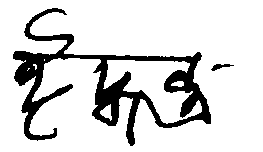

/content/gdrive/MyDrive/customTF2/data/Test/22168.bmp
Loading model...Done! Took 51.92922377586365 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22168.bmp... 8
8
hoye ja
[78.  3. 29. 89. 78. 79. 72.  2.]
hoye ja
[79.  3. 77. 78. 37.  2. 69. 39.]
Done
16


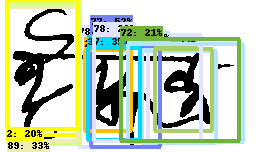

0.74581075 [0.25501418 0.2970605  0.96128434 0.56571406] 1
0.67235506 [0.33659804 0.53913695 0.93586814 0.82295257] TUKI3
1
0.6159149 [0.         0.03002612 0.88520455 0.3014745 ] TUKI3
1
0.52374876 [0.3076955  0.3429721  0.96166396 0.61121494] TUKI3
0
0.48127833 [0.02353214 0.02962868 0.9456929  0.30555353] TUKI3
TUKI3
0
0.45928594 [0.3076955  0.3429721  0.96166396 0.61121494] TUKI3
0
0.39411378 [0.33277887 0.32158458 0.86119574 0.49943608] TUKI3
0
0.3487508 [0.32077292 0.33329052 0.91973984 0.53536683] TUKI3
0
0.34853265 [0.         0.03002612 0.88520455 0.3014745 ] TUKI3
TUKI3
0
0.32962406 [0.05115994 0.02674077 0.9222829  0.29308316] TUKI3
0
0.320986 [0.32762453 0.58576465 0.8607812  0.8098265 ] TUKI3
0
0.23052277 [0.3076955  0.3429721  0.96166396 0.61121494] TUKI3
0
0.22658242 [0.23445351 0.3572979  0.92626077 0.76547664] TUKI3
0
0.21420924 [0.29464585 0.48642933 0.9290382  0.92575645] TUKI3
TUKI3
0
0.20673142 [0.2605969  0.45889482 0.92264616 0.9114772 ] TUKI3
TUKI3
0
0.2035166 [

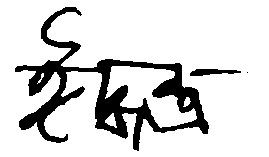

/content/gdrive/MyDrive/customTF2/data/Test/22169.bmp
Loading model...Done! Took 48.72317314147949 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22169.bmp... 6
14
hoye ja
[ 3. 78. 78. 66. 29.  2.]
hoye ja
[ 2. 13. 79. 11. 37. 33.  3. 70. 76. 69. 28. 38. 39. 19.]
Done
20


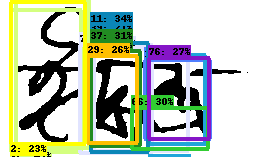

0.9499748 [0.06558435 0.03925484 0.9642761  0.30273625] 1
0.85952973 [0.29148293 0.2949171  0.9704229  0.5669427 ] TUKI3
1
0.71236277 [0.3166245 0.3458751 0.9560264 0.6997615] TUKI3
0
0.44509313 [0.00499105 0.05862334 0.9395267  0.3319764 ] TUKI3
0
0.43588874 [0.38371837 0.5380801  0.8843688  0.78258014] TUKI3
1
0.3925527 [0.35251155 0.5506298  0.91306734 0.76514727] TUKI3
TUKI3
0
0.3374004 [0.2774914  0.3376407  0.96738786 0.55021685] TUKI3
0
0.30583492 [0.32799312 0.33529034 0.9298024  0.5217552 ] TUKI3
0
0.2974326 [0.69218504 0.48799902 0.9469955  0.7758563 ] TUKI3
TUKI3
0
0.29639116 [0.32799312 0.33529034 0.9298024  0.5217552 ] TUKI3
0
0.29115453 [0.00499105 0.05862334 0.9395267  0.3319764 ] TUKI3
0
0.28174466 [0.35251155 0.5506298  0.91306734 0.76514727] TUKI3
TUKI3
0
0.26778054 [0.3729557 0.550364  0.8815297 0.7776984] TUKI3
TUKI3
0
0.25911108 [0.35251155 0.5506298  0.91306734 0.76514727] TUKI3
TUKI3
0
0.25521302 [0.3624084  0.32492843 0.9093314  0.5110519 ] TUKI3
0
0.234936 [0.0

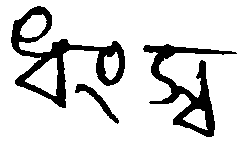

/content/gdrive/MyDrive/customTF2/data/Test/22170.bmp
Loading model...Done! Took 48.24243688583374 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22170.bmp... 7
5
hoye ja
[29. 48. 73. 48. 66. 41. 29.]
hoye ja
[73. 29. 48.  6. 29.]
Done
12


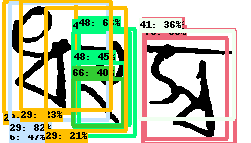

0.9958716 [0.01820195 0.01493078 0.78413886 0.3034471 ] 1
0.9606489 [0.23036851 0.28953892 0.8694267  0.52146316] TUKI3
1
0.9549115 [0.21017385 0.56855667 1.         0.93888664] 1
0.9314627 [0.26930994 0.5740035  0.9662369  0.90481883] TUKI3
0
0.81889117 [0.02361628 0.03658779 0.8346803  0.43147808] TUKI3
0
0.65849876 [0.20816287 0.31248468 0.94643235 0.53934866] TUKI3
0
0.46638015 [0.02361628 0.03658779 0.8346803  0.43147808] TUKI3
0
0.4511213 [0.44648078 0.29099864 0.8824879  0.5011213 ] TUKI3
TUKI3
0
0.4038183 [0.55535465 0.29022646 0.8769972  0.49373892] TUKI3
TUKI3
0
0.36407056 [0.21982393 0.5539765  0.82689005 0.9328318 ] TUKI3
0
0.23490006 [0.01379897 0.08131981 0.7627453  0.44588992] TUKI3
0
0.2071366 [0.06134734 0.1794944  0.91366637 0.50583565] TUKI3
TUKI3
0
['ধ', 'ং', 'স্ব']
['ধ', 'ং', 'স্ব']
ধংস্বA-----------------------------------------------------------
[[2.602878451347351, 3.7476248564198613, 112.13185673952103, 76.16522148251534, 29], [32.942696914076805, 72.6742689013

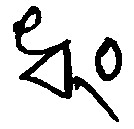

/content/gdrive/MyDrive/customTF2/data/Test/22171.bmp
Loading model...Done! Took 46.26102685928345 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22171.bmp... 7
5
hoye ja
[29. 48.  6. 66. 29. 49.  6.]
hoye ja
[ 6. 48. 29. 46. 91.]
Done
12


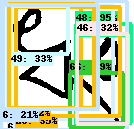

0.9552779 [0.01716007 0.06065237 0.83296245 0.61073184] 1
0.9469515 [0.19365859 0.56353384 0.9507448  0.9836204 ] TUKI3
1
0.8559434 [0.05385345 0.05232611 0.9165412  0.8491448 ] TUKI3
0
0.75806075 [0.2732624  0.56463885 0.9850986  0.9550005 ] TUKI3
TUKI3
0
0.6896542 [0.01437977 0.         1.         0.9481169 ] TUKI3
0
0.68844503 [0.5725258  0.51543325 0.9781094  0.9243497 ] TUKI3
TUKI3
0
0.3536007 [0.05785709 0.11298037 0.8964702  0.8985041 ] TUKI3
0
0.33003542 [0.05402912 0.07569472 0.41534027 0.511777  ] TUKI3
0
0.3214132 [0.03178322 0.06690964 0.8314524  0.70633304] TUKI3
0
0.31759986 [0.27032176 0.57312596 0.9548918  0.956198  ] TUKI3
TUKI3
0
0.22123553 [0.05385345 0.05232611 0.9165412  0.8491448 ] TUKI3
0
0.206509 [0.04479191 0.01774173 0.84473586 0.7348442 ] TUKI3
0
['ধ', 'ং']
['ধ', 'ং']
ধংA-----------------------------------------------------------
[[2.2136491667479277, 8.127417281270027, 107.45215648412704, 81.83806657791138, 29], [24.981958150863647, 75.5135349035263, 122.646

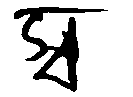

/content/gdrive/MyDrive/customTF2/data/Test/22172.bmp
Loading model...Done! Took 46.68576240539551 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22172.bmp... 2
2
hoye ja
[73. 78.]
hoye ja
[73. 40.]
Done
4


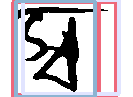

0.9202676 [0.02324543 0.09340084 1.         0.8759781 ] 1
0.894998 [0.01745141 0.09944442 0.97360003 0.7496629 ] TUKI3
0
0.2641221 [0.         0.16554445 0.96689576 0.8967167 ] TUKI3
0
0.23611487 [0.01457098 0.11691415 0.9924772  0.71438324] TUKI3
0
['স্ব']
['স্ব']
স্বA-----------------------------------------------------------
[[2.254806673154235, 12.422312177717686, 97.0, 116.50508892536163, 73]]
[[11, 5, 93, 93, 73]]
actual class 73
TP CHANGE index =  73  TP DIFFERENCE =  [-1]
confusion_matrix_row =  স্ব  COLUMN =  স্ব  DIFFERENCE =  1
TP =  [0, 49, 43, 42, 55, 36, 30, 49, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 25, 38, 45, 59, 34, 50, 47, 78, 44, 34, 47, 24, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 42, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 44, 38, 27, 13, 46, 39, 46, 32, 29, 59, 35, 30, 0, 33, 50, 50, 50, 21, 0, 27, 34, 17, 0, 17, 36]
FP =  [0, 1, 7, 0, 7, 2, 1, 28, 1, 16, 2, 1, 17, 7, 0, 10, 5, 6, 11, 0, 1, 30, 4,

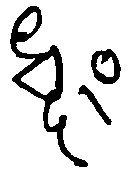

/content/gdrive/MyDrive/customTF2/data/Test/22173.bmp
Loading model...Done! Took 48.45382881164551 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22173.bmp... 10
6
hoye ja
[29. 48. 48. 71. 48. 29. 29. 87. 71. 46.]
hoye ja
[87. 29. 48. 12.  8. 49.]
Done
16


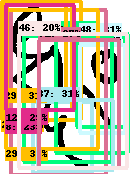

0.98677546 [0.00789111 0.01304407 0.68862534 0.61298275] 1
0.9311081 [0.5871807  0.24168696 0.9888086  0.69524795] TUKI3
1
0.92181534 [0.2154463  0.5781572  0.727834   0.94165707] TUKI3
TUKI3
1
0.9134886 [0.19888212 0.41428688 0.87498766 0.9625541 ] TUKI3
TUKI3
TUKI3
0
0.9012869 [0.02916452 0.04758513 0.6316711  0.54780984] TUKI3
0
0.8109797 [0.2592575 0.5944428 0.7630995 0.9407955] TUKI3
TUKI3
TUKI3
0
0.47100857 [0.0576429  0.08010753 1.         0.79791915] TUKI3
0
0.4151162 [0.2079968  0.17506142 0.9264652  0.8485504 ] TUKI3
0
0.3544307 [0.06015679 0.04382393 0.85475975 0.7429998 ] TUKI3
0
0.3091131 [0.01869162 0.03403894 0.517227   0.5017797 ] TUKI3
0
0.30781603 [0.5753486  0.28410727 0.9739178  0.85593635] TUKI3
TUKI3
0
0.2898234 [0.02910396 0.04180524 0.6266389  0.56000495] TUKI3
0
0.27319157 [0.2318985  0.29172784 0.9638216  0.89919806] TUKI3
TUKI3
0
0.23172817 [0.02910396 0.04180524 0.6266389  0.56000495] TUKI3
0
0.22892684 [0.2592575 0.5944428 0.7630995 0.9407955] TUKI3
TUKI3
T

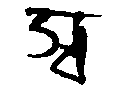

/content/gdrive/MyDrive/customTF2/data/Test/22174.bmp
Loading model...Done! Took 52.02587103843689 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22174.bmp... 2
1
hoye ja
[73. 41.]
hoye ja
[73.]
Done
3


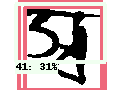

0.96547794 [0.08771961 0.19782229 0.99725693 0.85658616] 1
0.9388005 [0.03294146 0.15169215 0.99477065 0.8368595 ] TUKI3
0
0.3132199 [0.05542816 0.12876497 0.6861418  0.85391957] TUKI3
0
['স্ব']
['স্ব']
স্বA-----------------------------------------------------------
[[7.894765064120293, 24.332141384482384, 89.75312411785126, 105.36009746789932, 73]]
[[22, 6, 89, 86, 73]]
actual class 73
TP CHANGE index =  73  TP DIFFERENCE =  [-1]
confusion_matrix_row =  স্ব  COLUMN =  স্ব  DIFFERENCE =  1
TP =  [0, 49, 43, 42, 55, 36, 30, 49, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 25, 38, 45, 59, 34, 50, 48, 78, 44, 34, 47, 24, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 43, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 44, 38, 27, 13, 46, 40, 46, 32, 29, 59, 35, 30, 0, 33, 50, 50, 50, 21, 0, 28, 34, 17, 0, 17, 36]
FP =  [0, 1, 7, 0, 7, 2, 1, 28, 1, 16, 2, 1, 17, 7, 0, 10, 5, 6, 11, 0, 1, 30, 4, 13, 2, 12, 14, 1, 15, 5, 3, 5, 0, 6, 4, 21, 3, 7,

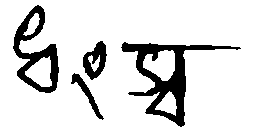

/content/gdrive/MyDrive/customTF2/data/Test/22175.bmp
Loading model...Done! Took 48.726398944854736 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22175.bmp... 7
4
hoye ja
[48. 29. 73. 49. 58. 29. 29.]
hoye ja
[29. 48. 73.  6.]
Done
11


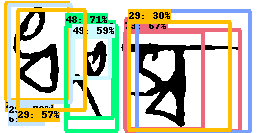

0.998409 [0.25263557 0.25650397 0.8847039  0.43282887] 1
0.99554646 [0.02559374 0.02220049 0.7474027  0.26391226] TUKI3
1
0.7323852 [0.03993168 0.03287178 0.76509774 0.27188942] TUKI3
TUKI3
0
0.714614 [0.22837315 0.47610962 0.9825194  0.9128484 ] 1
0.70766973 [0.19636008 0.25026554 0.9777386  0.447137  ] TUKI3
0
0.67002285 [0.24683145 0.474107   0.9659058  0.77205694] TUKI3
0
0.59416467 [0.28194878 0.27640882 0.58591306 0.4185913 ] TUKI3
0
0.57532525 [0.08439211 0.51724505 0.98923063 0.953048  ] TUKI3
0
0.5665573 [0.07869598 0.0682031  0.82355124 0.32517216] TUKI3
TUKI3
0
0.29669294 [0.1702217  0.48878914 0.97534    0.8771874 ] TUKI3
0
0.26652375 [0.03993168 0.03287178 0.76509774 0.27188942] TUKI3
TUKI3
0
['ধ', 'ং', 'স্ব']
['ধ', 'ং', 'স্ব']
ধংস্বA-----------------------------------------------------------
[[33.600530594587326, 67.46054396033287, 117.66561532020569, 113.83399370312691, 48], [3.403967782855034, 5.8387277368456125, 99.40456277132034, 69.40892452001572, 29], [30.3736296147

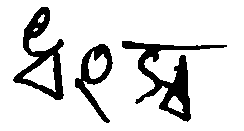

/content/gdrive/MyDrive/customTF2/data/Test/22176.bmp
Loading model...Done! Took 48.71384572982788 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22176.bmp... 6
4
hoye ja
[29. 48. 73. 29. 78. 46.]
hoye ja
[29. 73. 48. 46.]
Done
10


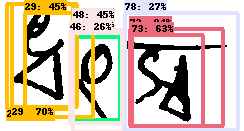

0.9960134 [0.03714185 0.02795149 0.8263469  0.29929608] 1
0.95211875 [0.2852017 0.291558  0.9084626 0.492769 ] TUKI3
1
0.94390625 [0.22379047 0.53204525 0.96011245 0.91762835] 1
0.7009025 [0.03185019 0.04644512 0.8153547  0.31929797] TUKI3
0
0.6273441 [0.26820573 0.53923655 0.97084045 0.8359045 ] TUKI3
0
0.44837046 [0.10637878 0.10118539 0.88931084 0.38200727] TUKI3
0
0.4465579 [0.23113197 0.29786122 1.         0.5048112 ] TUKI3
TUKI3
0
0.26585254 [0.10387208 0.5100152  0.987512   0.97692704] TUKI3
0
0.25930274 [0.25367478 0.2832244  0.9367806  0.5018232 ] TUKI3
TUKI3
0
0.23609574 [0.23113197 0.29786122 1.         0.5048112 ] TUKI3
TUKI3
0
['ধ', 'ং', 'স্ব']
['ধ', 'ং', 'স্ব']
ধংস্বA-----------------------------------------------------------
[[4.865582622587681, 6.820164047181606, 108.25144052505493, 73.02824378013611, 29], [37.361422508955, 71.14015138149261, 119.00859850645065, 120.2356367111206, 48], [29.31655114889145, 129.81903982162476, 125.7747312784195, 223.9013168811798, 73]]
[[

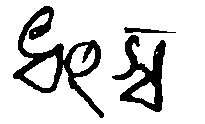

/content/gdrive/MyDrive/customTF2/data/Test/22177.bmp
Loading model...Done! Took 46.47832632064819 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22177.bmp... 11
7
hoye ja
[29. 73. 26. 48. 29. 48. 88. 71. 29. 78.  6.]
hoye ja
[73. 29.  6. 46. 29. 48. 40.]
Done
18


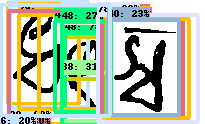

0.9882931 [0.03190639 0.0350076  0.83318055 0.3854774 ] 1
0.92083734 [0.16579151 0.53485394 0.92960775 0.87672114] 1
0.88407683 [0.01616535 0.04593553 0.8554454  0.43243593] TUKI3
0
0.84570354 [0.13960479 0.5261103  0.9368478  0.8966273 ] TUKI3
0
0.8271716 [0.30192006 0.3142018  0.63407165 0.51413155] TUKI3
1
0.77676475 [0.27148682 0.31421363 0.97759634 0.54093033] TUKI3
TUKI3
TUKI3
0
0.6507368 [0.12441974 0.08964923 0.87810546 0.49697188] TUKI3
0
0.5272729 [0.01616535 0.04593553 0.8554454  0.43243593] TUKI3
0
0.41434714 [0.1868935  0.2980271  0.9901129  0.54729867] TUKI3
TUKI3
TUKI3
0
0.37493798 [0.06264392 0.19008537 0.9989003  0.5097729 ] TUKI3
0
0.33839983 [0.17696388 0.26644367 0.89885163 0.5162314 ] TUKI3
TUKI3
0
0.30626455 [0.592917   0.29852375 0.9723863  0.52540815] TUKI3
TUKI3
1
0.29797205 [0.09415363 0.04009645 0.9284619  0.4983917 ] TUKI3
0
0.26708597 [0.18541011 0.29940736 1.         0.54362077] TUKI3
TUKI3
TUKI3
0
0.2425291 [0.15411812 0.5196398  0.948031   0.9260762 ] TU

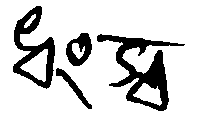

/content/gdrive/MyDrive/customTF2/data/Test/22178.bmp
Loading model...Done! Took 46.003525495529175 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22178.bmp... 8
9
hoye ja
[29.  6. 73. 48. 48. 29. 66. 29.]
hoye ja
[29. 73.  6. 40. 78.  8. 12.  2. 66.]
Done
17


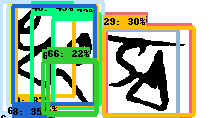

0.8709732 [0.033639   0.0392306  0.80698454 0.34103242] 1
0.8446815 [0.05915156 0.04162133 0.8783115  0.4354445 ] TUKI3
0
0.8231867 [0.25755677 0.4748262  0.97617936 0.81380606] 1
0.81218076 [0.02243905 0.         0.9573762  0.47261277] TUKI3
0
0.7940758 [0.21467684 0.48176745 0.97765905 0.8736771 ] TUKI3
0
0.7365542 [0.05942973 0.03618433 0.89204574 0.4317004 ] TUKI3
0
0.72398496 [0.16442832 0.23990658 0.90962815 0.44468832] TUKI3
1
0.6143602 [0.25645444 0.4746973  0.9802829  0.81616324] TUKI3
0
0.42939687 [0.11906726 0.14541982 0.87678957 0.46087116] TUKI3
0
0.35184544 [0.05181923 0.07019266 0.8878787  0.44679102] TUKI3
0
0.35052386 [0.05915156 0.04162133 0.8783115  0.4354445 ] TUKI3
0
0.3469393 [0.0568471  0.05666646 0.87518954 0.43647224] TUKI3
0
0.31258735 [0.5334661  0.19256437 0.956944   0.4436759 ] TUKI3
TUKI3
0
0.29712513 [0.24098761 0.4746606  0.9682198  0.888938  ] TUKI3
0
0.29605284 [0.0568471  0.05666646 0.87518954 0.43647224] TUKI3
0
0.24061602 [0.05915156 0.04162133 0.87

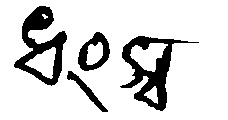

/content/gdrive/MyDrive/customTF2/data/Test/22179.bmp
Loading model...Done! Took 46.31894326210022 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22179.bmp... 7
3
hoye ja
[48. 29. 73. 48. 29. 48. 78.]
hoye ja
[73. 29. 48.]
Done
10


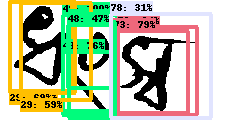

0.99664044 [0.13188598 0.27339843 0.9183143  0.51603633] 1
0.99596727 [0.02031275 0.04285029 0.7577953  0.31621024] TUKI3
1
0.9423235 [0.22826633 0.5132584  0.95169955 0.8678825 ] TUKI3
1
0.7855917 [0.26046464 0.49790215 0.9379612  0.8285128 ] TUKI3
TUKI3
0
0.7637396 [0.43973264 0.2757751  0.95472294 0.5053126 ] TUKI3
0
0.68780273 [0.01086447 0.04199962 0.767408   0.33216023] TUKI3
TUKI3
0
0.6303353 [0.19052938 0.29995346 0.9798173  0.5068332 ] TUKI3
0
0.5873208 [0.02546175 0.09105731 0.8268052  0.40202832] TUKI3
TUKI3
0
0.47109702 [0.21387255 0.2947787  0.7316058  0.50226873] TUKI3
0
0.308894 [0.12096529 0.48263112 0.98239475 0.9287026 ] TUKI3
TUKI3
0
['ধ', 'ং', 'স্ব']
['ধ', 'ং', 'স্ব']
ধংস্বA-----------------------------------------------------------
[[15.826317071914673, 62.33484184741974, 110.19771337509155, 117.65628361701965, 48], [2.4375303089618683, 9.769865155220032, 90.93543291091919, 72.0959347486496, 29], [27.39195942878723, 117.02291464805603, 114.20394659042358, 197.87720

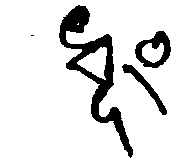

/content/gdrive/MyDrive/customTF2/data/Test/22180.bmp
Loading model...Done! Took 52.956111669540405 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22180.bmp... 9
4
hoye ja
[48. 48. 29. 29. 48. 71. 87. 87. 49.]
hoye ja
[87. 48. 29. 87.]
Done
13


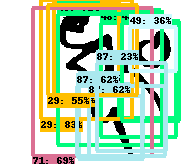

0.9942761 [0.13010447 0.6573639  0.7143706  0.99044245] 1
0.98568785 [0.14558648 0.553123   0.83456516 0.9732662 ] TUKI3
0
0.9235937 [0.0164805  0.29652378 0.57755154 0.66217536] TUKI3
1
0.9088439 [0.516868   0.43188953 0.966408   0.7904334 ] TUKI3
TUKI3
1
0.82672775 [0.00413158 0.22650944 0.7254173  0.73305047] TUKI3
TUKI3
0
0.8251843 [0.14336264 0.6731431  0.7373013  0.9901001 ] TUKI3
0
0.7186281 [0.08583816 0.31526834 0.881945   0.8981003 ] TUKI3
0
0.6909141 [0.05173214 0.17744012 0.9451251  0.8430529 ] TUKI3
0
0.6220834 [0.5250582  0.42190313 0.9480361  0.915359  ] TUKI3
TUKI3
TUKI3
0
0.615168 [0.59058493 0.49079156 0.95587194 0.7889453 ] TUKI3
TUKI3
0
0.54847145 [0.03451541 0.2599835  0.57908773 0.761662  ] TUKI3
TUKI3
0
0.36213318 [0.16840513 0.7178444  0.4293213  0.97597456] TUKI3
0
0.22766586 [0.38875204 0.53407323 0.9150401  0.9180778 ] TUKI3
TUKI3
TUKI3
0
['ধ', 'ূ', 'ং']
['ধ', 'ূ', 'ং']
ধূংA-----------------------------------------------------------
[[21.33713263273239, 118.9

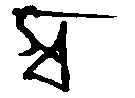

/content/gdrive/MyDrive/customTF2/data/Test/22181.bmp
Loading model...Done! Took 48.97450137138367 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22181.bmp... 2
2
hoye ja
[73. 58.]
hoye ja
[73. 40.]
Done
4


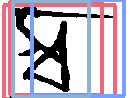

0.8239747 [0.05366211 0.02295982 1.         0.8550571 ] 1
0.79361624 [0.01391542 0.07350543 0.9670145  0.76260304] TUKI3
0
0.57161176 [0.00396004 0.23066324 0.9694309  0.925351  ] TUKI3
0
0.35432112 [0.01274723 0.09590441 0.98249316 0.66218996] TUKI3
0
['স্ব']
['স্ব']
স্বA-----------------------------------------------------------
[[5.258886426687241, 3.0995763279497623, 98.0, 115.43271124362946, 73]]
[[10, 4, 86, 95, 73]]
actual class 73
TP CHANGE index =  73  TP DIFFERENCE =  [-1]
confusion_matrix_row =  স্ব  COLUMN =  স্ব  DIFFERENCE =  1
TP =  [0, 49, 43, 42, 55, 36, 30, 49, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 25, 38, 45, 59, 34, 50, 54, 78, 44, 34, 47, 24, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 48, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 44, 38, 27, 13, 46, 46, 46, 32, 29, 59, 35, 30, 0, 33, 50, 50, 50, 21, 0, 29, 34, 17, 0, 17, 36]
FP =  [0, 1, 7, 0, 7, 2, 1, 28, 1, 16, 2, 1, 17, 7, 0, 10, 5, 6, 11, 0, 1, 30,

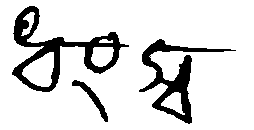

/content/gdrive/MyDrive/customTF2/data/Test/22182.bmp
Loading model...Done! Took 48.480324268341064 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22182.bmp... 7
3
hoye ja
[29. 48. 73. 16. 48. 78. 33.]
hoye ja
[73. 29. 48.]
Done
10


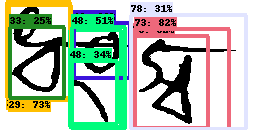

0.9670488 [0.01544758 0.0258058  0.75218546 0.27732554] 1
0.9330321 [0.23614061 0.27397308 0.96981496 0.48008922] TUKI3
1
0.81897837 [0.27980492 0.5229746  0.9817996  0.82138205] 1
0.8174773 [0.23009166 0.52906156 0.9913976  0.9032523 ] TUKI3
0
0.7281629 [0.04338324 0.03338824 0.7632424  0.2814393 ] TUKI3
0
0.68904096 [0.18255694 0.28771496 0.5939972  0.5141205 ] TUKI3
0
0.5116918 [0.21364173 0.28320715 0.9905219  0.4952236 ] TUKI3
0
0.34431633 [0.47477537 0.2717919  0.95359385 0.46272594] TUKI3
TUKI3
0
0.30924028 [0.11757205 0.5143563  0.9905926  0.9704707 ] TUKI3
0
0.2466424 [0.21316409 0.0365012  0.7520088  0.25547108] TUKI3
0
['ধ', 'ং', 'স্ব']
['ধ', 'ং', 'স্ব']
ধংস্বA-----------------------------------------------------------
[[2.0081850700080395, 6.554672073572874, 97.78411030769348, 70.44068735837936, 29], [30.69827914237976, 69.58916169404984, 126.07594430446625, 121.94266122579575, 48], [36.374638974666595, 132.83555102348328, 127.63394832611084, 208.6310396194458, 73]]
[[3, 3,

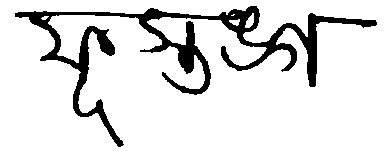

/content/gdrive/MyDrive/customTF2/data/Test/22183.bmp
Loading model...Done! Took 47.57003355026245 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22183.bmp... 10
6
hoye ja
[87. 75. 32. 71. 71. 13. 15. 60. 60. 71.]
hoye ja
[87. 32. 71. 75. 18. 48.]
Done
16


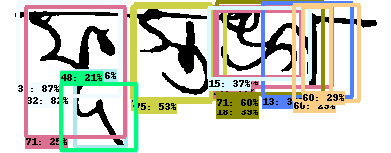

0.9587764 [0.5390388  0.19170141 0.9589162  0.32306632] 1
0.92086405 [0.5456856  0.15734655 0.9851187  0.350582  ] TUKI3
0
0.8973232 [0.05168312 0.33536297 0.6461308  0.576844  ] 1
0.86973345 [0.02371249 0.04472534 0.5468832  0.30971944] TUKI3
1
0.82297266 [0.         0.06746466 0.6247098  0.30854067] TUKI3
TUKI3
0
0.7194776 [0.04731739 0.5443876  0.56432056 0.85042256] TUKI3
1
0.6006504 [0.01663819 0.5540271  0.6133747  0.82745993] TUKI3
TUKI3
0
0.53317064 [0.02698529 0.34285513 0.6610666  0.54027617] TUKI3
0
0.43190813 [0.0735276  0.5529701  0.49693537 0.771768  ] TUKI3
TUKI3
0
0.39155293 [0.01663819 0.5540271  0.6133747  0.82745993] TUKI3
TUKI3
0
0.37515274 [0.02332127 0.6717641  0.6286133  0.9007377 ] TUKI3
0
0.37357384 [0.05307965 0.5344868  0.51560116 0.7940999 ] TUKI3
TUKI3
0
0.29431129 [0.03503091 0.75154024 0.6560365  0.91960025] TUKI3
1
0.2861317 [0.04633971 0.77493227 0.606229   0.84701496] TUKI3
0
0.24786144 [0.04778705 0.06422889 0.8910473  0.3197098 ] TUKI3
0
0.21276426 [

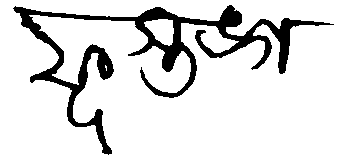

/content/gdrive/MyDrive/customTF2/data/Test/22184.bmp
Loading model...Done! Took 45.050960063934326 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22184.bmp... 12
9
hoye ja
[87. 32. 75. 71. 13. 75. 60. 71. 18. 76. 71. 60.]
hoye ja
[87. 32. 75. 18. 34. 60. 69. 74. 71.]
Done
21


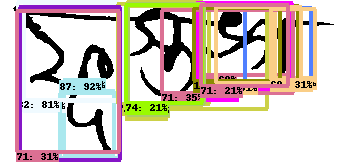

0.98208904 [0.56226224 0.1817514  0.948244   0.32567436] 1
0.9341825 [0.04110509 0.06646312 0.6178891  0.3559077 ] TUKI3
1
0.91884536 [0.57412267 0.16874123 0.97007394 0.3402099 ] TUKI3
0
0.8089047 [0.01804569 0.05073252 0.6164558  0.33679304] TUKI3
TUKI3
0
0.7889743 [0.02605869 0.3361024  0.6394202  0.5964583 ] TUKI3
1
0.6909831 [0.03140542 0.5534029  0.46084887 0.8255565 ] TUKI3
1
0.6706031 [0.01072243 0.3630243  0.6515037  0.57665306] TUKI3
0
0.62841946 [0.05396294 0.6960036  0.50088924 0.8862996 ] TUKI3
0
0.5762484 [0.04206131 0.35803676 0.6721982  0.76299876] TUKI3
0
0.4799411 [0.06297094 0.78247774 0.48042625 0.86004835] TUKI3
0
0.44847536 [0.0388092  0.5628545  0.51497865 0.8512163 ] TUKI3
TUKI3
0
0.3479613 [0.02154177 0.55982536 0.5497754  0.83418316] TUKI3
TUKI3
0
0.34688696 [0.06756956 0.4596288  0.57082677 0.8355335 ] TUKI3
TUKI3
0
0.34138462 [0.05227254 0.55153036 0.49751005 0.798432  ] TUKI3
TUKI3
0
0.33682442 [0.04751974 0.05428844 0.9868775  0.34386298] TUKI3
0
0.3138420

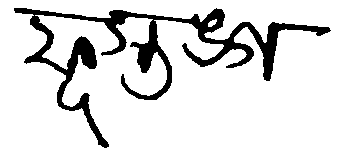

/content/gdrive/MyDrive/customTF2/data/Test/22186.bmp
Loading model...Done! Took 46.61012101173401 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22186.bmp... 10
13
hoye ja
[87. 75. 32. 71. 13. 15. 13. 13. 71. 71.]
hoye ja
[87. 32. 71. 18. 69. 12. 48. 45. 39. 75. 64. 68. 64.]
Done
23


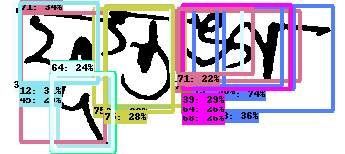

0.97731245 [0.5135467  0.1679098  0.9472796  0.32072672] 1
0.9218843 [0.06142196 0.26998612 0.6828367  0.53776485] TUKI3
1
0.89650315 [0.02158485 0.04050913 0.5180147  0.28293294] TUKI3
TUKI3
1
0.855534 [0.07618377 0.5052002  0.5235757  0.87011683] TUKI3
1
0.8390775 [0.4766637  0.1473234  0.9850646  0.33250096] TUKI3
0
0.7658236 [0.0116297  0.05743892 0.5436011  0.2862871 ] TUKI3
TUKI3
TUKI3
0
0.74306476 [0.05153901 0.6465568  0.5754468  0.8550383 ] TUKI3
0
0.70127696 [0.0482543  0.49403527 0.4736809  0.70227873] TUKI3
TUKI3
0
0.55496055 [0.04129064 0.52525026 0.5767882  0.8407988 ] TUKI3
TUKI3
0
0.52550447 [0.04129064 0.52525026 0.5767882  0.8407988 ] TUKI3
TUKI3
0
0.37707302 [0.03730005 0.5609127  0.55380315 0.81775445] TUKI3
0
0.3595699 [0.04024336 0.30699432 0.6896012  0.5023403 ] TUKI3
TUKI3
0
0.35864156 [0.04328229 0.62820613 0.71661556 0.9654449 ] TUKI3
0
0.33625787 [0.08929502 0.05860356 0.91896576 0.30578214] TUKI3
0
0.30565482 [0.02055952 0.05719603 0.5342263  0.28512052] TUK

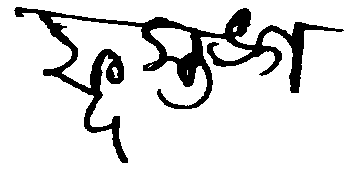

/content/gdrive/MyDrive/customTF2/data/Test/22187.bmp
Loading model...Done! Took 48.6247341632843 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22187.bmp... 9
7
hoye ja
[87. 32. 75. 71. 71. 75. 71. 13. 13.]
hoye ja
[87. 32. 75. 60. 18. 75. 71.]
Done
16


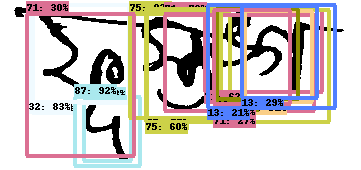

0.98382425 [0.5904701 0.2314692 0.9444856 0.3650766] 1
0.9664092 [0.03400509 0.08895914 0.6025511  0.35769433] TUKI3
1
0.9175627 [0.57589716 0.20533212 0.97107476 0.38801497] TUKI3
0
0.8341978 [0.03351316 0.08026583 0.59431696 0.3577394 ] TUKI3
TUKI3
0
0.82298267 [0.08260693 0.3589756  0.6885456  0.63810307] TUKI3
1
0.75965375 [0.09077607 0.45697805 0.6526982  0.8706691 ] TUKI3
0
0.74624956 [0.05672187 0.40650296 0.68999374 0.61343324] TUKI3
0
0.61796886 [0.06300121 0.5675531  0.53627974 0.89452904] TUKI3
1
0.5952132 [0.06197039 0.40388396 0.71234125 0.9114321 ] TUKI3
0
0.5112841 [0.06993768 0.6763338  0.59960985 0.86700475] TUKI3
0
0.45563003 [0.05594793 0.59974915 0.5818832  0.826011  ] TUKI3
TUKI3
0
0.40366787 [0.05906731 0.591609   0.6069005  0.8057426 ] TUKI3
TUKI3
0
0.30384532 [0.08319408 0.07310218 0.917041   0.37301946] TUKI3
0
0.29039022 [0.03662452 0.6701956  0.5728863  0.87981457] TUKI3
0
0.26858634 [0.05906731 0.591609   0.6069005  0.8057426 ] TUKI3
TUKI3
0
0.20912193 [0.03

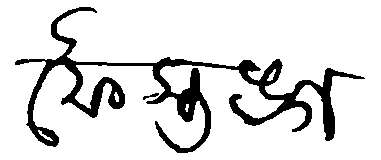

/content/gdrive/MyDrive/customTF2/data/Test/22188.bmp
Loading model...Done! Took 46.97489619255066 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22188.bmp... 13
10
hoye ja
[32. 75. 89. 66. 71. 63. 91. 32. 60. 15. 12. 71. 60.]
hoye ja
[71. 75. 32. 69. 68. 72. 91. 82. 71. 72.]
Done
23


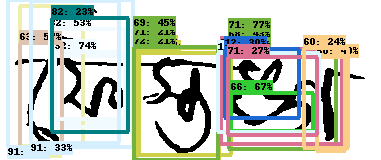

0.97023004 [0.35028365 0.14389911 0.7632813  0.34730926] 1
0.81423557 [0.3356776 0.3628708 0.9684482 0.6082965] 1
0.76854455 [0.3107691 0.600573  0.9300988 0.883483 ] TUKI3
1
0.75506943 [0.04287014 0.05010506 0.9096256  0.21975839] 1
0.7451736 [0.30191326 0.35439777 1.         0.57674336] TUKI3
0
0.7441756 [0.32701695 0.14287713 0.79016805 0.34310377] TUKI3
0
0.67247486 [0.58397084 0.60592324 0.81405413 0.8216028 ] TUKI3
TUKI3
0
0.6478478 [0.30801773 0.5798843  0.8943404  0.8992105 ] TUKI3
TUKI3
0
0.5678135 [0.27037776 0.05195436 0.9261415  0.1638295 ] TUKI3
0
0.53637636 [0.         0.01955783 0.9179515  0.35043457] TUKI3
0
0.5291119 [0.1849478  0.12957545 0.7381786  0.32932425] TUKI3
0
0.44873294 [0.29531005 0.3510387  0.99600303 0.5747478 ] TUKI3
0
0.428106 [0.3107691 0.600573  0.9300988 0.883483 ] TUKI3
TUKI3
0
0.40279853 [0.36074826 0.82948864 0.9411501  0.9074382 ] TUKI3
0
0.3770768 [0.3374508  0.57045436 0.8206927  0.83909607] TUKI3
TUKI3
0
0.34938022 [0.3107691 0.600573  0.93009

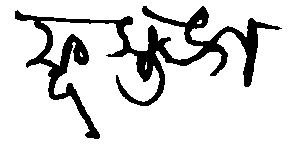

/content/gdrive/MyDrive/customTF2/data/Test/22189.bmp
Loading model...Done! Took 48.65490770339966 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22189.bmp... 8
11
hoye ja
[32. 87. 75. 32. 71. 60. 72. 87.]
hoye ja
[32. 13. 87. 75. 18. 49. 71. 69. 66. 12. 41.]
Done
19


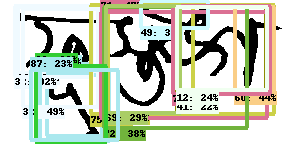

0.97980505 [0.04884702 0.0569655  0.49409553 0.331439  ] 1
0.9476373 [0.51796    0.15524194 0.9298307  0.34132296] 1
0.91692704 [0.04509772 0.04880197 0.52123654 0.3078035 ] TUKI3
0
0.7842634 [0.04584834 0.5884799  0.61217356 0.89257514] 1
0.74158776 [0.4723943  0.13079089 0.9633363  0.36505413] TUKI3
TUKI3
0
0.73974156 [0.04066507 0.30298492 0.7807442  0.9164267 ] TUKI3
TUKI3
TUKI3
0
0.5846838 [0.04437286 0.35923922 0.76737016 0.6468301 ] TUKI3
1
0.48923537 [0.06826651 0.07628547 0.72915334 0.3283859 ] TUKI3
0
0.47484002 [0.0854874  0.3347766  0.80304235 0.8932168 ] TUKI3
TUKI3
0
0.4542871 [0.04584834 0.5884799  0.61217356 0.89257514] TUKI3
0
0.44439256 [0.05281829 0.78586847 0.6302981  0.91952854] TUKI3
0
0.38301194 [0.04963874 0.34503752 0.8760631  0.8279759 ] TUKI3
0
0.36910298 [0.01134332 0.46949583 0.18712065 0.6979278 ] TUKI3
TUKI3
0
0.34444547 [0.04657128 0.57575214 0.63988996 0.9041264 ] TUKI3
0
0.2893862 [0.0465349  0.35344094 0.77004606 0.6021202 ] TUKI3
TUKI3
0
0.28501198 [

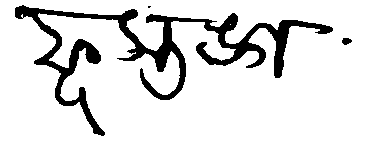

/content/gdrive/MyDrive/customTF2/data/Test/22190.bmp
Loading model...Done! Took 51.31831932067871 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22190.bmp... 8
8
hoye ja
[87. 32. 75. 71. 60. 60. 60. 15.]
hoye ja
[32. 87. 75. 18. 64. 39. 43. 60.]
Done
16


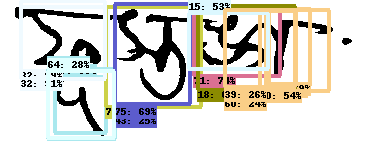

0.9924616 [0.539997   0.14792944 0.92774224 0.2896814 ] 1
0.986963 [0.0500306  0.05652485 0.49205655 0.294686  ] 1
0.9323994 [0.05073915 0.28708264 0.7426895  0.5503229 ] TUKI3
TUKI3
1
0.90617 [0.0073469  0.05492065 0.54616475 0.28784904] TUKI3
TUKI3
0
0.8661094 [0.48630953 0.12875465 0.97043526 0.3148481 ] TUKI3
0
0.74460286 [0.07960055 0.52804685 0.5291647  0.7635801 ] TUKI3
1
0.692465 [0.06935231 0.72460735 0.5945657  0.84725296] TUKI3
1
0.6922578 [0.03082207 0.3129419  0.7217419  0.5180863 ] TUKI3
0
0.6915223 [0.07939783 0.7316864  0.58267254 0.80676734] TUKI3
TUKI3
0
0.60617524 [0.04512557 0.5388253  0.62614775 0.80503964] TUKI3
TUKI3
0
0.54189205 [0.07096343 0.7072103  0.6320187  0.89780426] TUKI3
TUKI3
0
0.52688783 [0.09424963 0.5136078  0.48150218 0.73127997] TUKI3
TUKI3
0
0.28169236 [0.50266993 0.12960474 0.96481335 0.31306285] TUKI3
0
0.25647756 [0.07355139 0.61192864 0.60689247 0.80632466] TUKI3
0
0.24500675 [0.03082207 0.3129419  0.7217419  0.5180863 ] TUKI3
0
0.24126269 [0

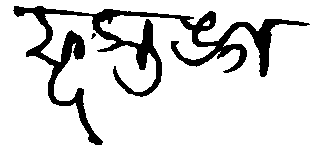

/content/gdrive/MyDrive/customTF2/data/Test/22191.bmp
Loading model...Done! Took 48.285335302352905 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22191.bmp... 12
9
hoye ja
[87. 71. 75. 71. 60. 32. 15. 28. 71. 13. 60. 18.]
hoye ja
[32. 87. 75. 71. 18. 48. 74. 45. 28.]
Done
21


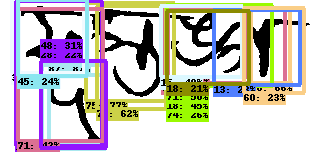

0.9105278 [0.         0.05502863 0.5051997  0.27001625] 1
0.87099296 [0.49762523 0.14757897 0.9453929  0.32193464] TUKI3
1
0.79424804 [0.42923567 0.1254771  0.9738449  0.32265028] TUKI3
TUKI3
0
0.7805845 [0.07103759 0.49352965 0.54322785 0.87147325] 1
0.770848 [0.02490249 0.2595589  0.65851843 0.5321452 ] TUKI3
TUKI3
TUKI3
1
0.692862 [0.05598287 0.510898   0.5020507  0.7582045 ] TUKI3
0
0.6620627 [0.06456073 0.7645419  0.53986293 0.8865053 ] TUKI3
0
0.6214641 [0.04011893 0.2929249  0.7148412  0.50619876] TUKI3
TUKI3
TUKI3
0
0.6085053 [0.         0.03481188 0.4759583  0.25849792] TUKI3
0
0.49832165 [0.03555331 0.5087415  0.55966794 0.829589  ] TUKI3
0
0.48876876 [0.0455328  0.49072173 0.5065189  0.7384183 ] TUKI3
0
0.45284835 [0.00999036 0.04838355 0.96007    0.3136412 ] TUKI3
0
0.4522778 [0.03555331 0.5087415  0.55966794 0.829589  ] TUKI3
0
0.41655472 [0.06302591 0.05315208 0.9250621  0.31557712] TUKI3
0
0.30651698 [0.40420794 0.12484962 0.96790564 0.32618076] TUKI3
TUKI3
0
0.27667308 

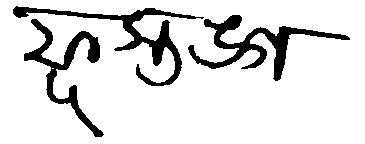

/content/gdrive/MyDrive/customTF2/data/Test/22192.bmp
Loading model...Done! Took 46.82477402687073 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22192.bmp... 10
6
hoye ja
[32. 87. 75. 13. 13. 71. 15. 18. 34. 60.]
hoye ja
[32. 87. 18. 75. 43. 28.]
Done
16


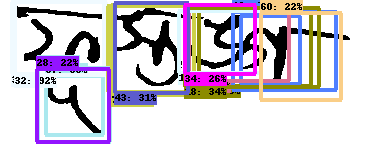

0.9861936 [0.01860177 0.03157195 0.51324624 0.29242063] 1
0.97634083 [0.5291947  0.1238521  0.93264425 0.28478464] 1
0.92002517 [0.0114063  0.04064713 0.52075636 0.28726622] TUKI3
0
0.8865875 [0.04546426 0.29359427 0.6347249  0.53201646] 1
0.8225871 [0.4738176  0.10209417 0.9860444  0.30162394] TUKI3
TUKI3
0
0.8009932 [0.05837741 0.54355735 0.5960543  0.8533544 ] 1
0.6523013 [0.08671343 0.6377879  0.622407   0.9231788 ] TUKI3
0
0.5626856 [0.1179528  0.65829825 0.57794565 0.8231165 ] TUKI3
0
0.47406614 [0.07703816 0.51761425 0.56032526 0.7941287 ] TUKI3
TUKI3
0
0.37946403 [0.04042521 0.30513594 0.6583836  0.51193464] TUKI3
0
0.33920768 [0.07816569 0.48918194 0.50074756 0.71513456] TUKI3
TUKI3
0
0.33592996 [0.06093122 0.5042177  0.60211194 0.8766948 ] TUKI3
TUKI3
0
0.31384668 [0.02279681 0.31253415 0.6410925  0.5156758 ] TUKI3
0
0.26112044 [0.04067819 0.50419086 0.5091263  0.69944596] TUKI3
TUKI3
0
0.22075373 [0.09316292 0.71254885 0.68752944 0.93448627] TUKI3
0
0.21596228 [0.48577255 0.

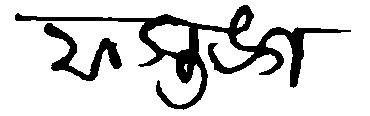

/content/gdrive/MyDrive/customTF2/data/Test/22193.bmp
Loading model...Done! Took 49.14762830734253 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22193.bmp... 10
8
hoye ja
[32. 75. 71. 36. 60. 15. 71. 60. 60. 13.]
hoye ja
[32. 75. 18. 71. 62. 18. 15. 72.]
Done
18


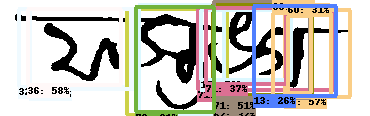

0.9330046 [0.07949676 0.04892816 0.7425338  0.35594642] 1
0.9222431 [0.08075345 0.34106445 0.9896813  0.61366874] TUKI3
1
0.69431543 [0.07853749 0.0785771  0.7625096  0.3618038 ] TUKI3
0
0.63902247 [0.04576668 0.3742665  0.985067   0.6056955 ] TUKI3
0
0.6099238 [0.06754711 0.53339994 0.76760656 0.90153706] TUKI3
1
0.5874437 [0.04215056 0.5748272  0.8140135  0.8433486 ] TUKI3
TUKI3
0
0.5799276 [0.08524899 0.0731904  0.73234636 0.3293507 ] TUKI3
0
0.5748061 [0.09240314 0.768874   0.8298882  0.9463648 ] TUKI3
0
0.55906963 [0.08878815 0.5421785  0.6813725  0.7883087 ] TUKI3
TUKI3
0
0.5114507 [0.01294777 0.57621294 0.84244657 0.83877975] TUKI3
TUKI3
0
0.36760923 [0.06984904 0.55587083 0.7203801  0.7734703 ] TUKI3
TUKI3
0
0.3511119 [0.11256167 0.7365483  0.83495253 0.897058  ] TUKI3
0
0.31570682 [0.01294777 0.57621294 0.84244657 0.83877975] 1
0.31265962 [0.14073819 0.77570784 0.79807305 0.84260035] TUKI3
0
0.26485828 [0.04576668 0.3742665  0.985067   0.6056955 ] TUKI3
0
0.2638117 [0.05334757

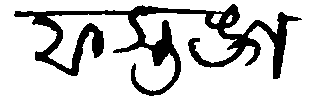

/content/gdrive/MyDrive/customTF2/data/Test/22194.bmp
Loading model...Done! Took 48.13233399391174 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22194.bmp... 6
5
hoye ja
[32. 75. 71. 15. 60. 36.]
hoye ja
[18. 32. 71. 75. 69.]
Done
11


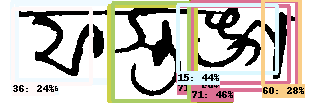

0.9673793 [0.0203234  0.03671085 0.7723803  0.35860637] 1
0.93432075 [0.00703198 0.60049903 0.8731899  0.93877137] 1
0.8921387 [0.03903353 0.05345754 0.80298364 0.358284  ] TUKI3
0
0.8270824 [0.0637989  0.34316665 0.98595375 0.6187046 ] TUKI3
TUKI3
1
0.69255906 [0.05938171 0.5595642  0.7963928  0.9131548 ] TUKI3
0
0.4601401 [0.01104468 0.6035979  0.8694564  0.9387734 ] TUKI3
0
0.45762926 [0.03456599 0.3536628  0.9714562  0.5974801 ] TUKI3
TUKI3
0
0.44152334 [0.05143999 0.5602044  0.70401305 0.8748388 ] TUKI3
0
0.40518668 [0.03456599 0.3536628  0.9714562  0.5974801 ] TUKI3
TUKI3
0
0.27860075 [0.00227754 0.8282165  0.83041465 0.9471516 ] TUKI3
0
0.23958011 [0.088783   0.04080291 0.814207   0.28717244] TUKI3
0
['ফ', 'স্ত', 'জ']
['ফ', 'স্ত', 'জ']
ফস্তজA-----------------------------------------------------------
[[2.0933105275034904, 11.637339733541012, 79.55517011880875, 113.67821875214577, 32], [0.7242936491966248, 190.35819375514984, 89.93856239318848, 297.59052336215973, 18], [6.5712863

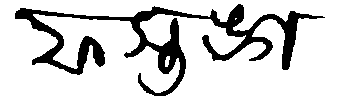

/content/gdrive/MyDrive/customTF2/data/Test/22195.bmp
Loading model...Done! Took 50.036762952804565 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22195.bmp... 10
6
hoye ja
[32. 75. 60. 12. 71. 66. 12. 13. 36. 15.]
hoye ja
[32. 71. 75. 18. 78. 72.]
Done
16


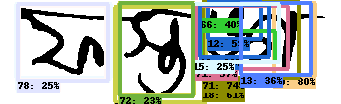

0.9669862 [0.04597675 0.04644972 0.7414069  0.3261326 ] 1
0.9211238 [0.07598554 0.3363008  0.976721   0.60431415] 1
0.804352 [0.03614762 0.8019854  0.7340101  0.9254031 ] 1
0.7821909 [0.05699536 0.04824172 0.77119744 0.3211304 ] TUKI3
0
0.73643637 [0.0239647  0.5928642  0.7429681  0.87694615] TUKI3
TUKI3
0
0.6414046 [0.03718254 0.3484661  0.90939844 0.5707446 ] TUKI3
0
0.60550654 [0.0239647  0.5928642  0.7429681  0.87694615] TUKI3
TUKI3
0
0.591266 [0.02432043 0.6080762  0.37316054 0.7666269 ] 1
0.56777704 [0.06006131 0.5742092  0.6599532  0.8466221 ] TUKI3
TUKI3
TUKI3
0
0.3955931 [0.3056548  0.58766836 0.59593534 0.8068868 ] TUKI3
TUKI3
TUKI3
1
0.38045543 [0.05191823 0.5857287  0.5480434  0.79057056] TUKI3
TUKI3
0
0.36202884 [0.03575588 0.7059309  0.721002   0.9135751 ] TUKI3
0
0.25483236 [0.06054376 0.05331043 0.76125085 0.31244877] TUKI3
0
0.250549 [0.0478064 0.5631336 0.5947273 0.8185864] TUKI3
TUKI3
TUKI3
0
0.24814385 [0.04479599 0.05045307 0.7700357  0.31829646] TUKI3
0
0.23168848

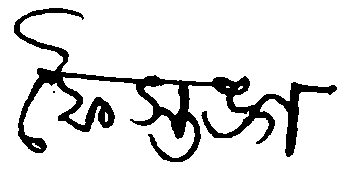

/content/gdrive/MyDrive/customTF2/data/Test/22196.bmp
Loading model...Done! Took 49.664626359939575 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22196.bmp... 9
6
hoye ja
[32. 89. 75. 71. 91. 71. 63. 67. 71.]
hoye ja
[18. 32. 75. 89.  2. 91.]
Done
15


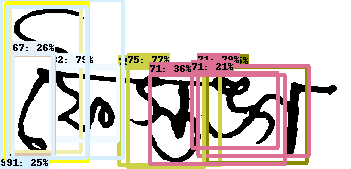

0.94747937 [0.40891585 0.14343305 0.8118935  0.33978966] 1
0.87139165 [0.02987937 0.02602373 0.8943177  0.23246801] 1
0.85410136 [0.40483063 0.33875692 0.975635   0.6270547 ] TUKI3
1
0.8464014 [0.3969871  0.5875262  0.96348596 0.87674856] TUKI3
1
0.7918022 [0.3948649  0.5630025  0.91788584 0.88209504] TUKI3
TUKI3
0
0.78892106 [0.39467144 0.14548236 0.8329632  0.33843896] TUKI3
0
0.7660787 [0.39060035 0.36332726 0.9885956  0.58285874] TUKI3
0
0.47786716 [0.00516104 0.         0.9316995  0.35212037] TUKI3
0
0.45412025 [0.02096349 0.01645751 0.950883   0.25198132] TUKI3
0
0.36359692 [0.4494583  0.42626038 0.9677605  0.8144106 ] TUKI3
0
0.2824063 [0.32762206 0.03497673 0.9170001  0.15633383] TUKI3
0
0.25962815 [0.02096349 0.01645751 0.950883   0.25198132] TUKI3
0
0.2571048 [0.3239791  0.03622224 0.9292317  0.15127106] TUKI3
TUKI3
0
0.24820973 [0.04523051 0.01740561 0.93014246 0.25070512] TUKI3
0
0.20758054 [0.4349662 0.5466333 0.8738437 0.7940757] TUKI3
TUKI3
0
['ৈ', 'ফ', 'স্ত', 'জ']
['ফ',

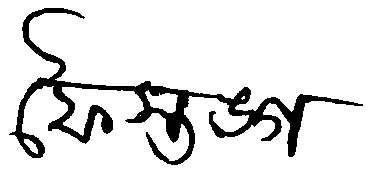

/content/gdrive/MyDrive/customTF2/data/Test/22197.bmp
Loading model...Done! Took 49.44284105300903 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22197.bmp... 8
14
hoye ja
[32. 75. 89. 91. 71. 15. 71. 13.]
hoye ja
[32. 75. 69. 91. 85. 77. 18. 32. 89. 39. 43. 75. 77.  2.]
Done
22


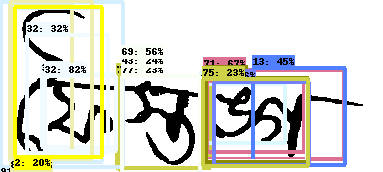

0.9603163 [0.4360178  0.10719907 0.85189366 0.31344584] 1
0.9319817 [0.44734225 0.3035945  0.97152233 0.5508662 ] TUKI3
1
0.91932875 [0.01820396 0.02550061 0.930555   0.18952978] 1
0.8225032 [0.44289953 0.11500499 0.87741977 0.30309257] TUKI3
0
0.81218195 [0.44397357 0.3130322  0.9914378  0.52465135] TUKI3
TUKI3
0
0.74236256 [0.01705841 0.00110848 0.96997595 0.3220321 ] TUKI3
0
0.6702983 [0.41211542 0.5304965  0.9205789  0.89823896] TUKI3
1
0.6201154 [0.49069676 0.5214916  0.8311943  0.7463997 ] TUKI3
TUKI3
0
0.59612393 [0.47219506 0.53895277 0.8786768  0.796279  ] TUKI3
TUKI3
0
0.55535656 [0.44638854 0.31681618 0.9984184  0.5244827 ] TUKI3
0
0.4460191 [0.3969885  0.65940726 0.95430607 0.90275335] TUKI3
0
0.433528 [0.04783428 0.02819419 0.9383093  0.267178  ] TUKI3
0
0.37615025 [0.4602126  0.5369044  0.93915045 0.805237  ] TUKI3
TUKI3
0
0.37424836 [0.45355445 0.53725713 0.932169   0.80273396] TUKI3
TUKI3
0
0.3353363 [0.45351586 0.53692836 0.9390986  0.8050738 ] TUKI3
TUKI3
0
0.3219992 

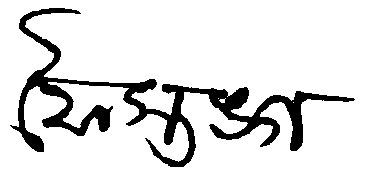

/content/gdrive/MyDrive/customTF2/data/Test/22198.bmp
Loading model...Done! Took 49.61909747123718 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22198.bmp... 8
13
hoye ja
[75. 32. 89. 71. 91. 60. 60. 41.]
hoye ja
[75. 32. 18. 91. 32. 78.  2. 82. 72. 74. 34. 89. 62.]
Done
21


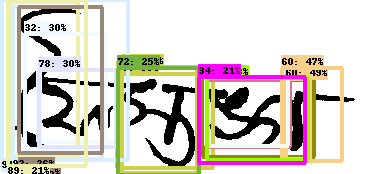

0.9345014 [0.4282905  0.3155286  0.96529275 0.5781619 ] 1
0.8333019 [0.402545   0.10107779 0.810587   0.32760575] TUKI3
1
0.79471654 [0.38937727 0.32902765 0.99270046 0.5346071 ] TUKI3
0
0.7083281 [0.39730376 0.10752    0.84350294 0.31756032] TUKI3
TUKI3
0
0.70372874 [0.01241891 0.02760294 0.89423454 0.21183549] 1
0.62880415 [0.46349782 0.5491416  0.90199655 0.85359186] TUKI3
1
0.59025127 [0.46306366 0.5583012  0.8440552  0.7874647 ] TUKI3
TUKI3
0
0.5794402 [0.         0.00355355 0.91539425 0.34873316] TUKI3
0
0.48696497 [0.4560022  0.77343976 0.91376626 0.840205  ] TUKI3
0
0.46815974 [0.39565524 0.7641751  0.9243544  0.9273828 ] TUKI3
1
0.4444077 [0.04397523 0.03450018 0.9112216  0.27656075] TUKI3
0
0.42076278 [0.452617   0.55769074 0.8380737  0.7823684 ] TUKI3
TUKI3
0
0.30303353 [0.20021257 0.06575687 0.8506154  0.2885155 ] TUKI3
0
0.3016634 [0.4058407  0.10382666 0.84147555 0.31645876] TUKI3
TUKI3
0
0.25719932 [0.04493925 0.04902522 0.8763268  0.2776882 ] TUKI3
0
0.2506608 [0.044939

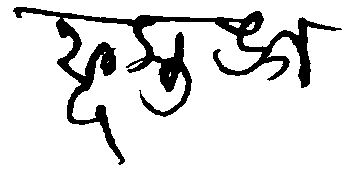

/content/gdrive/MyDrive/customTF2/data/Test/22199.bmp
Loading model...Done! Took 47.38584804534912 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22199.bmp... 9
11
hoye ja
[87. 75. 32. 71. 60. 15. 60. 71. 32.]
hoye ja
[32. 87. 75. 71. 68. 45. 48. 42. 12. 64. 18.]
Done
20


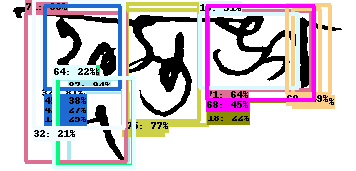

0.94075996 [0.53962535 0.19282494 0.94205153 0.3597142 ] 1
0.92998296 [0.02351803 0.12214099 0.52595985 0.3377201 ] 1
0.879256 [0.46654832 0.16231331 0.96234    0.37566927] TUKI3
0
0.8425909 [0.05877664 0.34488988 0.7288682  0.58594316] TUKI3
1
0.80939883 [0.0313339  0.11600318 0.5133975  0.3504121 ] TUKI3
0
0.76695347 [0.02550402 0.35433233 0.706234   0.5601575 ] TUKI3
TUKI3
0
0.6424761 [0.06892657 0.5794106  0.5209625  0.87419635] TUKI3
1
0.6400009 [0.03980678 0.5823176  0.5868189  0.8802711 ] TUKI3
TUKI3
0
0.5177133 [0.05680928 0.8228389  0.5638156  0.8989164 ] TUKI3
0
0.5129477 [0.08571961 0.5605223  0.5092398  0.8378884 ] TUKI3
TUKI3
0
0.49247614 [0.03107612 0.8060767  0.54885733 0.92969227] TUKI3
1
0.45311028 [0.03803447 0.58061826 0.582857   0.8836341 ] TUKI3
TUKI3
0
0.390755 [0.07837319 0.07142168 0.9462261  0.35473233] TUKI3
0
0.37893388 [0.04059447 0.12402976 0.5197761  0.33779407] TUKI3
0
0.31520447 [0.45901632 0.16130275 0.9687896  0.37577152] TUKI3
0
0.27339998 [0.04059447

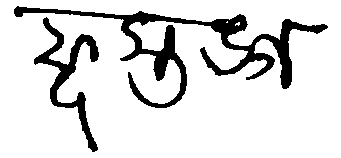

/content/gdrive/MyDrive/customTF2/data/Test/22200.bmp
Loading model...Done! Took 50.68618440628052 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22200.bmp... 11
8
hoye ja
[32. 87. 75. 71. 13. 71. 60. 15. 18. 76. 60.]
hoye ja
[32. 75. 87. 18. 71. 68. 48. 28.]
Done
19


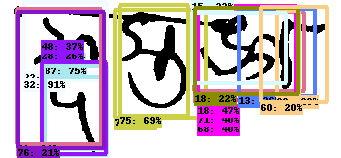

0.9400685 [0.02288384 0.06969199 0.45748532 0.31566384] 1
0.9122723 [0.00970873 0.0695665  0.5000838  0.30854255] TUKI3
0
0.74912816 [0.4935147  0.1309149  0.93943596 0.30396026] 1
0.74592376 [0.06838568 0.3363892  0.7445397  0.6067196 ] 1
0.6898013 [0.0363901  0.35084766 0.7326703  0.55311376] TUKI3
0
0.6880515 [0.42182198 0.12637016 0.9756428  0.31484616] TUKI3
TUKI3
0
0.5427251 [0.07649118 0.5677195  0.57476133 0.8923608 ] TUKI3
1
0.471225 [0.04337057 0.5782509  0.63085854 0.87064934] TUKI3
TUKI3
0
0.4043798 [0.04337057 0.5782509  0.63085854 0.87064934] TUKI3
TUKI3
0
0.3977466 [0.04337057 0.5782509  0.63085854 0.87064934] TUKI3
TUKI3
0
0.36673158 [0.39468017 0.12315166 0.9715363  0.3116082 ] TUKI3
TUKI3
0
0.3571405 [0.05788528 0.70072716 0.6017026  0.92386717] TUKI3
0
0.3123577 [0.05982335 0.04783298 0.91018355 0.29828614] TUKI3
0
0.25791487 [0.39468017 0.12315166 0.9715363  0.3116082 ] TUKI3
TUKI3
0
0.22948714 [0.0700115  0.8120344  0.60862327 0.8795306 ] TUKI3
0
0.22406924 [0.0859

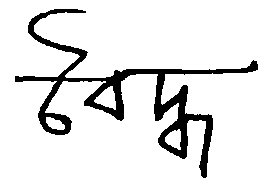

/content/gdrive/MyDrive/customTF2/data/Test/22201.bmp
Loading model...Done! Took 49.7147057056427 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22201.bmp... 6
4
hoye ja
[33. 78. 89. 78. 33. 91.]
hoye ja
[78. 33. 89. 11.]
Done
10


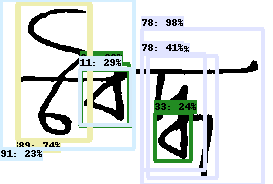

0.9837463 [0.35015562 0.29413128 0.67921215 0.47490987] 1
0.98056453 [0.16178185 0.5181676  1.         0.9641587 ] 1
0.9152464 [0.30881745 0.5391734  0.9645998  0.7961026 ] TUKI3
0
0.8538241 [0.38124913 0.2910555  0.681616   0.4834391 ] TUKI3
0
0.85011804 [0.02699371 0.06033672 0.7571388  0.33383295] 1
0.7428095 [0.01169762 0.06816533 0.76173115 0.32864243] TUKI3
0
0.41254392 [0.29377642 0.5195397  0.91866577 0.75278485] TUKI3
0
0.29327208 [0.38019094 0.29243702 0.6757282  0.48294646] TUKI3
0
0.23762542 [0.61786443 0.56701607 0.86962223 0.70022213] TUKI3
0
0.22953023 [0.        0.        0.8049753 0.4915019] TUKI3
0
['ৈ', 'ব', 'দ্ধ']
['ব', 'ৈ', 'দ্ধ']
বৈদ্ধA-----------------------------------------------------------
[[64.42863440513611, 80.29783916473389, 124.97503614425659, 129.6503950059414, 33], [29.767859935760498, 141.4597588777542, 184.0, 263.2153288722038, 78], [4.966843083500862, 16.471924614161253, 139.3135371208191, 91.13639518618584, 89]]
[[16, 4, 93, 145, 89], [85, 61, 146,

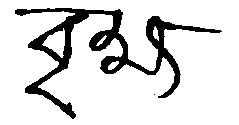

/content/gdrive/MyDrive/customTF2/data/Test/22202.bmp
Loading model...Done! Took 48.92387843132019 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22202.bmp... 8
7
hoye ja
[68. 33. 33. 71. 63. 88. 17. 58.]
hoye ja
[68. 88. 11. 33. 77. 63. 42.]
Done
15


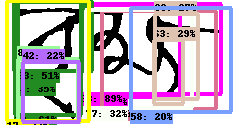

0.96379304 [0.0420945  0.35805857 0.7741674  0.75340307] 1
0.88997537 [0.0384465  0.3373071  0.74972343 0.927582  ] TUKI3
0
0.88830173 [0.5020224  0.09046198 0.9730022  0.3366985 ] 1
0.83122015 [0.00832546 0.05684757 0.5674039  0.388039  ] TUKI3
TUKI3
1
0.6075695 [0.         0.06209379 0.9161537  0.3398619 ] TUKI3
0
0.5105523 [0.0177685  0.07306352 0.56597245 0.35966727] TUKI3
TUKI3
TUKI3
0
0.3591355 [0.09338327 0.4230165  0.8707174  0.90708417] TUKI3
0
0.34750894 [0.00832546 0.05684757 0.5674039  0.388039  ] TUKI3
TUKI3
TUKI3
0
0.32181227 [0.08439147 0.35909992 0.8637798  0.8044241 ] TUKI3
0
0.28773516 [0.3211096  0.64241076 0.82488847 0.7678359 ] 1
0.2720824 [0.11342394 0.646608   0.7914955  0.8314563 ] TUKI3
0
0.22905366 [0.47652677 0.07144161 0.97314906 0.32797566] TUKI3
0
0.22482505 [0.00978642 0.02910441 0.96114504 0.37654185] TUKI3
TUKI3
0
0.21603642 [0.4963979  0.09237435 0.97074753 0.33423764] TUKI3
0
0.20298854 [0.06880965 0.5442942  0.8916657  0.9668962 ] TUKI3
0
['ক', 'ৃ', 

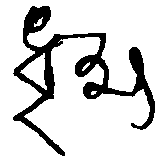

/content/gdrive/MyDrive/customTF2/data/Test/22203.bmp
Loading model...Done! Took 46.830299377441406 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22203.bmp... 6
9
hoye ja
[29. 29. 88. 68. 63. 72.]
hoye ja
[29. 88. 68. 67. 63. 66. 72. 64.  2.]
Done
15


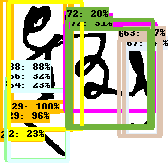

0.99586993 [0.01079977 0.06991949 0.6197689  0.38948715] 1
0.97662497 [0.         0.00495641 0.7922006  0.4307708 ] TUKI3
0
0.9588908 [0.01385728 0.04388784 0.67496586 0.42136747] TUKI3
0
0.91744775 [0.55219597 0.03308923 0.9791136  0.39910242] TUKI3
1
0.8792361 [0.5643314  0.04908057 0.9831401  0.40952837] TUKI3
TUKI3
0
0.8358413 [0.16482514 0.41898584 0.7669645  0.9064139 ] 1
0.4253534 [0.15113892 0.3823754  0.68007725 0.93097436] TUKI3
TUKI3
TUKI3
0
0.40245864 [0.30630204 0.75291806 0.8240682  0.9461089 ] TUKI3
0
0.37703967 [0.25082448 0.70621634 0.83316934 0.95186484] 1
0.37354243 [0.23975794 0.7325383  0.8322948  0.9586891 ] TUKI3
0
0.319696 [0.5643314  0.04908057 0.9831401  0.40952837] TUKI3
TUKI3
0
0.30724302 [0.1788131  0.41973934 0.7711815  0.8890493 ] TUKI3
0
0.23282589 [0.5643314  0.04908057 0.9831401  0.40952837] TUKI3
TUKI3
0
0.22647357 [0.01694694 0.04820545 0.7873788  0.48949593] TUKI3
0
0.20340386 [0.12708434 0.39742258 0.7818058  0.91223294] TUKI3
TUKI3
0
['ৃ', 'ধ', 'ক

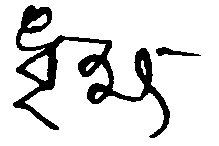

/content/gdrive/MyDrive/customTF2/data/Test/22204.bmp
Loading model...Done! Took 51.48602509498596 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22204.bmp... 6
9
hoye ja
[29. 88. 68. 71. 12. 29.]
hoye ja
[88. 29. 68. 74. 42. 64. 20. 64. 71.]
Done
15


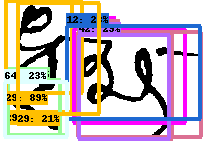

0.9925949 [0.00671062 0.02515653 0.76658994 0.3305738 ] 1
0.92751974 [0.5539493  0.03332213 0.91931456 0.27817893] TUKI3
0
0.9064963 [0.566033   0.02514264 0.91923463 0.30687603] TUKI3
0
0.8881221 [0.01042774 0.02607338 0.63029456 0.3789692 ] TUKI3
0
0.7788984 [0.22018477 0.35656714 0.9466151  0.7896532 ] 1
0.6638084 [0.20076843 0.33593917 0.8409679  0.84546226] TUKI3
0
0.58329296 [0.22245388 0.35420397 0.9338646  0.919491  ] TUKI3
0
0.42491817 [0.22018477 0.35656714 0.9466151  0.7896532 ] TUKI3
0
0.2892982 [0.24137959 0.35719752 0.94653976 0.7751529 ] TUKI3
0
0.27610424 [0.18479282 0.3040531  0.81058574 0.9141461 ] TUKI3
TUKI3
0
0.25333232 [0.22018477 0.35656714 0.9466151  0.7896532 ] TUKI3
0
0.2476375 [0.22018477 0.35656714 0.9466151  0.7896532 ] TUKI3
0
0.22866468 [0.5642159  0.01954989 0.9333973  0.30969918] TUKI3
0
0.21217199 [0.22018477 0.35656714 0.9466151  0.7896532 ] TUKI3
0
0.20933928 [0.02180176 0.08199664 0.77675253 0.4547755 ] TUKI3
0
['ধ', 'ক্ষ']
['ধ', 'ক্ষ']
ধক্ষA-------

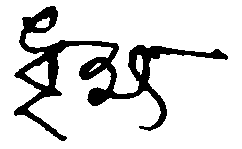

/content/gdrive/MyDrive/customTF2/data/Test/22205.bmp
Loading model...Done! Took 50.03437376022339 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22205.bmp... 7
5
hoye ja
[29. 88. 29. 71. 58. 77. 68.]
hoye ja
[88. 29. 68. 66. 64.]
Done
12


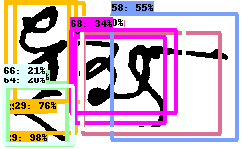

0.98028046 [0.00269161 0.02151928 0.88632536 0.3167727 ] 1
0.9334979 [0.592551   0.02136272 0.96959436 0.3051278 ] TUKI3
0
0.86709344 [0.0232982  0.02427807 0.67811114 0.34852585] TUKI3
0
0.8311746 [0.5608383  0.03043446 0.96451217 0.2800392 ] TUKI3
0
0.761205 [0.24986619 0.30765978 0.8219611  0.6857954 ] TUKI3
1
0.7558285 [0.00350746 0.05793342 0.6714768  0.28670675] TUKI3
0
0.7180182 [0.22342579 0.33991173 0.8988171  0.9114816 ] TUKI3
0
0.55172706 [0.09772289 0.4599692  0.93392974 0.98065823] TUKI3
0
0.39550433 [0.19832656 0.3349688  0.85949993 0.76372814] TUKI3
0
0.33632687 [0.20287773 0.2915806  0.7567144  0.72997546] TUKI3
TUKI3
0
0.21354698 [0.58287364 0.01593617 0.9661296  0.3040079 ] TUKI3
0
0.20235264 [0.58287364 0.01593617 0.9661296  0.3040079 ] TUKI3
0
['ধ', 'ক্ষ']
['ধ', 'ক্ষ']
ধক্ষA-----------------------------------------------------------
[[0.4010502048768103, 5.207666896283627, 132.06247854232788, 76.65899324417114, 29], [37.23006194829941, 74.45366555452347, 122.4722046

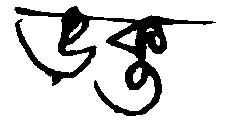

/content/gdrive/MyDrive/customTF2/data/Test/22206.bmp
Loading model...Done! Took 49.648977756500244 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22206.bmp... 6
3
hoye ja
[74. 11. 15. 23. 34. 43.]
hoye ja
[34. 74. 11.]
Done
9


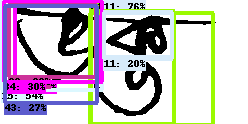

0.91323674 [0.03819063 0.05805108 0.6546618  0.40855834] 1
0.8886598 [0.10733917 0.36029336 1.         0.86047035] TUKI3
1
0.7563629 [0.10551322 0.4168132  0.45869634 0.6990752 ] TUKI3
0
0.7543131 [0.09051603 0.36435795 0.99247366 0.7020873 ] TUKI3
TUKI3
0
0.5370414 [0.         0.00655066 0.72500587 0.41265544] TUKI3
0
0.33221805 [0.0400461  0.03494861 0.61456376 0.3880294 ] TUKI3
0
0.3037083 [0.01285707 0.0129821  0.65568906 0.41329738] TUKI3
0
0.2729258 [0.05635939 0.01965347 0.8228859  0.39408848] TUKI3
0
0.20257442 [0.09745167 0.41710472 0.47424442 0.6965524 ] TUKI3
0
['ভ', 'ক্ত']
['ভ', 'ক্ত']
ভক্তA-----------------------------------------------------------
[[4.735638499259949, 14.396667718887329, 81.17806005477905, 101.32246804237366, 34], [13.3100565969944, 89.35275292396545, 124.0, 213.39664793014526, 74]]
[[14, 2, 100, 99, 34], [90, 5, 190, 124, 74]]
actual class 34
actual class 74
EKHANE
TP CHANGE index =  34  TP DIFFERENCE =  [-1]
TP CHANGE index =  74  TP DIFFERENCE =  [-1]


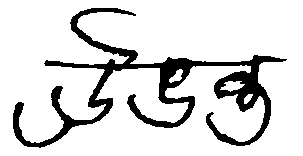

/content/gdrive/MyDrive/customTF2/data/Test/22207.bmp
Loading model...Done! Took 48.528481245040894 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22207.bmp... 6
4
hoye ja
[ 5. 69. 15. 34.  4.  4.]
hoye ja
[34.  5. 69.  4.]
Done
10


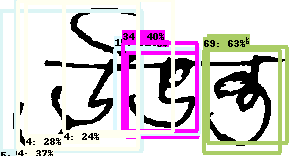

0.9704817 [0.07127661 0.         0.9652873  0.4710836 ] 1
0.87981606 [0.34452638 0.41812795 0.87179625 0.6551842 ] TUKI3
1
0.87607133 [0.         0.05276996 0.95574796 0.46168858] TUKI3
0
0.7604878 [0.3017904  0.684995   0.91259253 0.94764686] 1
0.62642694 [0.32612994 0.670599   0.98007405 0.9266707 ] TUKI3
0
0.51100093 [0.31971854 0.37914887 0.8537545  0.6596028 ] TUKI3
TUKI3
0
0.39721945 [0.27812466 0.40494353 0.8357553  0.65298915] TUKI3
TUKI3
0
0.36623007 [0.00753731 0.05774809 0.9526525  0.4585694 ] TUKI3
0
0.28034943 [0.02512878 0.08294684 0.87164694 0.45614532] TUKI3
0
0.2373642 [0.00140176 0.21121997 0.8401916  0.57148826] TUKI3
0
['ঊ', 'ভ', 'ন্ত']
['ঊ', 'ভ', 'ন্ত']
ঊভন্তA-----------------------------------------------------------
[[11.119151562452316, 0.0, 150.58482313156128, 142.73833420872688, 5], [53.74611532688141, 126.6927700638771, 136.00021505355835, 198.5208154320717, 34], [47.07930028438568, 207.55348366498947, 142.3644347190857, 287.13699746131897, 69]]
[[14, 6, 139,

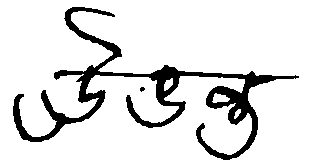

/content/gdrive/MyDrive/customTF2/data/Test/22208.bmp
Loading model...Done! Took 47.10761880874634 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22208.bmp... 6
6
hoye ja
[ 5. 69. 15.  4. 34. 21.]
hoye ja
[34.  5. 69.  4. 81. 81.]
Done
12


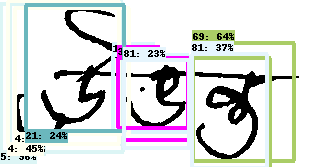

0.9625998 [0.02613078 0.         0.9076984  0.38943613] 1
0.9224671 [0.36358947 0.39041093 0.8338308  0.59916294] 1
0.87028605 [0.00232804 0.02888617 0.8604234  0.3842288 ] TUKI3
0
0.85778 [0.34839925 0.6048817  1.         0.8534668 ] 1
0.63678694 [0.25941864 0.60846263 0.96014744 0.9303519 ] TUKI3
0
0.60686934 [0.33268228 0.35630512 0.7855469  0.59597456] TUKI3
TUKI3
0
0.57689106 [0.04980547 0.0472955  0.80063754 0.40873936] TUKI3
0
0.448423 [0.00863883 0.02436315 0.8565873  0.37739444] TUKI3
0
0.39744732 [0.35022917 0.36965662 0.7627368  0.5945727 ] TUKI3
TUKI3
0
0.373177 [0.32495978 0.6047567  1.         0.8443687 ] TUKI3
0
0.23925264 [0.03461393 0.08016103 0.7799516  0.39404628] TUKI3
0
0.22768116 [0.36476257 0.3890392  0.88217723 0.5993309 ] TUKI3
TUKI3
0
['ঊ', 'ভ', 'ন্ত']
['ঊ', 'ভ', 'ন্ত']
ঊভন্তA-----------------------------------------------------------
[[4.363840978592634, 0.0, 151.585631608963, 123.45125186443329, 5], [60.7194407582283, 123.76026478409767, 139.2497392296791, 1

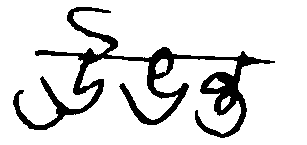

/content/gdrive/MyDrive/customTF2/data/Test/22209.bmp
Loading model...Done! Took 54.191975355148315 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22209.bmp... 7
6
hoye ja
[ 5. 69. 15.  4. 34.  5. 21.]
hoye ja
[69. 34.  4.  5. 77. 83.]
Done
13


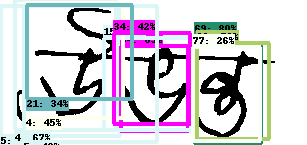

0.95090497 [0.04452941 0.         0.93568623 0.3917215 ] 1
0.7988326 [0.3067641  0.6337866  0.98729074 0.85149163] 1
0.7841031 [0.3018831  0.64091253 0.9531995  0.87801707] TUKI3
0
0.69390875 [0.32098648 0.39301056 0.90080535 0.61281353] 1
0.67706925 [0.2681464  0.33849737 0.89410365 0.6245487 ] TUKI3
TUKI3
0
0.67205536 [1.3262033e-04 4.8422620e-02 8.9440298e-01 3.8108265e-01] TUKI3
0
0.64640874 [1.3262033e-04 4.8422620e-02 8.9440298e-01 3.8108265e-01] TUKI3
0
0.44876125 [0.02609919 0.08232595 0.8094205  0.40164703] TUKI3
0
0.41931358 [0.23438646 0.3706181  0.8506281  0.6217072 ] TUKI3
TUKI3
0
0.40494788 [0.04179387 0.07505602 0.9741324  0.51200217] TUKI3
0
0.34058437 [0.03891607 0.08611755 0.6758878  0.43306687] TUKI3
0
0.25831485 [0.3257987  0.6263692  0.9671021  0.84713453] TUKI3
0
0.22356932 [0.3067641  0.6337866  0.98729074 0.85149163] TUKI3
0
['ঊ', 'ভ', 'ন্ত']
['ঊ', 'ভ', 'ন্ত']
ঊভন্তA-----------------------------------------------------------
[[6.456764191389084, 0.0, 135.6745034

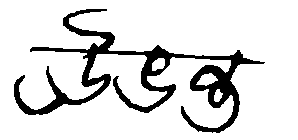

/content/gdrive/MyDrive/customTF2/data/Test/22210.bmp
Loading model...Done! Took 50.28280234336853 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22210.bmp... 6
5
hoye ja
[ 5. 69. 34. 15.  4. 75.]
hoye ja
[34. 69.  5.  4. 81.]
Done
11


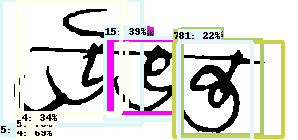

0.98533636 [0.0036898  0.         0.8864768  0.47665375] 1
0.85655665 [0.2878446  0.37555975 0.8534538  0.60041636] TUKI3
1
0.79037404 [0.2998349  0.5977371  1.         0.84777033] TUKI3
1
0.7882782 [0.02108291 0.0541174  0.8254719  0.42715693] TUKI3
0
0.69166964 [0.02108291 0.0541174  0.8254719  0.42715693] TUKI3
0
0.60439444 [0.29005635 0.6081619  0.9578319  0.88068604] TUKI3
0
0.573408 [0.28208056 0.3607545  0.8053042  0.6022103 ] TUKI3
TUKI3
0
0.38738132 [0.2772103  0.3507972  0.85511893 0.5943098 ] TUKI3
0
0.33638993 [0.02381424 0.07318527 0.8025493  0.4071005 ] TUKI3
0
0.23605879 [0.3033751  0.58238846 0.97855264 0.95194274] TUKI3
TUKI3
0
0.21950534 [0.30398956 0.59753656 0.9964584  0.8471503 ] TUKI3
TUKI3
0
['ঊ', 'ভ', 'ন্ত']
['ঊ', 'ভ', 'ন্ত']
ঊভন্তA-----------------------------------------------------------
[[0.5165719240903854, 0.0, 124.10675406455994, 142.04281890392303, 5], [40.29824376106262, 111.91680467128754, 119.48353409767151, 178.92407596111298, 34], [41.97688698768616

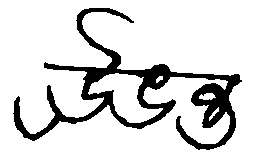

/content/gdrive/MyDrive/customTF2/data/Test/22211.bmp
Loading model...Done! Took 48.592907667160034 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22211.bmp... 7
3
hoye ja
[ 5. 69.  5.  5.  5. 81. 74.]
hoye ja
[ 5. 34. 81.]
Done
10


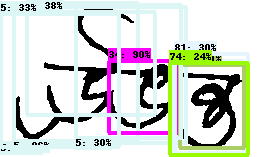

0.9956215 [0.04884361 0.         0.90790194 0.72306484] 1
0.95578855 [0.02028355 0.05382125 0.89317775 0.53732777] TUKI3
0
0.8953793 [0.389925   0.42181975 0.84672475 0.68825024] TUKI3
0
0.5465634 [0.39306968 0.66947854 0.9980276  0.9466797 ] TUKI3
1
0.4070932 [0.4189768  0.6959378  0.93773913 0.9494379 ] TUKI3
TUKI3
0
0.3759384 [0.07786987 0.10105147 0.7304772  0.6009054 ] TUKI3
0
0.32762155 [0.09508686 0.         0.93314666 0.46174082] TUKI3
0
0.3031913 [0.03781181 0.29412442 0.874533   0.70210445] TUKI3
0
0.29677707 [0.3477086  0.67475563 0.97201294 0.9624183 ] TUKI3
TUKI3
0
0.2386689 [0.40760246 0.6572182  0.9816227  0.9622826 ] TUKI3
TUKI3
0
['ঊ', 'ত্ত']
['ঊ', 'ত্ত']
ঊত্তA-----------------------------------------------------------
[[7.668446931988001, 0.0, 142.54060500860214, 186.5507286787033, 5], [61.711940467357635, 172.72546219825745, 156.6903367638588, 244.24336552619934, 81]]
[[8, 2, 128, 144, 5], [112, 58, 181, 149, 34], [174, 63, 244, 155, 69]]
actual class 5
actual class 

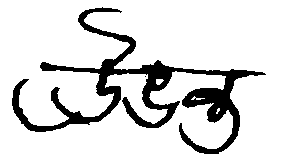

/content/gdrive/MyDrive/customTF2/data/Test/22212.bmp
Loading model...Done! Took 47.30886697769165 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22212.bmp... 8
5
hoye ja
[ 5. 69. 34.  5.  4. 15. 21. 75.]
hoye ja
[ 5. 34. 69. 81. 43.]
Done
13


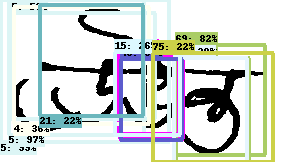

0.99388415 [7.3574955e-04 0.0000000e+00 8.7649971e-01 5.9119713e-01] 1
0.9717533 [0.00355476 0.03121905 0.8322578  0.50454617] TUKI3
0
0.9132673 [0.34736365 0.41648465 0.85297674 0.6381474 ] TUKI3
0
0.8434783 [0.36390874 0.61203545 1.         0.86874646] 1
0.8229452 [0.28329113 0.6104305  0.9542362  0.925624  ] TUKI3
0
0.6085972 [0.3212134  0.40584844 0.82275236 0.62712526] TUKI3
0
0.5012192 [0.08433806 0.03873196 0.7332682  0.5414489 ] TUKI3
0
0.39166868 [0.36323872 0.60526717 0.99414766 0.8629085 ] TUKI3
0
0.36498675 [0.04394341 0.04814628 0.7626162  0.5213321 ] TUKI3
0
0.30099666 [0.36849606 0.41898158 0.85858214 0.63616085] TUKI3
0
0.2573689 [0.324403   0.39867678 0.8274431  0.6303667 ] TUKI3
0
0.22259484 [0.03326363 0.13890466 0.7142488  0.50036967] TUKI3
0
0.21529694 [0.32782784 0.5310409  0.9959374  0.9528776 ] TUKI3
TUKI3
0
['ঊ', 'ন্ত']
['ঊ', 'ন্ত']
ঊন্তA-----------------------------------------------------------
[[0.11919142690021545, 0.0, 141.99295341968536, 169.6735771894455

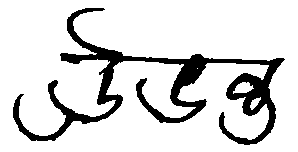

/content/gdrive/MyDrive/customTF2/data/Test/22213.bmp
Loading model...Done! Took 48.901450634002686 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22213.bmp... 7
7
hoye ja
[ 5. 69. 55. 23. 21. 34.  4.]
hoye ja
[ 5. 69. 23. 81.  4. 81. 34.]
Done
14


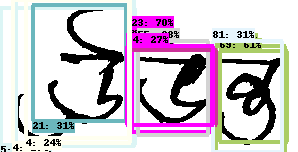

0.9589353 [0.05627702 0.         0.95080876 0.45542684] 1
0.90006185 [0.         0.05277617 0.9570342  0.45254987] TUKI3
0
0.73334277 [0.3075224 0.723454  0.9949    0.9574362] 1
0.6958005 [0.3102473  0.44166228 0.8645958  0.710294  ] TUKI3
1
0.6076194 [0.33636084 0.7353019  0.9293502  0.96348935] TUKI3
0
0.37965515 [0.2708166  0.4614484  0.8824831  0.69926035] TUKI3
0
0.34651846 [0.33145666 0.42509916 0.8199761  0.72504604] TUKI3
TUKI3
TUKI3
0
0.3133814 [0.03906748 0.10827149 0.79372257 0.42368096] TUKI3
0
0.3127093 [0.27490544 0.71452445 0.99703646 0.94803077] TUKI3
0
0.27319044 [0.30872974 0.42601684 0.8189915  0.7165058 ] TUKI3
TUKI3
0
0.2677507 [0.00142679 0.04178056 0.9378731  0.43626833] TUKI3
0
0.24231409 [0.00386447 0.08460819 0.9053442  0.43296906] TUKI3
0
0.20783748 [0.3102473  0.44166228 0.8645958  0.710294  ] TUKI3
TUKI3
0
0.20020255 [0.3102473  0.44166228 0.8645958  0.710294  ] TUKI3
TUKI3
0
['ঊ', 'ড', 'ন্ত']
['ঊ', 'ড', 'ন্ত']
ঊডন্তA----------------------------------------

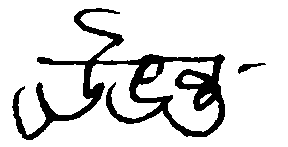

/content/gdrive/MyDrive/customTF2/data/Test/22214.bmp
Loading model...Done! Took 53.719181537628174 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22214.bmp... 6
6
hoye ja
[ 5.  5. 71. 21. 15. 71.]
hoye ja
[ 5. 34. 69. 43. 23.  4.]
Done
12


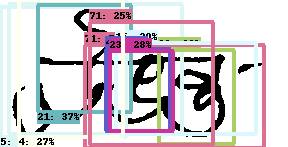

0.9883974 [0.02972735 0.02895072 0.9070659  0.6325314 ] 1
0.93726844 [0.05051364 0.         0.93103945 0.43168443] TUKI3
0
0.8570417 [0.00734657 0.06564651 0.9274236  0.43850678] TUKI3
0
0.8570234 [0.34135655 0.36830956 0.8865292  0.5956618 ] TUKI3
0
0.8030545 [0.3402539  0.5500638  0.9758472  0.81273717] TUKI3
1
0.5912353 [0.3102045  0.29333088 1.         0.9169587 ] TUKI3
TUKI3
0
0.37300953 [0.04053924 0.12985906 0.760106   0.45490396] TUKI3
0
0.29801786 [0.29780722 0.3998158  0.9068829  0.89212257] TUKI3
TUKI3
0
0.29630667 [0.33743823 0.3674866  0.88800657 0.5934705 ] TUKI3
0
0.27922156 [0.3535145  0.37954932 0.88714796 0.60285777] TUKI3
0
0.27408776 [0.         0.06421472 0.92942286 0.42844486] TUKI3
0
0.25097457 [0.15517318 0.31210122 0.9810847  0.74038565] TUKI3
0
['ঊ', 'ন্ত']
['ঊ', 'ন্ত']
ঊন্তA-----------------------------------------------------------
[[4.369920859113336, 8.33780711889267, 133.33869141340256, 182.1690444946289, 5], [50.01732176542282, 158.41837120056152, 143.44

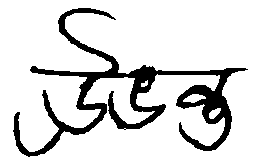

/content/gdrive/MyDrive/customTF2/data/Test/22215.bmp
Loading model...Done! Took 51.022376537323 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22215.bmp... 4
6
hoye ja
[ 5. 69. 15. 34.]
hoye ja
[34.  5. 69. 81.  4. 15.]
Done
10


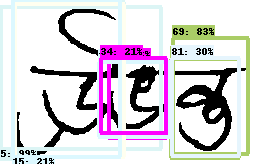

0.9945134 [0.04865761 0.         0.90320396 0.6040148 ] 1
0.95788074 [0.37338358 0.40629703 0.83968896 0.61950654] TUKI3
0
0.9350104 [0.01768228 0.05231833 0.95310104 0.4643801 ] TUKI3
0
0.8983043 [0.3632029 0.6374142 0.9593668 0.8923806] 1
0.82594347 [0.23618457 0.64356357 0.93784755 0.9261333 ] TUKI3
0
0.36903358 [0.38190287 0.36666867 0.83109844 0.6352372 ] TUKI3
0
0.29993555 [0.35432708 0.64170146 0.9469029  0.8920374 ] TUKI3
0
0.29982445 [0.02520359 0.05409248 0.95620066 0.46414232] TUKI3
0
0.20795082 [0.0011093  0.04787052 0.951873   0.4506819 ] TUKI3
0
0.20579465 [0.3573203  0.3737584  0.80737257 0.6204542 ] TUKI3
0
['ঊ', 'ন্ত']
['ঊ', 'ন্ত']
ঊন্তA-----------------------------------------------------------
[[7.9798475950956345, 0.0, 148.12545013427734, 161.87597012519836, 5], [59.56527554988861, 170.82701015472412, 157.33615493774414, 239.15799951553345, 69]]
[[7, 5, 124, 160, 5], [108, 58, 173, 150, 34], [167, 62, 263, 163, 69]]
actual class 5
actual class 34
EKHANE
actual class

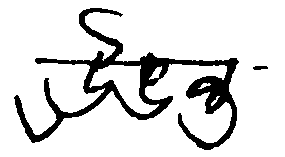

/content/gdrive/MyDrive/customTF2/data/Test/22216.bmp
Loading model...Done! Took 49.913081884384155 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22216.bmp... 5
5
hoye ja
[ 5. 69. 15. 71. 34.]
hoye ja
[ 5. 69. 34.  4. 81.]
Done
10


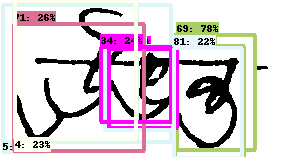

0.9953042 [0.03557173 0.01021288 0.89908344 0.6009033 ] 1
0.8972607 [0.00975302 0.04902002 0.88564    0.48343107] TUKI3
0
0.8218421 [0.2945267  0.61144066 1.         0.85904396] 1
0.77603483 [0.22299427 0.618336   0.9542622  0.89637595] TUKI3
0
0.6805411 [0.31273794 0.38059947 0.81189346 0.6220852 ] TUKI3
0
0.53245693 [0.29892498 0.36635485 0.8241374  0.6102794 ] TUKI3
0
0.26152396 [0.15872973 0.04879807 0.9572082  0.5086606 ] TUKI3
0
0.23845643 [0.30384257 0.35423803 0.7729537  0.6006685 ] TUKI3
0
0.22685118 [0.01226544 0.05079009 0.8851007  0.47853708] TUKI3
0
0.22444105 [0.30788794 0.6089375  1.         0.84968174] TUKI3
0
['ঊ', 'ন্ত']
['ঊ', 'ন্ত']
ঊন্তA-----------------------------------------------------------
[[5.584761280566454, 2.9106709593907, 141.15609937906265, 171.2574326992035, 5], [46.24069130420685, 174.26058769226074, 157.0, 244.82752740383148, 69]]
[[7, 2, 123, 157, 5], [115, 49, 185, 144, 34], [168, 56, 261, 156, 69]]
actual class 5
actual class 34
EKHANE
actual class

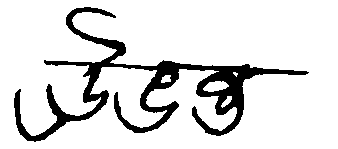

/content/gdrive/MyDrive/customTF2/data/Test/22217.bmp
Loading model...Done! Took 48.97925519943237 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22217.bmp... 6
7
hoye ja
[ 5. 58.  4. 34. 15. 21.]
hoye ja
[34. 81.  4.  5. 43. 46. 23.]
Done
13


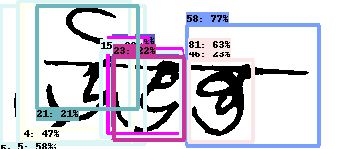

0.9920168 [0.04492478 0.         0.96238166 0.43119913] 1
0.8605617 [0.3823192  0.33227578 0.93413436 0.54743224] TUKI3
1
0.7659008 [0.17268945 0.5507369  0.9775654  0.9440066 ] 1
0.62658083 [0.4064567  0.5569133  0.94708955 0.75091   ] TUKI3
0
0.60624963 [0.00419584 0.06083958 0.9492831  0.39146537] TUKI3
0
0.5789253 [0.00848123 0.05159178 0.9463874  0.3861145 ] TUKI3
0
0.4665936 [0.04349777 0.06902543 0.8641956  0.39581606] TUKI3
0
0.44640476 [0.3823192  0.33227578 0.93413436 0.54743224] TUKI3
TUKI3
0
0.42882308 [0.33281058 0.31885096 0.89289004 0.5395844 ] TUKI3
0
0.38091925 [0.3552146  0.29831842 0.9151636  0.5360411 ] TUKI3
0
0.22534756 [0.4064567  0.5569133  0.94708955 0.75091   ] TUKI3
0
0.22384809 [0.38641497 0.33488354 0.9359268  0.5461432 ] TUKI3
TUKI3
0
0.206776 [0.0456844 0.108273  0.7264867 0.4084395] TUKI3
0
['ঊ', 'ভ', '৮']
['ঊ', 'ভ', '৮']
ঊভ৮A-----------------------------------------------------------
[[6.693792328238487, 0.0, 143.39486747980118, 145.74530708789825, 5], 

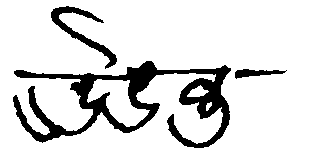

/content/gdrive/MyDrive/customTF2/data/Test/22218.bmp
Loading model...Done! Took 48.84198021888733 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22218.bmp... 4
5
hoye ja
[ 5. 58. 69. 75.]
hoye ja
[ 5. 69.  3. 34. 81.]
Done
9


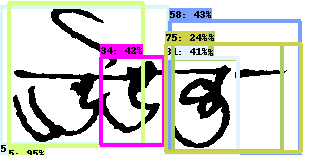

0.99650264 [0.04539255 0.         0.9260156  0.541706  ] 1
0.94951683 [0.02491006 0.02825522 0.9394131  0.46273938] TUKI3
0
0.7543944 [0.38146335 0.55021566 1.         0.7674963 ] 1
0.7003921 [0.02491006 0.02825522 0.9394131  0.46273938] TUKI3
0
0.4299404 [0.13817517 0.545549   0.99999994 0.9671706 ] TUKI3
0
0.4196318 [0.3701921  0.3234135  0.93467945 0.5295153 ] TUKI3
0
0.4107468 [0.3758355  0.53253573 1.         0.76829857] TUKI3
TUKI3
0
0.24492414 [0.285494   0.55611616 0.9691704  0.9071307 ] TUKI3
0
0.24349754 [0.29032215 0.53319216 0.9764515  0.97076786] TUKI3
TUKI3
0
['ঊ', 'ন্ত']
['ঊ', 'ন্ত']
ঊন্তA-----------------------------------------------------------
[[7.035845331847668, 0.0, 143.5324203968048, 168.47057396173477, 5], [59.1268190741539, 171.11707073450089, 155.0, 238.69134551286697, 69]]
[[6, 1, 122, 155, 5], [100, 55, 173, 145, 34], [168, 47, 251, 155, 69]]
actual class 5
actual class 34
EKHANE
actual class 69
EKHANE
TP CHANGE index =  5  TP DIFFERENCE =  [-1]
FN CHANGE in

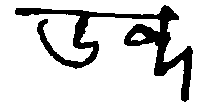

/content/gdrive/MyDrive/customTF2/data/Test/22219.bmp
Loading model...Done! Took 54.797303438186646 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22219.bmp... 5
2
hoye ja
[76. 23. 28. 55. 56.]
hoye ja
[23. 76.]
Done
7


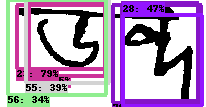

0.9482637 [0.02427414 0.13744825 0.7011323  0.5122119 ] 1
0.94792724 [0.03568551 0.5898454  0.9401624  0.9646373 ] 1
0.8731519 [0.05262968 0.54396975 0.95870924 0.97796106] TUKI3
0
0.7880578 [0.05062458 0.0788465  0.643856   0.51813436] TUKI3
0
0.4744906 [0.14062302 0.59307164 0.9831654  0.9843285 ] TUKI3
0
0.38904884 [0.         0.12228929 0.76694286 0.5320533 ] TUKI3
0
0.3401356 [0.         0.03509979 0.88647443 0.514582  ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[2.5973330438137054, 28.314339756965637, 75.021155834198, 105.51565527915955, 23], [3.8183495104312897, 121.50815629959106, 100.5973789691925, 198.7152795791626, 76]]
[[26, 5, 118, 85, 23], [120, 2, 195, 107, 76]]
actual class 23
actual class 76
EKHANE
TP CHANGE index =  23  TP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ড  DIFFERENCE =  1
confusion_matrix_row =  ন্দ  COLUMN =  ন্দ  DIFFERENCE =  1
TP =  [0, 4

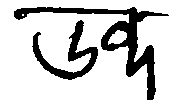

/content/gdrive/MyDrive/customTF2/data/Test/22220.bmp
Loading model...Done! Took 51.51125240325928 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22220.bmp... 5
7
hoye ja
[76. 23. 56. 55. 28.]
hoye ja
[23. 76. 77. 71. 18. 39. 18.]
Done
12


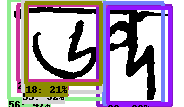

0.95845234 [0.02462164 0.14136577 0.78074706 0.5534171 ] 1
0.80218667 [0.06223413 0.5277113  0.98369044 0.93127984] TUKI3
1
0.79719764 [0.05083126 0.09492695 0.7518905  0.5787237 ] TUKI3
0
0.7392212 [0.03575516 0.5603957  0.9587448  0.8860148 ] TUKI3
0
0.46755219 [0.00349243 0.04555059 0.9251002  0.56580037] TUKI3
0
0.3420997 [0.03554195 0.56234354 0.9638167  0.88970906] TUKI3
0
0.32750845 [0.03554195 0.56234354 0.9638167  0.88970906] TUKI3
0
0.32275409 [0.         0.12239969 0.8549184  0.5521984 ] TUKI3
0
0.30157652 [0.03554195 0.56234354 0.9638167  0.88970906] TUKI3
0
0.26896852 [0.03554195 0.56234354 0.9638167  0.88970906] TUKI3
0
0.22541757 [0.08269236 0.5832604  0.9638685  0.9285993 ] TUKI3
0
0.20860738 [0.02951655 0.14024898 0.78482807 0.5511006 ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[2.634515017271042, 26.011301040649414, 83.53993499279022, 101.82874393463135, 23], [6.659051485359669, 97.09887409210205, 105.254877150

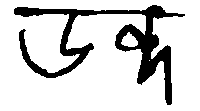

/content/gdrive/MyDrive/customTF2/data/Test/22222.bmp
Loading model...Done! Took 47.031047344207764 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22222.bmp... 5
3
hoye ja
[76. 55. 56. 23. 25.]
hoye ja
[23. 76. 71.]
Done
8


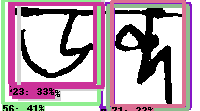

0.98447025 [0.02272779 0.04855108 0.75431615 0.47716498] 1
0.86803734 [0.02243096 0.56064373 0.94903135 0.92707795] 1
0.8490441 [0.03957301 0.5025188  0.9673741  0.95053744] TUKI3
0
0.8251704 [0.         0.092875   0.8005109  0.51614696] TUKI3
0
0.40877858 [0.         0.01484954 0.93297285 0.4961711 ] TUKI3
0
0.3337305 [0.03840691 0.06262337 0.77520293 0.5171834 ] TUKI3
0
0.24166434 [0.05928101 0.5378672  0.9816845  0.94304484] TUKI3
0
0.22244039 [0.01091567 0.55914694 0.94855416 0.9238308 ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[2.522784411907196, 9.710216522216797, 83.72909277677536, 95.43299674987793, 23], [2.4898361563682556, 112.128746509552, 105.3424801826477, 185.41558980941772, 76]]
[[11, 2, 100, 98, 23], [106, 0, 181, 107, 76]]
actual class 23
actual class 76
EKHANE
TP CHANGE index =  23  TP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ড  DIFFERENCE =  1
confus

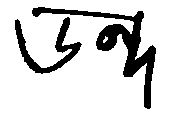

/content/gdrive/MyDrive/customTF2/data/Test/22223.bmp
Loading model...Done! Took 49.16758942604065 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22223.bmp... 5
2
hoye ja
[76. 55. 56. 23. 69.]
hoye ja
[76. 23.]
Done
7


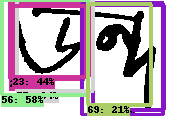

0.9787289 [0.04826197 0.5484172  0.9423348  0.97103894] 1
0.96253157 [0.02437869 0.0569091  0.6761466  0.50290084] 1
0.903108 [0.02826805 0.4843479  0.99013454 0.9646327 ] TUKI3
0
0.63529843 [0.         0.09649137 0.77998734 0.55566263] TUKI3
TUKI3
0
0.5750461 [0.00363491 0.01142862 0.8119156  0.5231846 ] TUKI3
0
0.44381464 [0.05308052 0.07208954 0.6575348  0.52799284] TUKI3
0
0.20797002 [0.03785313 0.51892394 0.90371686 0.8960531 ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[5.5983885526657104, 92.68250858783722, 109.31083345413208, 164.1055804491043, 76], [2.8279277086257935, 9.617637768387794, 78.43300867080688, 84.99024176597595, 23]]
[[10, 3, 87, 83, 23], [91, 4, 161, 112, 76]]
actual class 23
actual class 76
TP CHANGE index =  23  TP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ড  DIFFERENCE =  1
confusion_matrix_row =  ন্দ  COLUMN =  ন্দ  DIFFERENCE =  1
TP =  [0, 49,

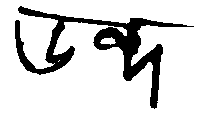

/content/gdrive/MyDrive/customTF2/data/Test/22224.bmp
Loading model...Done! Took 50.552133321762085 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22224.bmp... 5
3
hoye ja
[55. 76. 28. 24. 23.]
hoye ja
[76. 23. 43.]
Done
8


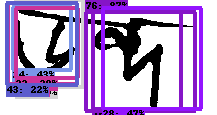

0.9370152 [0.09760508 0.42585045 0.94007754 0.83732337] 1
0.8908113 [0.         0.0731593  0.7529368  0.38405147] 1
0.8669058 [0.10980467 0.39590776 0.96178794 0.8996705 ] TUKI3
0
0.78347164 [0.02619037 0.03251597 0.729848   0.35719278] TUKI3
0
0.4709297 [0.07042264 0.47354198 0.94234943 0.92716056] TUKI3
0
0.4339786 [0.06362764 0.05808173 0.6067411  0.33017248] TUKI3
0
0.29789153 [0.07352608 0.07186868 0.677844   0.36349806] TUKI3
0
0.2233916 [0.02735746 0.03126244 0.736872   0.35802007] TUKI3
0
['৫', 'ন্দ']
['৫', 'ন্দ']
৫ন্দA-----------------------------------------------------------
[[11.224584132432938, 92.40954786539078, 108.1089174747467, 181.69917076826096, 76], [0.0, 15.875568054616451, 86.58772975206375, 83.33916941285133, 55]]
[[9, 1, 85, 87, 23], [89, 12, 175, 110, 76]]
actual class 23
actual class 76
FP CHANGE index =  55  FP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ৫  DIFFERENCE =  1
confusion_matrix_row =  ন্দ  C

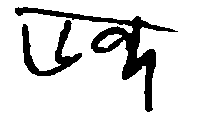

/content/gdrive/MyDrive/customTF2/data/Test/22225.bmp
Loading model...Done! Took 53.36489510536194 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22225.bmp... 4
3
hoye ja
[55. 76. 56. 24.]
hoye ja
[23. 76.  4.]
Done
7


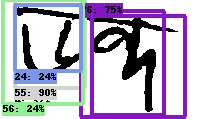

0.9626117 [0.02882034 0.07385904 0.6976878  0.41224074] 1
0.96134424 [0.09319922 0.4575981  0.9589844  0.8180165 ] 1
0.8986466 [0.         0.07400753 0.73493636 0.4230274 ] TUKI3
0
0.74588263 [0.13553981 0.4028151  0.9802434  0.92278343] TUKI3
TUKI3
0
0.31523418 [0.02882034 0.07385904 0.6976878  0.41224074] TUKI3
0
0.24010912 [0.00613682 0.01466884 0.8690653  0.4168889 ] TUKI3
0
0.23871888 [0.04685475 0.07363538 0.5964181  0.4043473 ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[3.4296199679374695, 14.845666229724884, 83.02484875917435, 82.86038947105408, 23], [11.090707570314407, 91.9772161245346, 114.119140625, 164.42132234573364, 76]]
[[10, 2, 93, 92, 23], [85, 7, 170, 115, 76]]
actual class 23
actual class 76
EKHANE
TP CHANGE index =  23  TP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ড  DIFFERENCE =  1
confusion_matrix_row =  ন্দ  COLUMN =  ন্দ  DIFFERENCE =  1
TP =  [0

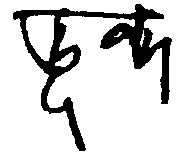

/content/gdrive/MyDrive/customTF2/data/Test/22226.bmp
Loading model...Done! Took 47.72057914733887 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22226.bmp... 8
6
hoye ja
[76. 76. 76. 76. 76. 23. 28. 87.]
hoye ja
[76. 23. 87. 87. 64. 43.]
Done
14


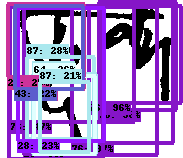

0.98314166 [0.01525614 0.53902435 0.69352543 0.9663222 ] 1
0.9690606 [0.03808761 0.38968465 0.9046005  0.9473421 ] TUKI3
0
0.9615886 [0.04232231 0.48517457 0.6507416  0.9917623 ] TUKI3
0
0.9345662 [0.04505425 0.12811671 0.9797309  0.86273223] TUKI3
0
0.8805152 [0.0347276  0.08269632 0.5583606  0.46150255] 1
0.857235 [0.47260094 0.1791481  0.97252584 0.52525884] TUKI3
1
0.4671915 [0.04439705 0.05394652 0.76686394 0.7344984 ] TUKI3
TUKI3
0
0.3235157 [0.04748813 0.04829884 1.         0.5655633 ] TUKI3
TUKI3
0
0.27844656 [0.36171177 0.14354818 0.87529695 0.5182762 ] TUKI3
TUKI3
0
0.25593498 [0.48259872 0.18570876 0.9736517  0.52201897] TUKI3
TUKI3
0
0.24595253 [0.02948601 0.04170716 0.4867682  0.46026966] TUKI3
0
0.2318735 [0.05482468 0.09396815 0.8898319  0.5696685 ] TUKI3
TUKI3
0
0.22224271 [0.03972277 0.07957767 0.55766153 0.4543475 ] TUKI3
0
0.2057952 [0.52509123 0.2143258  0.96142286 0.49064985] TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA----------------------------------

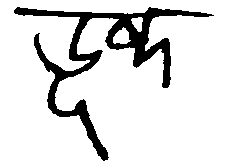

/content/gdrive/MyDrive/customTF2/data/Test/22227.bmp
Loading model...Done! Took 48.87611508369446 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22227.bmp... 7
3
hoye ja
[23. 76. 28. 18. 28. 28. 87.]
hoye ja
[23. 87. 76.]
Done
10


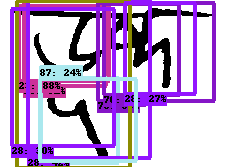

0.90926677 [0.         0.1002854  0.5125201  0.46104735] 1
0.88728076 [0.4706539  0.1747752  0.9713131  0.51217103] TUKI3
1
0.87696576 [0.03707626 0.08072001 0.48191726 0.4702254 ] TUKI3
0
0.83185935 [0.01829466 0.42093086 0.5993111  0.9243909 ] TUKI3
TUKI3
1
0.7943282 [0.02878904 0.44607782 0.5644616  0.772781  ] TUKI3
TUKI3
TUKI3
0
0.42329293 [0.         0.11926621 0.9405582  0.6486749 ] TUKI3
0
0.34207606 [0.00648144 0.06974239 1.         0.5621883 ] TUKI3
0
0.30089465 [0.05617977 0.04938873 0.87151456 0.49162188] TUKI3
0
0.26992604 [0.02387922 0.53637236 0.56047994 0.84326494] TUKI3
0
0.23900114 [0.47540396 0.16988175 0.95840234 0.5867208 ] TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[0.0, 23.26621186733246, 85.59085249900818, 106.96298551559448, 23], [78.5991998910904, 40.54784595966339, 162.20929086208344, 118.82367897033691, 87], [3.055207971483469, 97.65596008300781, 100.08495593070984, 214.45869159698486,

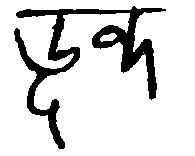

/content/gdrive/MyDrive/customTF2/data/Test/22228.bmp
Loading model...Done! Took 51.356919288635254 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22228.bmp... 7
7
hoye ja
[76. 23. 76. 87. 28. 18. 87.]
hoye ja
[76. 23. 87. 64. 48. 88. 87.]
Done
14


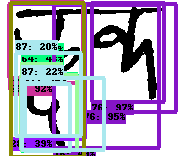

0.9729139 [0.01973021 0.4668965  0.6533718  0.84587836] 1
0.95262295 [0.02687862 0.43022582 0.7116609  0.9045357 ] TUKI3
0
0.9394754 [0.02647751 0.04513184 0.49389315 0.43403715] 1
0.9225363 [0.01715228 0.05541478 0.53158224 0.42802566] TUKI3
0
0.8755497 [0.47881562 0.10926381 0.9653289  0.39545438] TUKI3
1
0.48748603 [0.03226387 0.27540445 0.94864494 0.8200603 ] TUKI3
0
0.4835278 [0.47881562 0.10926381 0.9653289  0.39545438] TUKI3
TUKI3
0
0.41991886 [0.540835   0.12338156 0.96229863 0.3613874 ] TUKI3
0
0.38743716 [0.03200706 0.05639627 0.8865901  0.43682832] TUKI3
0
0.2902686 [0.02185501 0.05151459 1.         0.4317325 ] TUKI3
0
0.26351056 [0.47881562 0.10926381 0.9653289  0.39545438] TUKI3
TUKI3
0
0.23685917 [0.48309356 0.1040208  0.9602429  0.39679465] TUKI3
TUKI3
0
0.22453697 [0.5018243  0.11231023 0.9602803  0.53572077] TUKI3
TUKI3
0
0.20095216 [0.34311703 0.07824248 0.8686366  0.41674837] TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA------------------------------------

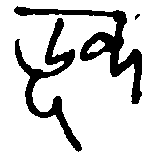

/content/gdrive/MyDrive/customTF2/data/Test/22229.bmp
Loading model...Done! Took 50.96591377258301 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22229.bmp... 7
4
hoye ja
[76. 23. 76. 87. 28. 76. 18.]
hoye ja
[76. 23. 87. 66.]
Done
11


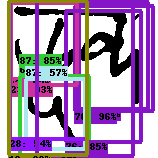

0.9765187 [0.01471427 0.49844635 0.68621457 0.93893695] 1
0.96138465 [0.04300388 0.47264647 0.7022134  0.97190976] TUKI3
0
0.9329972 [0.02331655 0.0564176  0.49427605 0.4914418 ] 1
0.92589474 [0.02384502 0.06743653 0.53429747 0.49280906] TUKI3
0
0.8498569 [0.48528546 0.12638956 0.9792834  0.5644768 ] TUKI3
TUKI3
1
0.84523785 [0.07505691 0.41414732 0.89447516 0.89283735] TUKI3
0
0.5700738 [0.5045052  0.1586704  0.9424134  0.54038507] TUKI3
TUKI3
0
0.5383842 [0.00341629 0.06120014 0.8772598  0.55645126] TUKI3
TUKI3
0
0.26845965 [0.00112732 0.23038022 0.9812399  0.8426626 ] TUKI3
0
0.24319202 [0.48528546 0.12638956 0.9792834  0.5644768 ] TUKI3
TUKI3
TUKI3
0
0.22955509 [0.0096228  0.05591135 0.9748583  0.5512518 ] TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[2.324854791164398, 78.75452256202698, 108.42190146446228, 148.35203790664673, 76], [3.6840156465768814, 8.913980692625046, 78.09561538696289, 77.64780223369598, 2

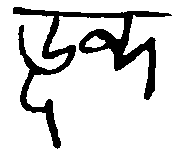

/content/gdrive/MyDrive/customTF2/data/Test/22230.bmp
Loading model...Done! Took 47.84080767631531 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22230.bmp... 7
6
hoye ja
[76. 23. 76. 28. 18. 87. 87.]
hoye ja
[76. 23. 87. 64. 48. 87.]
Done
13


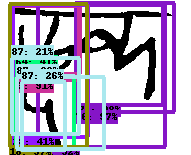

0.9793133 [0.02204111 0.41185147 0.67518926 0.85571045] 1
0.9711031 [0.02577835 0.39708346 0.72085994 0.91481274] TUKI3
0
0.93256044 [0.0408514  0.05651976 0.47623923 0.42269197] TUKI3
1
0.92014706 [0.0383028  0.19705692 0.9451309  0.868881  ] TUKI3
0
0.9118942 [0.02831693 0.06231776 0.5156298  0.41388234] TUKI3
TUKI3
0
0.84603536 [0.49233073 0.07655273 0.95429236 0.38838476] 1
0.4100633 [0.0360358  0.06407385 0.8789601  0.46332783] TUKI3
TUKI3
0
0.40618795 [0.500131   0.0787749  0.95619583 0.38772053] TUKI3
0
0.37103063 [0.02676887 0.0515787  0.9477333  0.45834658] TUKI3
TUKI3
0
0.28618023 [0.50006837 0.08583108 0.95502317 0.5461461 ] TUKI3
TUKI3
0
0.26005837 [0.5303793  0.11353323 0.9638577  0.34440687] TUKI3
0
0.25605533 [0.500131   0.0787749  0.95619583 0.38772053] TUKI3
0
0.20665868 [0.37661362 0.06123295 0.86446106 0.41744518] TUKI3
TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[3.416372388601303, 78.663629949

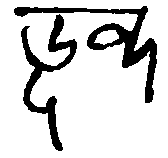

/content/gdrive/MyDrive/customTF2/data/Test/22231.bmp
Loading model...Done! Took 49.01446795463562 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22231.bmp... 6
7
hoye ja
[76. 23. 76. 18. 28. 43.]
hoye ja
[76. 23. 87. 43. 48. 34. 64.]
Done
13


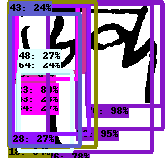

0.98486036 [0.01255864 0.51216006 0.664971   0.9681221 ] 1
0.9462235 [0.02313957 0.45626605 0.81400746 0.9749382 ] TUKI3
0
0.9207046 [0.0155489  0.07949709 0.45461613 0.5008285 ] 1
0.8934282 [0.01571326 0.0990653  0.49750876 0.46989715] TUKI3
0
0.8122572 [0.4622727  0.1046463  0.95057625 0.4302751 ] 1
0.78301895 [0.02880306 0.28227243 0.9558253  0.9100458 ] TUKI3
0
0.33844045 [0.01778538 0.05293066 0.9291108  0.5722201 ] TUKI3
TUKI3
0
0.283393 [0.01571326 0.0990653  0.49750876 0.46989715] TUKI3
0
0.27441213 [0.45026222 0.10838488 0.95543253 0.432938  ] TUKI3
TUKI3
0
0.27433044 [0.04237194 0.07551738 0.8441258  0.53463405] TUKI3
TUKI3
0
0.26666513 [0.01571326 0.0990653  0.49750876 0.46989715] TUKI3
0
0.24308008 [0.45026222 0.10838488 0.95543253 0.432938  ] TUKI3
TUKI3
0
0.23974618 [0.09051044 0.055077   0.9218083  0.47761285] TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[1.9842649698257446, 86.04289054870605, 105.06541705

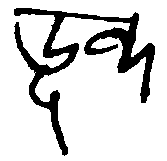

/content/gdrive/MyDrive/customTF2/data/Test/22232.bmp
Loading model...Done! Took 50.59404015541077 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22232.bmp... 7
5
hoye ja
[76. 23. 76. 76. 28. 18. 48.]
hoye ja
[76. 23. 87. 43. 87.]
Done
12


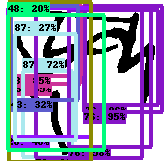

0.959368 [0.06549844 0.50718147 0.65216255 0.9494346 ] 1
0.94646335 [0.04034298 0.4996603  0.69489074 0.97013795] TUKI3
0
0.85127336 [0.02940913 0.0585172  0.5159531  0.47985297] 1
0.8497984 [0.0357012  0.04836895 0.46779516 0.48597023] TUKI3
0
0.71683735 [0.4431164  0.13610312 0.96934927 0.43566236] TUKI3
1
0.65758586 [0.05462101 0.21251133 0.97629136 0.8547741 ] TUKI3
0
0.58392465 [0.06229717 0.40843734 0.9125926  0.9092723 ] TUKI3
0
0.46116206 [0.05316177 0.0427823  0.8486247  0.5496923 ] TUKI3
TUKI3
0
0.3159925 [0.04164177 0.06326383 0.617986   0.470999  ] TUKI3
0
0.26883972 [0.21722668 0.0844826  0.8656332  0.46010864] TUKI3
0
0.22241159 [0.01572083 0.05262157 1.         0.54763764] TUKI3
TUKI3
0
0.2025877 [0.09401523 0.04405808 0.93021804 0.62339383] TUKI3
TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[10.545249074697495, 84.69930475950241, 104.99817085266113, 158.5555745959282, 76], [4.734869197010994, 9.7723728567

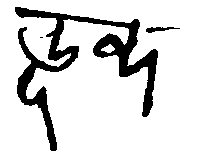

/content/gdrive/MyDrive/customTF2/data/Test/22233.bmp
Loading model...Done! Took 49.383392095565796 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22233.bmp... 5
8
hoye ja
[76. 23. 18. 28. 76.]
hoye ja
[76. 87. 23. 34. 18. 43. 64. 87.]
Done
13


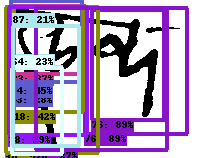

0.8896988 [0.06950176 0.4414219  0.75381714 0.7945535 ] 1
0.8896392 [0.05617424 0.40707523 0.846186   0.90715927] TUKI3
0
0.8721379 [0.04064899 0.05486666 0.46205565 0.41258   ] 1
0.6964521 [0.42945558 0.06026234 0.97445756 0.30314523] TUKI3
1
0.45114607 [0.00562301 0.05228229 0.5135286  0.39971578] TUKI3
0
0.4469139 [0.00799432 0.0514465  0.5180309  0.39903808] TUKI3
0
0.41554004 [0.04743767 0.06290963 0.7079753  0.4023883 ] TUKI3
0
0.36358 [0.0447596  0.02566831 0.96802944 0.47501257] TUKI3
TUKI3
0
0.29089892 [0.05059944 0.03972186 0.84943837 0.42295116] TUKI3
0
0.2805901 [0.00799432 0.0514465  0.5180309  0.39903808] TUKI3
0
0.26711595 [0.05662407 0.1714719  0.9489482  0.8104928 ] TUKI3
0
0.23250589 [0.43150875 0.05484866 0.9703281  0.3008129 ] TUKI3
TUKI3
0
0.20900333 [0.16656977 0.06083228 0.92201596 0.3851937 ] TUKI3
0
['ড', 'ূ', 'ন্দ']
['ড', 'ূ', 'ন্দ']
ডূন্দA-----------------------------------------------------------
[[10.981277704238892, 91.37433251738548, 119.1031082868576, 16

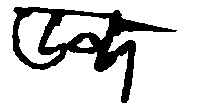

/content/gdrive/MyDrive/customTF2/data/Test/22234.bmp
Loading model...Done! Took 49.2380313873291 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22234.bmp... 2
3
hoye ja
[76. 58.]
hoye ja
[23. 76. 85.]
Done
5


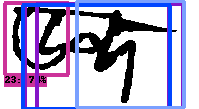

0.7352793 [0.02955472 0.02435686 0.6863902  0.34609985] 1
0.6404209 [0.04527998 0.18361573 1.         0.9242734 ] TUKI3
1
0.63930494 [0.04994524 0.12307256 0.9954715  0.85195935] TUKI3
0
0.27242205 [0.05172053 0.11523515 0.9922401  0.8567815 ] TUKI3
0
0.20076238 [0.0147333  0.38564548 0.98279274 0.9262786 ] TUKI3
0
['ড', 'ন্দ']
['ড', 'ন্দ']
ডন্দA-----------------------------------------------------------
[[3.221464991569519, 4.847014531493187, 74.81653410196304, 68.87387084960938, 23], [4.935517381876707, 36.539530113339424, 109.0, 183.93040096759796, 76]]
[[7, 3, 70, 76, 23], [66, 7, 149, 109, 76]]
actual class 23
actual class 76
EKHANE
TP CHANGE index =  23  TP DIFFERENCE =  [-1]
TP CHANGE index =  76  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ড  COLUMN =  ড  DIFFERENCE =  1
confusion_matrix_row =  ন্দ  COLUMN =  ন্দ  DIFFERENCE =  1
TP =  [0, 49, 43, 42, 55, 48, 30, 49, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46,

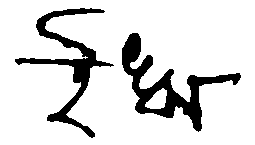

/content/gdrive/MyDrive/customTF2/data/Test/22235.bmp
Loading model...Done! Took 51.90333342552185 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22235.bmp... 7
3
hoye ja
[ 6.  2.  6. 88. 49. 25.  6.]
hoye ja
[ 6.  2. 12.]
Done
10


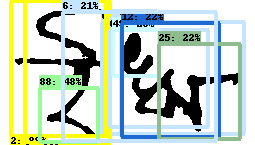

0.95872307 [0.1534813  0.47256184 0.9326659  0.8623626 ] 1
0.93363607 [0.15384069 0.39975986 0.9212124  0.95858675] TUKI3
0
0.8862363 [0.01114161 0.04168978 0.9348208  0.41767773] 1
0.87705815 [0.01035088 0.09549192 0.981964   0.43295607] TUKI3
0
0.75852865 [0.21233834 0.43115285 0.8756142  0.81638443] TUKI3
0
0.47662997 [0.6096896  0.15460226 0.97780603 0.38484824] TUKI3
0
0.28028616 [0.20889163 0.442033   0.52070576 0.62467885] TUKI3
0
0.22088192 [0.1595771  0.47474903 0.9437283  0.860504  ] TUKI3
0
0.21728599 [0.30499956 0.62017846 0.95249456 0.9421873 ] TUKI3
0
0.20830266 [0.08945802 0.24571459 0.9658431  0.8479024 ] TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[22.254789173603058, 120.50326824188232, 135.23655325174332, 219.90246891975403, 6], [1.6155340382829309, 10.630894750356674, 135.5490118265152, 106.50782123208046, 2]]
[[21, 3, 125, 139, 2], [110, 20, 218, 137, 6]]
actual class 2
actual class 6
TP CHANGE index =  2  TP DIFFER

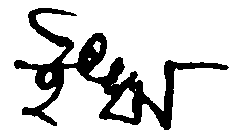

/content/gdrive/MyDrive/customTF2/data/Test/22236.bmp
Loading model...Done! Took 50.336503744125366 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22236.bmp... 6
2
hoye ja
[ 6.  2.  6.  6. 58.  3.]
hoye ja
[6. 2.]
Done
8


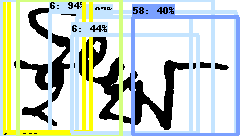

0.974757 [0.1274237 0.3147509 0.9719117 0.7908715] 1
0.94089675 [0.09507941 0.20638931 1.         0.97912204] TUKI3
0
0.87833244 [0.         0.01616312 0.9670373  0.37658954] TUKI3
1
0.7799592 [0.00274953 0.03620362 0.995415   0.34787494] TUKI3
TUKI3
0
0.6796491 [0.         0.         1.         0.88178706] TUKI3
0
0.43861106 [0.2607774  0.29652148 0.9715349  0.8186006 ] TUKI3
0
0.39529458 [0.12583111 0.5464704  0.98862004 0.9851274 ] TUKI3
0
0.24401192 [5.4764590e-04 7.0767812e-02 1.0000000e+00 5.0060904e-01] TUKI3
TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[17.329623699188232, 76.16972017288208, 132.17999505996704, 191.3909032344818, 6], [0.0, 3.9114755019545555, 131.51707553863525, 91.13466787338257, 2]]
[[7, 2, 78, 123, 2], [74, 20, 193, 132, 6]]
actual class 2
actual class 6
TP CHANGE index =  2  TP DIFFERENCE =  [-1]
TP CHANGE index =  6  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ই  COLUMN =  ই  DIFFERENCE =  1
confusion_matr

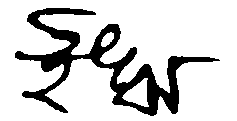

/content/gdrive/MyDrive/customTF2/data/Test/22237.bmp
Loading model...Done! Took 52.20753479003906 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22237.bmp... 9
4
hoye ja
[ 6.  2.  6. 72. 71. 73. 12. 49. 72.]
hoye ja
[ 6.  2. 72. 12.]
Done
13


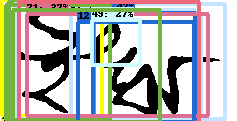

0.9456447 [0.08373371 0.39317918 1.         0.8243209 ] 1
0.8769557 [0.12058436 0.2979412  0.97734976 0.84874415] TUKI3
0
0.81624043 [0.03123415 0.03131795 0.9793054  0.39399457] TUKI3
1
0.5753412 [0.         0.00803173 0.9568523  0.43053395] TUKI3
TUKI3
0
0.49407867 [0.01578259 0.03565241 0.99596095 0.39841825] TUKI3
TUKI3
0
0.4737992 [0.03946389 0.06164427 0.9811951  0.95303726] TUKI3
0
0.41774854 [0.11196157 0.39197963 1.         0.8256151 ] TUKI3
0
0.39166078 [0.04323167 0.02283422 0.9877718  0.46656364] TUKI3
TUKI3
0
0.37348402 [0.12384521 0.11378031 0.9548431  0.8783231 ] TUKI3
0
0.3230094 [0.02252762 0.07633319 1.         0.8436399 ] TUKI3
0
0.3070098 [0.18314159 0.3254103  1.         0.82066065] TUKI3
0
0.27053788 [0.16589798 0.38605675 0.53501254 0.5927382 ] TUKI3
0
0.20671526 [0.08485715 0.05392479 1.         0.67691916] TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[10.131778627634048, 93.18346524238586, 121.0, 195.364056229591

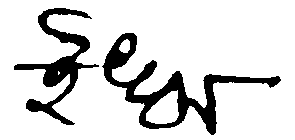

/content/gdrive/MyDrive/customTF2/data/Test/22238.bmp
Loading model...Done! Took 48.24871563911438 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22238.bmp... 5
4
hoye ja
[ 2. 71.  6. 58. 12.]
hoye ja
[ 6.  2. 12.  3.]
Done
9


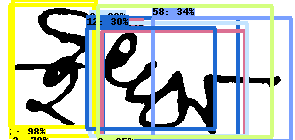

0.9832722 [0.04234258 0.0316578  0.9034307  0.31957325] 1
0.9643374 [0.13346711 0.3471201  0.99993515 0.8096377 ] 1
0.7787034 [0.006587   0.0438078  0.97000515 0.32874513] TUKI3
0
0.6262671 [0.22610544 0.3433371  0.96482754 0.8317034 ] TUKI3
0
0.62419516 [0.17013475 0.30211183 0.96805054 0.83977526] TUKI3
TUKI3
0
0.5800059 [0.13346711 0.3471201  0.99993515 0.8096377 ] TUKI3
0
0.34474456 [0.13534744 0.51841336 1.         0.9887732 ] TUKI3
0
0.30244914 [0.20269628 0.29203582 0.9184063  0.7306126 ] TUKI3
TUKI3
0
0.2503051 [0.04781824 0.3312755  0.9764667  0.9248134 ] TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[5.927961841225624, 9.33904992416501, 126.48029804229736, 94.2741097509861, 2], [18.685395121574402, 102.40043133497238, 139.9909210205078, 238.84312897920609, 6]]
[[8, 2, 101, 137, 2], [100, 15, 248, 137, 6]]
actual class 2
actual class 6
EKHANE
TP CHANGE index =  2  TP DIFFERENCE =  [-1]
TP CHANGE index =  6  TP DIFFERENCE =  [-1]


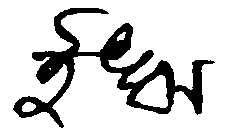

/content/gdrive/MyDrive/customTF2/data/Test/22239.bmp
Loading model...Done! Took 48.05879807472229 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22239.bmp... 6
3
hoye ja
[ 2.  6. 49. 12. 29. 72.]
hoye ja
[6. 2. 2.]
Done
9


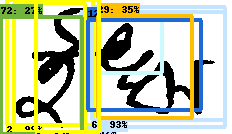

0.97840136 [0.         0.02931453 0.9271029  0.40103954] 1
0.96785575 [0.09014338 0.34536415 0.94285345 0.9730352 ] TUKI3
1
0.92871374 [0.05492055 0.39434478 0.89382076 0.97009003] TUKI3
TUKI3
0
0.8429996 [0.02846482 0.05678743 0.97872114 0.36665666] TUKI3
0
0.7043386 [0.14271158 0.4200032  0.5388044  0.70058167] TUKI3
0
0.4029918 [0.15473153 0.37819582 0.81969863 0.86761993] TUKI3
TUKI3
0
0.34518874 [0.12182684 0.4189173  0.87993604 0.83135074] TUKI3
0
0.2671746 [0.12855609 0.         0.99301124 0.3560247 ] TUKI3
0
0.24055575 [0.        0.1528743 0.980322  0.4308045] TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[0.0, 6.800970330834389, 124.23179173469543, 93.04117345809937, 2], [12.079212263226509, 80.12448358535767, 126.34236240386963, 225.7441701889038, 6]]
[[4, 4, 114, 129, 2], [98, 19, 217, 129, 6]]
actual class 2
actual class 6
EKHANE
TP CHANGE index =  2  TP DIFFERENCE =  [-1]
TP CHANGE index =  6  TP DIFFERENCE =  [-1]
confusion_

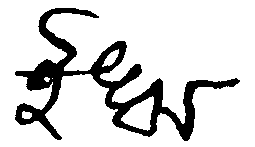

/content/gdrive/MyDrive/customTF2/data/Test/22240.bmp
Loading model...Done! Took 52.21952414512634 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22240.bmp... 8
2
hoye ja
[ 2.  6.  6. 49. 12.  2. 64. 71.]
hoye ja
[6. 2.]
Done
10


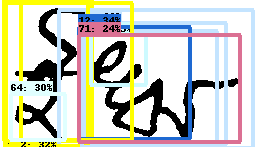

0.9718411 [0.         0.01565706 0.9574496  0.36310542] 1
0.96240735 [0.15895537 0.33435604 0.9847033  0.8889507 ] TUKI3
1
0.9257951 [0.07063671 0.22966176 1.         0.9951809 ] TUKI3
TUKI3
0
0.8205067 [0.02378824 0.02352101 0.9886378  0.34719446] TUKI3
0
0.79932904 [0.21601996 0.31935173 0.99625915 0.85225445] TUKI3
TUKI3
0
0.34633553 [0.24384014 0.35436583 0.5742311  0.5757816 ] TUKI3
TUKI3
0
0.33624431 [0.18482506 0.30633736 0.9406128  0.7453229 ] TUKI3
TUKI3
0
0.3159625 [0.0233173  0.08197369 0.94850826 0.5203542 ] TUKI3
0
0.30019394 [0.64330405 0.04294978 0.95088816 0.25840175] TUKI3
0
0.23881991 [0.23877446 0.30636328 0.9625756  0.9437204 ] TUKI3
TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[0.0, 3.9925512112677097, 140.74509340524673, 92.59188115596771, 2], [23.36643871665001, 85.26079013943672, 144.75138545036316, 226.68242990970612, 6]]
[[6, 2, 102, 142, 2], [90, 27, 220, 147, 6]]
actual class 2
actual class 6
EKHANE
TP CHANGE 

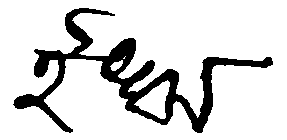

/content/gdrive/MyDrive/customTF2/data/Test/22241.bmp
Loading model...Done! Took 50.98615264892578 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22241.bmp... 7
3
hoye ja
[ 2.  6.  2. 58. 49. 42. 71.]
hoye ja
[ 6.  2. 10.]
Done
10


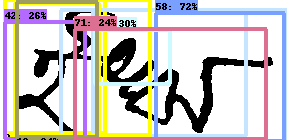

0.9720775 [0.         0.01561571 0.94825006 0.36662975] 1
0.96306473 [0.07300574 0.32277325 0.97028965 0.858464  ] TUKI3
1
0.906942 [0.07458726 0.21003763 1.         1.        ] TUKI3
TUKI3
0
0.80153525 [0.02377272 0.05104592 0.98102105 0.3464274 ] TUKI3
0
0.7948309 [0.         0.0559813  0.9628771  0.52555656] TUKI3
0
0.7193292 [0.09496732 0.5404563  1.         0.9918404 ] TUKI3
0
0.30138478 [0.21898982 0.32957932 0.5950575  0.5943522 ] TUKI3
TUKI3
0
0.26264185 [0.15839566 0.01406092 0.9908953  0.2991301 ] TUKI3
0
0.24241863 [0.01973593 0.05680516 0.97587866 0.34082064] TUKI3
0
0.24112774 [0.21010466 0.2589383  0.98742265 0.92894363] TUKI3
TUKI3
0
['ই', 'ঋ']
['ই', 'ঋ']
ইঋA-----------------------------------------------------------
[[0.0, 4.481707450002432, 132.75500774383545, 105.2227381169796, 2], [10.220803022384644, 92.6359221637249, 135.84055066108704, 246.3791687488556, 6]]
[[8, 9, 114, 140, 2], [96, 24, 239, 137, 6]]
actual class 2
actual class 6
EKHANE
TP CHANGE index =  2  TP 

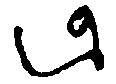

/content/gdrive/MyDrive/customTF2/data/Test/22242.bmp
Loading model...Done! Took 50.036880016326904 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22242.bmp... 4
2
hoye ja
[66.  7. 53. 56.]
hoye ja
[ 7. 53.]
Done
6


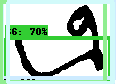

0.873536 [0.01392475 0.0673283  0.99686325 0.97648525] 1
0.7014858 [0.46087387 0.04864643 0.9374989  0.95654243] TUKI3
0
0.68054163 [0.02478798 0.016517   0.92720205 1.        ] TUKI3
0
0.6132209 [0.00411282 0.01132785 0.98935956 0.9701391 ] TUKI3
0
0.3191571 [0.03392273 0.         0.97605544 0.90962577] TUKI3
0
0.23102953 [0.02652553 0.06117296 0.9838126  0.9749198 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[1.169678807258606, 7.810083270072937, 83.73651266098022, 113.27228927612305, 7]]
[[7, 2, 110, 83, 7]]
actual class 7
TP CHANGE index =  7  TP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 50, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0, 

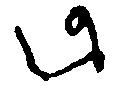

/content/gdrive/MyDrive/customTF2/data/Test/22243.bmp
Loading model...Done! Took 48.66952395439148 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22243.bmp... 4
2
hoye ja
[53. 66.  7. 56.]
hoye ja
[ 7. 53.]
Done
6


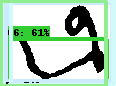

0.8483493 [0.01805472 0.0818435  0.984648   0.9821296 ] 1
0.7891921 [0.         0.02489335 0.97894377 0.98406863] TUKI3
0
0.6127748 [0.45708105 0.06411251 0.9365281  0.9308472 ] TUKI3
0
0.51360875 [0.04293396 0.04868481 0.9387672  0.96735996] TUKI3
0
0.39634812 [0.02090052 0.09178704 0.9828391  0.97529846] TUKI3
0
0.33517566 [0.01602318 0.         0.9911428  0.91503286] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[1.552706241607666, 9.493845462799072, 84.67972707748413, 113.92703056335449, 7]]
[[12, 4, 110, 80, 7]]
actual class 7
TP CHANGE index =  7  TP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 51, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 

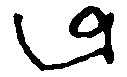

/content/gdrive/MyDrive/customTF2/data/Test/22244.bmp
Loading model...Done! Took 47.313772439956665 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22244.bmp... 5
3
hoye ja
[66. 53. 56.  7. 70.]
hoye ja
[ 7. 53. 59.]
Done
8


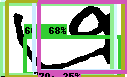

0.8733489 [0.0191083  0.05054295 0.99521494 0.9691726 ] 1
0.67858964 [0.49265617 0.19372256 0.95017856 0.9487005 ] TUKI3
0
0.670462 [0.00549    0.01617469 0.9726268  0.9077237 ] TUKI3
0
0.5060342 [0.05265778 0.         0.97132957 0.8865777 ] TUKI3
0
0.5029756 [0.         0.26386264 0.9202614  1.        ] TUKI3
0
0.33530393 [0.02306658 0.04966971 0.99914795 0.9726083 ] TUKI3
0
0.25015628 [0.02936146 0.3041065  0.9244697  1.        ] TUKI3
0
0.20076388 [0.02306658 0.04966971 0.99914795 0.9726083 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[1.4713387489318848, 6.4189547300338745, 76.63155031204224, 123.0849198102951, 7]]
[[12, 3, 118, 72, 7]]
actual class 7
TP CHANGE index =  7  TP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44,

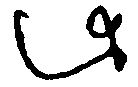

/content/gdrive/MyDrive/customTF2/data/Test/22245.bmp
Loading model...Done! Took 50.53190469741821 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22245.bmp... 3
5
hoye ja
[53. 56. 56.]
hoye ja
[20.  7.  1.  9. 53.]
Done
8


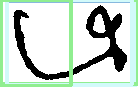

0.6244148 [0.01230755 0.0495283  0.9898946  0.9768656 ] 1
0.48951882 [0.01230755 0.0495283  0.9898946  0.9768656 ] TUKI3
0
0.43692887 [0.         0.         0.97653824 0.9865228 ] TUKI3
0
0.4365419 [0.00577404 0.         0.9642074  1.        ] TUKI3
0
0.3767967 [0.01230755 0.0495283  0.9898946  0.9768656 ] TUKI3
0
0.32230723 [0.01230755 0.0495283  0.9898946  0.9768656 ] TUKI3
0
0.22592169 [0.01139027 0.05023947 0.97310865 0.9633018 ] TUKI3
0
0.203947 [0.00488644 0.         0.9870994  0.5207753 ] TUKI3
0
['ঞ']
['ঞ']
ঞA-----------------------------------------------------------
[[1.0707572400569916, 6.834905505180359, 86.12083268165588, 134.80745136737823, 20]]
[[11, 4, 132, 81, 7]]
actual class 7
FP CHANGE index =  20  FP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  ঞ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 33, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 4

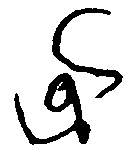

/content/gdrive/MyDrive/customTF2/data/Test/22246.bmp
Loading model...Done! Took 49.28205728530884 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22246.bmp... 2
1
hoye ja
[53. 52.]
hoye ja
[8.]
Done
3


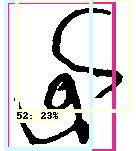

0.89587444 [0.01519904 0.05034465 0.99664426 0.84123355] 1
0.2864545 [0.00703389 0.04228441 0.9861287  0.6707495 ] TUKI3
0
0.22907946 [0.         0.12324936 0.7335993  0.9566453 ] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[2.2950543463230133, 6.846871852874756, 150.49328303337097, 114.40776300430298, 8]]
[[8, 5, 129, 147, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 34, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0, 33, 50, 50, 50, 21, 0, 47, 36, 22, 0, 17, 36]
FP =  [0, 1, 7, 0, 7, 2, 1, 28, 1, 16, 2, 2, 18, 8, 0, 10, 5, 6, 15, 0, 2, 30, 4, 14, 2, 12, 15, 1, 15, 5, 3, 5, 0, 6, 4, 21, 3, 7, 2, 3, 4, 3

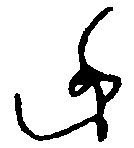

/content/gdrive/MyDrive/customTF2/data/Test/22247.bmp
Loading model...Done! Took 50.387587547302246 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22247.bmp... 5
2
hoye ja
[66.  8. 52.  7. 53.]
hoye ja
[ 8. 20.]
Done
7


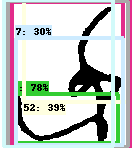

0.84379303 [0.00105619 0.05302507 0.9970188  0.9716323 ] 1
0.78260964 [0.64030063 0.04608478 0.96025    0.8841087 ] TUKI3
0
0.63323826 [0.01372217 0.08238541 1.         0.9223312 ] TUKI3
0
0.39119926 [0.01026202 0.1772222  0.6888545  0.9621608 ] TUKI3
0
0.31147182 [0.00706178 0.05808893 0.9868797  0.9564719 ] TUKI3
0
0.302056 [0.25737545 0.11240707 0.9796893  0.9246984 ] TUKI3
0
0.2974363 [0.         0.02293541 0.9870303  0.85042334] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[0.15631675720214844, 7.105358958244324, 147.55878448486328, 130.19872844219208, 8]]
[[11, 4, 125, 148, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 35, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51

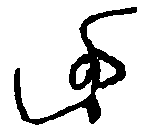

/content/gdrive/MyDrive/customTF2/data/Test/22248.bmp
Loading model...Done! Took 50.721996784210205 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22248.bmp... 4
5
hoye ja
[66. 56.  3.  7.]
hoye ja
[20.  3.  8.  7.  2.]
Done
9


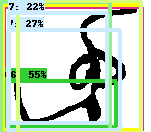

0.88995063 [0.05374569 0.02158144 0.985344   0.9461858 ] 1
0.546312 [0.6183226  0.02809428 0.95589095 0.77371436] TUKI3
0
0.38092762 [0.04225847 0.01811913 0.98114526 0.9396844 ] TUKI3
0
0.3725296 [0.05374569 0.02158144 0.985344   0.9461858 ] TUKI3
0
0.33655995 [0.0215348 0.        1.        0.731682 ] TUKI3
0
0.27055478 [0.22982982 0.04652527 0.9803904  0.80068684] TUKI3
0
0.24705863 [0.01084702 0.11715475 1.         0.93699944] TUKI3
0
0.21668212 [0.10160843 0.05898324 0.92807096 0.7107212 ] TUKI3
0
0.21283169 [0.04225847 0.01811913 0.98114526 0.9396844 ] TUKI3
0
['ঞ']
['ঞ']
ঞA-----------------------------------------------------------
[[7.094430685043335, 3.2587976157665253, 130.06540703773499, 142.8740599155426, 20]]
[[10, 3, 141, 128, 8]]
actual class 8
FP CHANGE index =  20  FP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঞ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 35, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 4

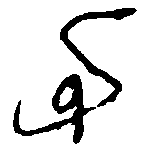

/content/gdrive/MyDrive/customTF2/data/Test/22249.bmp
Loading model...Done! Took 46.520166635513306 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22249.bmp... 4
2
hoye ja
[59.  8. 52.  7.]
hoye ja
[ 8. 20.]
Done
6


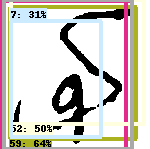

0.82750684 [0.01312825 0.01758906 0.99396646 0.8859867 ] 1
0.63807774 [0.05213783 0.06486536 0.9315246  0.9121652 ] TUKI3
0
0.54080486 [0.00302773 0.         1.         0.8410168 ] TUKI3
0
0.5041394 [0.         0.07105379 0.8271678  0.9629093 ] TUKI3
0
0.3051723 [0.14762928 0.07044477 0.9151126  0.6782051 ] TUKI3
0
0.29548547 [0.00544262 0.0250029  0.9947045  0.88288134] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[1.9561093747615814, 2.6383593678474426, 148.10100257396698, 132.8980028629303, 8]]
[[10, 4, 144, 145, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 36, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 

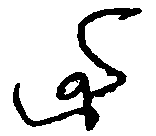

/content/gdrive/MyDrive/customTF2/data/Test/22250.bmp
Loading model...Done! Took 47.60063123703003 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22250.bmp... 6
1
hoye ja
[59.  7.  8. 52.  3. 52.]
hoye ja
[8.]
Done
7


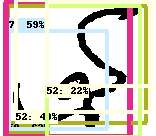

0.9066147 [0.01529279 0.03115669 0.9944676  0.8411242 ] 1
0.63451385 [0.04533829 0.04720554 0.8980642  0.9389695 ] TUKI3
0
0.5943123 [0.22861968 0.05538275 0.9419474  0.6922362 ] TUKI3
0
0.510356 [0.00917034 0.04328549 0.99853724 0.829913  ] TUKI3
0
0.40151107 [0.00569386 0.09927554 0.8224829  0.9629466 ] TUKI3
0
0.2153742 [0.05061661 0.29906204 1.         0.898763  ] TUKI3
0
0.21521805 [0.01827204 0.29847494 0.62733227 0.96827555] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[2.079819917678833, 4.860443472862244, 135.24759578704834, 131.21537160873413, 8]]
[[11, 4, 145, 132, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 52, 37, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76

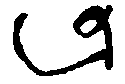

/content/gdrive/MyDrive/customTF2/data/Test/22251.bmp
Loading model...Done! Took 49.719078063964844 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22251.bmp... 7
1
hoye ja
[56. 53. 66.  7.  7. 70. 56.]
hoye ja
[7.]
Done
8


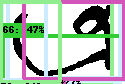

0.8772147 [0.0189597  0.05670381 0.9935096  0.96304727] 1
0.62145424 [0.02041985 0.         0.9796356  0.90111196] TUKI3
0
0.590815 [0.         0.00835961 0.95559996 0.9752542 ] TUKI3
0
0.46754012 [0.4336554  0.02057167 0.94846314 0.9703749 ] TUKI3
0
0.40553555 [0.         0.0022899  0.94131804 0.9985928 ] TUKI3
0
0.27085736 [0.00890018 0.36242282 0.9178007  0.97436666] TUKI3
0
0.2368184 [0.02646385 0.19085138 0.93713063 0.9929147 ] TUKI3
0
0.2122939 [0.03374302 0.00413918 0.9725912  0.48085096] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[1.5926148891448975, 7.087975740432739, 83.45480561256409, 120.38090825080872, 7]]
[[10, 3, 122, 79, 7]]
actual class 7
TP CHANGE index =  7  TP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 53, 37, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44,

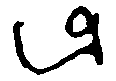

/content/gdrive/MyDrive/customTF2/data/Test/22252.bmp
Loading model...Done! Took 50.212311029434204 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22252.bmp... 4
1
hoye ja
[53.  7. 56. 66.]
hoye ja
[7.]
Done
5


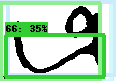

0.88763887 [0.02055266 0.06829929 0.99544835 0.97357273] 1
0.55969054 [0.00127861 0.00803076 0.9897791  0.96338093] TUKI3
0
0.4653155 [0.03356258 0.         0.9195158  1.        ] TUKI3
0
0.4437628 [0.04220741 0.         0.99007374 0.8672538 ] TUKI3
0
0.34982306 [0.4422396  0.05115005 0.9411706  0.9049696 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[1.664765864610672, 7.922718048095703, 80.63131642341614, 112.9344367980957, 7]]
[[9, 3, 110, 76, 7]]
actual class 7
TP CHANGE index =  7  TP DIFFERENCE =  [-1]
confusion_matrix_row =  এ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 37, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0, 33, 50, 50, 50, 21, 0, 47, 36, 22, 0, 17, 36]
FP =  [0, 1, 7, 0

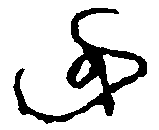

/content/gdrive/MyDrive/customTF2/data/Test/22253.bmp
Loading model...Done! Took 49.29674172401428 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22253.bmp... 6
2
hoye ja
[53. 66. 56.  3. 20.  8.]
hoye ja
[20.  8.]
Done
8


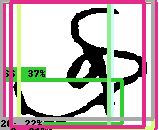

0.7981896 [0.02280456 0.02395275 0.9861335  0.97657466] 1
0.6316614 [0.         0.02220194 0.9970617  0.70993286] TUKI3
0
0.37308863 [0.6202095  0.02119986 0.9469587  0.7685501 ] TUKI3
0
0.28852612 [0.01591378 0.0209972  0.9889806  0.98695135] TUKI3
0
0.2810533 [0.01293838 0.         1.         0.6873823 ] TUKI3
0
0.2681383 [0.00829559 0.11845588 0.98369145 0.96450573] TUKI3
0
0.2165411 [0.         0.         0.9111835  0.96443456] TUKI3
0
0.2100977 [0.02225387 0.06371199 0.9730322  0.91078633] TUKI3
0
['ঞ']
['ঞ']
ঞA-----------------------------------------------------------
[[2.9645925760269165, 3.8084876239299774, 128.19735705852509, 155.27537083625793, 20]]
[[10, 5, 149, 130, 8]]
actual class 8
FP CHANGE index =  20  FP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঞ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 37, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50,

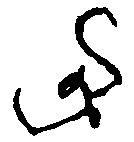

/content/gdrive/MyDrive/customTF2/data/Test/22254.bmp
Loading model...Done! Took 46.15688180923462 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22254.bmp... 4
2
hoye ja
[53.  8.  3. 10.]
hoye ja
[ 8. 20.]
Done
6


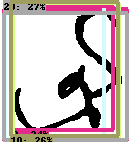

0.89469784 [0.06989911 0.02851182 0.9862335  0.95413077] 1
0.80023897 [0.         0.03522999 0.9736581  0.77759826] TUKI3
0
0.34089932 [0.04859374 0.09533706 0.91246134 0.84800434] TUKI3
0
0.32401624 [0.02687299 0.0929636  1.         0.8940547 ] TUKI3
0
0.2725151 [0.09277785 0.02687749 0.9855238  0.95408   ] TUKI3
0
0.26247662 [0.02079406 0.077765   0.9561282  0.8814566 ] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[9.92567390203476, 3.8205841779708862, 140.04515314102173, 127.85352301597595, 8]]
[[10, 4, 131, 142, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 38, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 

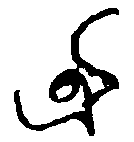

/content/gdrive/MyDrive/customTF2/data/Test/22255.bmp
Loading model...Done! Took 51.461798667907715 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22255.bmp... 4
3
hoye ja
[ 8. 53.  7. 66.]
hoye ja
[ 8. 20.  3.]
Done
7


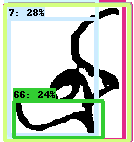

0.6730954 [0.03205809 0.03573042 0.99131453 0.98068875] 1
0.6565943 [0.         0.06345459 0.9839921  0.92809325] TUKI3
0
0.59387195 [0.03329831 0.03735554 0.990989   0.97217786] TUKI3
0
0.33923623 [0.         0.04078365 0.97049385 0.725921  ] TUKI3
0
0.27548495 [0.1385127  0.06191845 0.9497367  0.7205699 ] TUKI3
0
0.24285904 [0.71143055 0.10388851 0.965008   0.7734833 ] TUKI3
0
0.21110155 [0.03620431 0.03564239 0.9859805  0.9644979 ] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[4.552248775959015, 4.787876486778259, 140.766663312912, 131.41229259967804, 8]]
[[12, 4, 130, 142, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 39, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 7

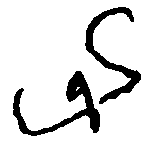

/content/gdrive/MyDrive/customTF2/data/Test/22256.bmp
Loading model...Done! Took 49.16723585128784 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22256.bmp... 6
2
hoye ja
[ 7.  8.  7. 66. 89. 46.]
hoye ja
[8. 7.]
Done
8


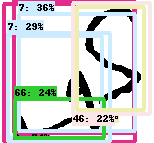

0.94574213 [0.2576029  0.0490192  0.96190304 0.66872054] 1
0.9455766 [0.03113705 0.02365759 0.9876881  0.8822501 ] TUKI3
0
0.7364221 [0.         0.08614729 0.92892843 0.87506306] TUKI3
0
0.3551545 [0.09897216 0.12038154 0.9131689  0.88013697] TUKI3
0
0.28572226 [0.23163274 0.0476732  0.99292624 0.7175094 ] TUKI3
0
0.24483037 [0.69637376 0.09269887 0.96138763 0.6777382 ] TUKI3
0
0.23430473 [0.05257522 0.49576455 0.7690571  0.9403078 ] TUKI3
1
0.21888527 [0.02605404 0.4688984  0.7960747  0.9760333 ] TUKI3
TUKI3
0
['এ', 'ৈ']
['এ', 'ৈ']
এৈA-----------------------------------------------------------
[[36.83721473813057, 7.548956051468849, 137.55213409662247, 102.98296368122101, 7], [7.518256910145283, 76.34774124622345, 109.97516459226608, 144.8074005842209, 89]]
[[6, 5, 145, 139, 8]]
actual class 8
FP CHANGE index =  7  FP DIFFERENCE =  [-1]
FP CHANGE index =  89  FP DIFFERENCE =  [-1]
confusion_matrix_row =  blank  COLUMN =  ৈ  DIFFERENCE =  1
confusion_matrix_row =  ঐ  COLUMN =  এ  DIFFE

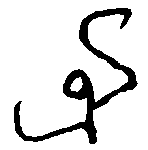

/content/gdrive/MyDrive/customTF2/data/Test/22257.bmp
Loading model...Done! Took 50.289233446121216 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22257.bmp... 6
2
hoye ja
[ 7.  8. 66. 59. 52. 20.]
hoye ja
[8. 2.]
Done
8


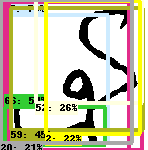

0.8990616 [0.00380477 0.02936897 0.9942429  0.96579814] 1
0.7754043 [0.10493527 0.0619638  0.9482203  0.73408836] TUKI3
0
0.6813703 [0.0159377  0.05913521 1.         0.8719224 ] TUKI3
0
0.5418576 [0.71718657 0.03000503 0.96487325 0.7133918 ] TUKI3
0
0.44780502 [0.05580705 0.0723568  0.8606192  0.9693536 ] TUKI3
0
0.2642167 [0.00333119 0.23973194 0.6836843  0.9639067 ] TUKI3
0
0.21912995 [0.01320723 0.30579993 0.88702273 0.9475236 ] TUKI3
0
0.21162167 [0.0018507  0.00425587 0.95100653 0.89418745] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[0.5707159638404846, 4.346607089042664, 149.13643598556519, 142.93812465667725, 8]]
[[9, 8, 144, 146, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 40, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44

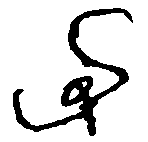

/content/gdrive/MyDrive/customTF2/data/Test/22258.bmp
Loading model...Done! Took 50.24481678009033 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22258.bmp... 4
1
hoye ja
[ 8.  7. 66.  3.]
hoye ja
[8.]
Done
5


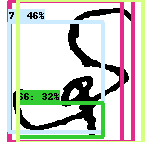

0.9254683 [0.00339606 0.06422493 0.9974445  0.9008676 ] 1
0.51969165 [0.00728985 0.05948535 1.         0.82837206] TUKI3
0
0.45743158 [0.15632224 0.05666602 0.9259675  0.70068157] TUKI3
0
0.31621295 [0.7295775  0.11670081 0.960469   0.7009563 ] TUKI3
0
0.2613638 [0.         0.12098479 1.         0.96665514] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[0.48224109411239624, 9.505289435386658, 141.6371204853058, 133.32840204238892, 8]]
[[9, 6, 136, 141, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 41, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0, 33, 50, 50, 50, 21, 0, 47, 36, 22, 0, 17, 36]
FP =  [0, 1, 

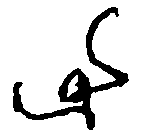

/content/gdrive/MyDrive/customTF2/data/Test/22259.bmp
Loading model...Done! Took 48.86917734146118 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22259.bmp... 4
4
hoye ja
[ 7.  8. 59. 20.]
hoye ja
[ 8.  7. 20.  2.]
Done
8


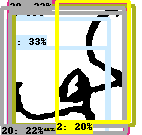

0.9236919 [0.06277487 0.05641493 0.98989105 0.90538406] 1
0.7970122 [0.14193965 0.05309002 0.92664397 0.76912653] TUKI3
0
0.5466631 [0.02198936 0.06046958 0.9890946  0.8868455 ] TUKI3
0
0.32536387 [0.362935   0.07175633 0.9854817  0.76014555] TUKI3
0
0.24184574 [0.04767265 0.09303754 0.9198423  0.94611174] TUKI3
0
0.22719637 [0.10257754 0.06437367 0.97998285 0.8907048 ] TUKI3
0
0.21775652 [0.06616031 0.01397121 0.9304077  0.8782532 ] TUKI3
0
0.20280603 [0.00901559 0.39949113 0.89956486 0.91412324] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[8.474607020616531, 8.010920345783234, 133.63529205322266, 128.56453704833984, 8]]
[[6, 1, 133, 131, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 42, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 4

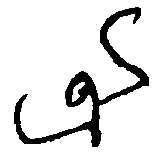

/content/gdrive/MyDrive/customTF2/data/Test/22260.bmp
Loading model...Done! Took 47.31263208389282 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22260.bmp... 5
3
hoye ja
[ 7.  8.  7. 66. 59.]
hoye ja
[8. 7. 7.]
Done
8


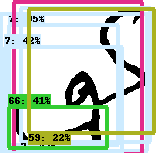

0.94966257 [0.16647919 0.05217217 0.9435922  0.72623265] 1
0.92123544 [0.09211451 0.00476444 0.9826327  0.90498513] TUKI3
0
0.51164263 [0.01555962 0.08014393 1.         0.87491393] TUKI3
0
0.43106705 [0.05465443 0.1271104  0.9235397  0.92601407] TUKI3
0
0.416085 [0.31217185 0.02571753 0.994341   0.7496494 ] TUKI3
0
0.4095296 [0.7025723  0.05481326 0.9648956  0.66007775] TUKI3
0
0.23260775 [0.09211451 0.00476444 0.9826327  0.90498513] TUKI3
0
0.22052811 [0.05923954 0.17766951 0.8653395  0.9498788 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[25.47131533920765, 8.504062954336405, 144.36960518360138, 118.37592160701752, 7]]
[[7, 5, 158, 151, 8]]
actual class 8
FP CHANGE index =  7  FP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 42, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 4

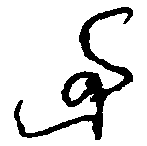

/content/gdrive/MyDrive/customTF2/data/Test/22261.bmp
Loading model...Done! Took 50.433130502700806 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22261.bmp... 5
1
hoye ja
[ 8. 66.  7.  8. 59.]
hoye ja
[8.]
Done
6


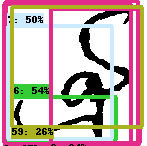

0.9492392 [0.01262608 0.03525212 0.9957515  0.94006515] 1
0.948522 [0.03232269 0.02577371 0.9791497  0.8948788 ] TUKI3
0
0.5384461 [0.67000973 0.04768476 0.95809203 0.7908873 ] TUKI3
0
0.50111973 [0.18390678 0.05109704 0.94699955 0.7656788 ] TUKI3
0
0.34038696 [0.06170791 0.34301755 0.974662   0.95633096] TUKI3
0
0.2609474 [0.05172943 0.07975676 0.8690914  0.9665318 ] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[1.843407928943634, 5.182062238454819, 145.37971901893616, 138.1895763874054, 8]]
[[13, 2, 143, 146, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 43, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0

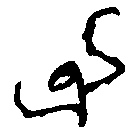

/content/gdrive/MyDrive/customTF2/data/Test/22262.bmp
Loading model...Done! Took 51.44645977020264 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22262.bmp... 4
2
hoye ja
[ 7. 20. 59.  8.]
hoye ja
[8. 7.]
Done
6


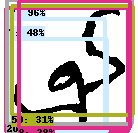

0.95519245 [0.14755428 0.06941462 0.9472185  0.7635599 ] 1
0.9430674 [0.06454852 0.04149148 0.98718107 0.92963445] TUKI3
0
0.48245206 [0.2956063  0.06155124 0.98505473 0.77719426] TUKI3
0
0.33276084 [0.         0.04637889 0.9265013  0.961159  ] TUKI3
0
0.31224236 [0.0492313  0.08482096 0.8576431  0.97009826] TUKI3
0
0.28400737 [0.01405212 0.13044162 0.95864433 0.9478065 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[19.62471902370453, 9.579217985272408, 125.9800575375557, 105.37126314640045, 7]]
[[8, 2, 129, 133, 8]]
actual class 8
FP CHANGE index =  7  FP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 43, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30

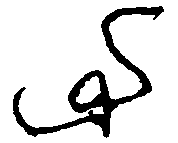

/content/gdrive/MyDrive/customTF2/data/Test/22263.bmp
Loading model...Done! Took 48.004719734191895 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22263.bmp... 9
3
hoye ja
[ 7.  8. 66. 59. 66. 59. 82. 52. 20.]
hoye ja
[ 8.  7. 20.]
Done
12


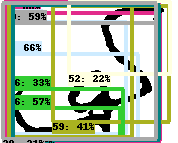

0.79802835 [0.09544703 0.02613834 0.98064125 0.9020163 ] 1
0.6569535 [0.38016993 0.03103018 0.9980144  0.7784657 ] TUKI3
0
0.6284057 [0.15599594 0.03500299 0.93503433 0.713014  ] TUKI3
0
0.59163153 [0.16429228 0.0277721  0.98529345 0.8855716 ] TUKI3
0
0.58366096 [0.01089184 0.02523307 1.         0.8982128 ] TUKI3
0
0.56945217 [0.7572535  0.04654801 0.9625044  0.67954075] TUKI3
0
0.41087106 [0.04366161 0.29403397 0.8499666  0.95068866] TUKI3
0
0.32554197 [0.628566   0.04669968 0.96454066 0.69117093] TUKI3
0
0.3051078 [0.03122292 0.05008765 0.9568817  0.74162287] TUKI3
0
0.24803755 [0.03985412 0.0681994  0.9749062  0.8959099 ] TUKI3
0
0.22145665 [0.01172686 0.38717136 0.5140539  0.95589167] TUKI3
0
0.21242686 [0.02530094 0.01658548 0.9670476  0.8778774 ] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[13.648925811052322, 4.65262371301651, 140.23169815540314, 160.5588982105255, 8]]
[[6, 3, 166, 141, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE

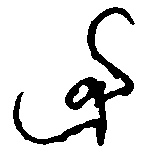

/content/gdrive/MyDrive/customTF2/data/Test/22264.bmp
Loading model...Done! Took 51.52608513832092 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22264.bmp... 3
2
hoye ja
[ 8.  7. 66.]
hoye ja
[8. 7.]
Done
5


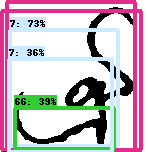

0.9554466 [0.0768227  0.01043698 0.9840278  0.95769703] 1
0.85258466 [0.01761243 0.0409409  0.9902676  0.9175738 ] TUKI3
0
0.7334065 [0.20350632 0.06121529 0.95412725 0.80386275] TUKI3
0
0.39188066 [0.7138008  0.09596229 0.97695917 0.77229714] TUKI3
0
0.35925668 [0.39257082 0.06063133 0.9962878  0.75858223] TUKI3
0
['ঐ']
['ঐ']
ঐA-----------------------------------------------------------
[[11.677050113677979, 1.5446733236312866, 149.57222604751587, 141.73916101455688, 8]]
[[9, 6, 144, 152, 8]]
actual class 8
TP CHANGE index =  8  TP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  ঐ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 45, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76, 73, 0, 52, 14, 48, 48, 27, 24, 46, 47, 47, 49, 44, 59, 36, 30, 0, 33, 50, 50, 50, 21, 0, 47, 36, 22, 0, 17, 36]
FP =  [0, 1,

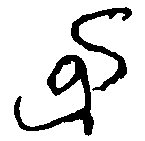

/content/gdrive/MyDrive/customTF2/data/Test/22265.bmp
Loading model...Done! Took 48.84903430938721 seconds
Running inference for /content/gdrive/MyDrive/customTF2/data/Test/22265.bmp... 4
3
hoye ja
[ 7.  8. 66. 59.]
hoye ja
[ 8.  7. 20.]
Done
7


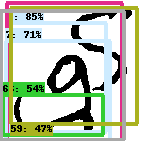

0.8473771 [0.16659191 0.05025151 0.9297519  0.73262995] 1
0.8231942 [0.07828805 0.0065878  0.9900466  0.8533643 ] TUKI3
0
0.7450777 [0.02467605 0.04398662 0.9935897  0.843568  ] TUKI3
0
0.7141979 [0.2928496  0.03918001 0.9876887  0.76453984] TUKI3
0
0.54359657 [0.67795134 0.02066207 0.9562869  0.7141327 ] TUKI3
0
0.47021905 [0.05969131 0.07169814 0.877051   0.94612104] TUKI3
0
0.349361 [0.07859197 0.00516939 0.99117196 0.8561237 ] TUKI3
0
['এ']
['এ']
এA-----------------------------------------------------------
[[23.489459663629532, 7.286469489336014, 131.0950140953064, 106.23134344816208, 7]]
[[10, 6, 139, 139, 8]]
actual class 8
FP CHANGE index =  7  FP DIFFERENCE =  [-1]
confusion_matrix_row =  ঐ  COLUMN =  এ  DIFFERENCE =  1
TP =  [0, 49, 50, 42, 55, 48, 37, 54, 45, 49, 3, 66, 53, 62, 53, 37, 64, 39, 41, 15, 34, 44, 50, 39, 38, 45, 59, 34, 50, 58, 78, 44, 51, 48, 30, 46, 46, 82, 62, 48, 48, 51, 48, 45, 47, 37, 50, 44, 49, 31, 42, 50, 54, 44, 48, 47, 38, 46, 50, 48, 120, 63, 51, 76,

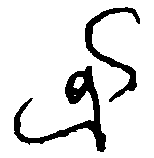

/content/gdrive/MyDrive/customTF2/data/Test/22266.bmp
Loading model...

In [ ]:
# len(TEST_IMAGE_PATHS)
# TP = [0]*93
# FP = [0]*93
# FN = [0]*93
# print(FP)

# TP_OLD = [0]*93
# FP_OLD = [0]*93
# FN_OLD = [0]*93
confusion_matrix = [[0 for i in range(93)] for j in range(93)]
confusion_matrix_OLD = [[0 for i in range(93)] for j in range(93)]



from google.colab.patches import cv2_imshow
# 1280
for k in range(0,len(TEST_IMAGE_PATHS)):
    print("K NUMBER = ",k)
    image_path = TEST_IMAGE_PATHS[k]
    print(image_path)
    xml_path = TEST_XML_PATHS[k]
    print(xml_path)
    frame = cv2.imread(str(image_path))
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(frame)
    A = detect_frame(frame,image_path)
    B = read_content(xml_path)
    print("A-----------------------------------------------------------")


    print(A)
    print(B)

    biou=0.5
    markA = [0]*len(A)
    mark=[0]*len(B)
    maxiou=0.4
    for j in range(0,len(B)):

        x2=B[j][0]
        y2=B[j][1]
        x3=B[j][2]
        y3=B[j][3]
        classB=B[j][4]
        if(classB == 86):
          classB = 64
        print("actual class",classB)
        OriginalArea=(x3-x2)*(y3-y2)
        got = 0
        for i in range(0,len(A)):
            if markA[i]==1:
              print("EKHANE")
              continue
            y0=A[i][0]
            x0=A[i][1]
            y1=A[i][2]
            x1=A[i][3]
            classA=A[i][4]
            if(classA == 86):
              classA = 64
            # print("predicted class",classA)
            x4=max(x0,x2)
            y4=max(y0,y2)
            x5=min(x1,x3)
            y5=min(y1,y3)
            ComputedArea=(x1-x0)*(y1-y0)
            commonarea=(x5-x4)*(y5-y4)
            iou=commonarea/(ComputedArea+OriginalArea-commonarea)
            if x4>x5 or y4>y5:
                continue
            # print("IOU",iou)
            # print("MAXIOU",maxiou)
            if x4>x5 or y4>y5:
                continue
            if iou>maxiou:
              got = 1
              mxx=i
              markA[mxx]=1
              if (classA == classB):
                TP[classA]=TP[classA]+1
                confusion_matrix[classB][classA] = confusion_matrix[classB][classA] + 1
                # print("TRUE Postive","classA=",classA)
                break
              else:
                FP[classA]=FP[classA]+1
                confusion_matrix[classB][classA] = confusion_matrix[classB][classA] + 1
                # print("False Postive","classA=",classA,"classB=",classB)
                break

        if got==0:
          FN[classB]=FN[classB]+1
          confusion_matrix[classB][0] = confusion_matrix[classB][0] + 1
          # print("False Negative","classB=",classB)
    for i in range(0,len(A)):
      if(markA[i]==0):
        classA=A[i][4]
        if(classA == 86):
          classA = 64
        FP[classA]=FP[classA]+1
        confusion_matrix[0][classA] = confusion_matrix[0][classA]+ 1

    for i in range (len(TP)):
      if(TP[i]!=TP_OLD[i]):
        print("TP CHANGE index = ",i," TP DIFFERENCE = ",[TP_OLD[i]-TP[i]])
      if(FP[i]!=FP_OLD[i]):
        print("FP CHANGE index = ",i," FP DIFFERENCE = ",[FP_OLD[i]-FP[i]])
      if(FN[i]!=FN_OLD[i]):
        print("FN CHANGE index = ",i," FN DIFFERENCE = ",[FN_OLD[i]-FN[i]])

    for m in range(0,93):
      for n in range(0,93):
        if (confusion_matrix [m][n] != confusion_matrix_OLD[m][n]):
          print ("confusion_matrix_row = ",classes[m]," COLUMN = ",classes[n]," DIFFERENCE = ",confusion_matrix [m][n] - confusion_matrix_OLD[m][n])
          confusion_matrix_OLD [m][n] = confusion_matrix[m][n]
    # print("OIOIIIIOOII",confusion_matrix[53][53], confusion_matrix_OLD[53][53])
    TP_OLD = TP.copy()
    FP_OLD = FP.copy()
    FN_OLD = FN.copy()


    print("TP = ",TP)
    print("FP = ",FP)
    print("FN = ",FN)
    print("TP_OLD = ",TP)
    print("FP_OLD = ",FP)
    print("FN_OLD = ",FN)
    # print(confusion_matrix)
    print (" ")

Optional: In case Lenshtein Distance is to be checked

In [ ]:
from functools import cmp_to_key
correct_word_percentage = [0, 0, 0, 0, 0]
from google.colab.patches import cv2_imshow
# [0,0,0,0,0]
def sortbyCond(a, b):
    print ("a = ", a)
    print ("b = ", b)

    if (a[0] != b[0]):
        print ( "a[0] - b[0]",a[0] - b[0])
        return (a[0] - b[0])
    else:
        print ("b[1] - a[1]",b[1] - a[1])
        return (b[1] - a[1])

def levenshtein(a, b):
    """Calculates the Levenshtein distance between a and b."""
    n, m = len(a), len(b)
    if n > m:
        a, b = b, a
        n, m = m, n
    current = range(n + 1)
    #print(current)
    for i in range(1, m + 1):
        previous, current = current, [i] + [0] * n
        #print(previous)
        for j in range(1, n + 1):
            add, delete = previous[j] + 1, current[(j - 1)] + 1
            change = previous[(j - 1)]
            if a[(j - 1)] != b[(i - 1)]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]
for k in range(0,len(TEST_IMAGE_PATHS)):
    print("K NUMBER = ",k)
    image_path = TEST_IMAGE_PATHS[k]
    print(image_path)
    xml_path = TEST_XML_PATHS[k]
    print(xml_path)
    frame = cv2.imread(str(image_path))
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(frame)
    A = detect_frame(frame,image_path)
    B = read_content(xml_path)
    # print("A-----------------------------------------------------------")
    # print(A)
    # print(B)
    arr1 = A
    arr2 = B
    sorted_a1 = []
    sorted_a2 = []
    # print ("A = ",A)
    # print ("B = ",B)
    for i in range (0,len(arr1)):
      sorted_a1.append([arr1[i][1], arr1[i][2]])
    # print ("sorted_a1",sorted_a1)
    for i in range (0,len(arr2)):
      sorted_a2.append([arr2[i][0], arr2[i][3]])
    # print ("sorted_a2",sorted_a2)
    sorted_a1.sort(key = cmp_to_key(sortbyCond))
    sorted_a2.sort(key = cmp_to_key(sortbyCond))
    #  x axis er value er upor base kore sort

    C =[]
    D=[]

    for i in range(0,len(sorted_a1)):
      x = sorted_a1[i][0]
      y = sorted_a1[i][1]
      for j in range(0,len(arr1)):
        if x==arr1[j][1] and y==arr1[j][2]:
          C.append(arr1[j][4])
          break

    for i in range(0,len(sorted_a2)):
      x = sorted_a2[i][0]
      y = sorted_a2[i][1]
      for j in range(0,len(arr2)):
        if x==arr2[j][0] and y==arr2[j][3]:
          D.append(arr2[j][4])
          break
    print("EKHASNE SORTED THAKBE")
    print(C)
    print(D)
    val = levenshtein(C,D)
    print(val)

    per = (len(D)-val)/len(D)
    per = per*100
    print(per)


    if (per==100.0):
      correct_word_percentage[0]+=1
    elif (per>=75.0):
      correct_word_percentage[1]+=1
    elif (per>=50.0):
      correct_word_percentage[2]+=1
    elif (per>=25.0):
      correct_word_percentage[3]+=1
    else:
      correct_word_percentage[4]+=1
    print(correct_word_percentage)

Special Thank you to :
M. S. Hasan and A. Pal, “Optical character recognition for handwritten bangla documents,” 2021, unpublished undergraduate thesis.

In case of need, many code snippets were collected from Hasan et al's work and then upgraded. Authors will be forever grateful to them.